#### 모듈

In [18]:
import os
import os.path as path
import glob

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
import numpy as np

#### 함수 정의

In [4]:
def read_sample(path, samplesize=4000000):
    # set
    df = []
    # read
    temp = pd.read_csv(path, chunksize=2000000)
    
    # append and union
    for chunk in temp:
        df.append(chunk)
    
    # check df length
    if len(df) == 1:
        df = df[0]
    else:
        df = pd.concat(df, ignore_index=True)
    
    # sample and drop duplicates
    if df.shape[0] > samplesize:
        df = df.sample(samplesize, replace=True)
        df.drop_duplicates(inplace=True)
        df.reset_index(drop=True, inplace=True) 
        
    return df

#### 파일 탐색

In [5]:
BaseFilePath = 'd:\Codeit\intermediate_project'
filelist = os.listdir(BaseFilePath)

# filter filename
dirname = [f for f in filelist if not f.endswith('.zip')][1]
print(dirname)

주제 2. 구독서비스 프로덕트 데이터 분석


<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5528\4155365745.py:1: SyntaxWarning: invalid escape sequence '\C'
  BaseFilePath = 'd:\Codeit\intermediate_project'


In [15]:
# set
DF = []
dfs = []
common_cols = []
all_cols = []
core_cols = ['user_id', 'event_type', 'client_event_time']

# get filelist
filelist = os.listdir(path.join(BaseFilePath, dirname))

# read csv files and check common columns
for filename in filelist:
    # csv
    if filename.endswith('.csv'):
        print('csv file found')
    
        # read csv
        df = read_sample(path.join(BaseFilePath, dirname, filename))

        # if common columns are not set, set it            
        if common_cols == [] and list(df.columns):
            common_cols = list(df.columns)
        
        # if common columns are set, check common columns
        common_cols = list(set(common_cols).intersection(set(df.columns)))
        all_cols = list(set(all_cols).union(set(df.columns)))

        ## preprocessing
        # drop device_carrier
        df = df.drop('device_carrier', axis=1)
        # convert client_event_time to datetime
        df['client_event_time'] = pd.to_datetime(df['client_event_time'])
        # convert os_version to string
        df['os_version'] = df['os_version'].astype(str)
        # # before update, fillna with '0'
        # df.fillna({'country' : '0', 'city' : '0', 'device_type' : '0', 'device_family' : '0'}, inplace=True)
        
        # update
        dfs.append(df)

    # if not csv, just pass    
    else:
        print('other file found')
        print(filename)

print(common_cols)

csv file found
csv file found
csv file found


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5528\4143787329.py:8: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in temp:


csv file found
csv file found
csv file found
csv file found
csv file found
csv file found
csv file found


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5528\4143787329.py:8: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in temp:
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5528\4143787329.py:8: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in temp:
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5528\4143787329.py:8: DtypeWarning: Columns (9,13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in temp:
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5528\4143787329.py:8: DtypeWarning: Columns (9,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in temp:
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5528\4143787329.py:8: DtypeWarning: Columns (9,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk 

csv file found
csv file found
csv file found
csv file found
csv file found
csv file found
csv file found
other file found
중급1_구독서비스 데이터 이벤트 명세서.xlsx
['city', 'device_family', 'client_event_time', 'user_id', 'event_type', 'os_version', 'country', 'device_carrier', 'os_name', 'device_type', 'platform', 'language']


In [17]:
# set unique values of common columns
col_unique_dict = dict(map(lambda x: (x, set()), all_cols))
print("\n\n", col_unique_dict)

device_and_familiy = set()
country_and_city = set()

# read csv files and check common columns
for filename in filelist:
    # csv
    if filename.endswith('.csv'):
        print("\n\n", filename)
            
        print(df.columns)
        display(df.isna().sum())
    
        # read
        temp = pd.read_csv(path.join(BaseFilePath, dirname, filename), chunksize=2000000)

        # append and union
        for i, chunk in enumerate(temp):
            df = chunk
            print(i)
            
            # update unique values of common columns
            for col in all_cols:
                if col in ['device_carrier', 'client_event_time']:
                    continue
                if col not in df.columns:
                    continue
                
                print(col, len(df[col].unique()))
                col_unique_dict[col].update(df[col].unique())
                
            # update unique values of device_type and device_family
            device_and_familiy.update(set(df[['device_type', 'device_family']].value_counts().index))
            country_and_city.update(set(df[['country', 'city']].value_counts().index))

    # if not csv, just pass    
    else:
        print('other file found')
        print(filename)




 {'city': set(), 'paid_amount': set(), 'content.id': set(), 'button_name': set(), 'os_version': set(), 'lesson.id': set(), 'os_name': set(), 'language': set(), 'device_family': set(), 'plan.type': set(), 'device_carrier': set(), 'plan.price': set(), 'platform': set(), 'button.name': set(), 'user_id': set(), 'type': set(), 'trial.type': set(), 'device_type': set(), 'client_event_time': set(), 'country': set(), 'question.id': set(), 'coupon.discount_amount': set(), 'pg.type': set(), 'content.difficulty': set(), 'event_type': set(), 'is_free_trial': set(), 'is_trial': set()}


 click.cancel_plan_button.csv
Index(['city', 'client_event_time', 'country', 'device_carrier',
       'device_family', 'device_type', 'event_type', 'language', 'os_name',
       'os_version', 'platform', 'user_id'],
      dtype='object')


city                   153
client_event_time        0
country                  2
device_carrier       17895
device_family            0
device_type            328
event_type               0
language                 0
os_name                  0
os_version               3
platform                 0
user_id               1042
dtype: int64

0
city 477
os_version 431
os_name 19
language 9
device_family 37
platform 1
user_id 14644
device_type 111
country 45
event_type 1


 click.content_page_more_review_button.csv
Index(['city', 'client_event_time', 'country', 'device_carrier',
       'device_family', 'device_type', 'event_type', 'language', 'os_name',
       'os_version', 'platform', 'user_id'],
      dtype='object')


city                   153
client_event_time        0
country                  2
device_carrier       17895
device_family            0
device_type            328
event_type               0
language                 0
os_name                  0
os_version               3
platform                 0
user_id               1042
dtype: int64

0
city 276
content.id 76
os_version 313
os_name 18
language 7
device_family 20
platform 1
user_id 3196
device_type 83
country 22
event_type 1


 click.content_page_start_content_button.csv
Index(['city', 'client_event_time', 'country', 'device_carrier',
       'device_family', 'device_type', 'event_type', 'language', 'os_name',
       'os_version', 'platform', 'user_id', 'content.id'],
      dtype='object')


city                   170
client_event_time        0
country                 18
device_carrier       93962
device_family            0
device_type             53
event_type               0
language                 0
os_name                  0
os_version               3
platform                 0
user_id              83260
content.id              24
dtype: int64

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5528\3815697093.py:21: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(temp):


0
city 843
content.id 166
button_name 5
os_version 993
os_name 25
language 18
device_family 144
platform 1
button.name 9
user_id 35111
device_type 233
country 59
event_type 1


 click.lesson_page_related_question_box.csv
Index(['city', 'client_event_time', 'country', 'device_carrier',
       'device_family', 'device_type', 'event_type', 'language', 'os_name',
       'os_version', 'platform', 'user_id', 'content.id', 'button.name',
       'button_name'],
      dtype='object')


city                   3474
client_event_time         0
country                1416
device_carrier       172911
device_family             0
device_type            1330
event_type                0
language                  0
os_name                   0
os_version              318
platform                  0
user_id               44550
content.id              212
button.name           86669
button_name          133960
dtype: int64

0
city 966
content.id 114
os_version 913
lesson.id 3057
os_name 23
language 18
device_family 74
platform 1
user_id 40408
device_type 166
country 55
question.id 7796
event_type 1


 complete.lesson.csv
Index(['city', 'client_event_time', 'country', 'device_carrier',
       'device_family', 'device_type', 'event_type', 'language', 'os_name',
       'os_version', 'platform', 'user_id', 'question.id', 'content.id',
       'lesson.id'],
      dtype='object')


city                   23461
client_event_time          0
country                14891
device_carrier       1379136
device_family              1
device_type             6334
event_type                 0
language                   0
os_name                    1
os_version               213
platform                   0
user_id                52903
question.id           554347
content.id            554348
lesson.id             554347
dtype: int64

0
city 847
content.id 108
os_version 697
lesson.id 4151
os_name 22
language 13
device_family 81
platform 2
user_id 28355
device_type 159
country 51
event_type 1
1
city 869
content.id 158
os_version 715
lesson.id 4937
os_name 22
language 16
device_family 54
platform 2
user_id 29266
device_type 158
country 54
event_type 1
2
city 673
content.id 163
os_version 693
lesson.id 4827
os_name 21
language 13
device_family 63
platform 2
user_id 23096
device_type 159
country 55
event_type 1


 complete.signup.csv
Index(['city', 'client_event_time', 'country', 'device_carrier',
       'device_family', 'device_type', 'event_type', 'language', 'os_name',
       'os_version', 'platform', 'user_id', 'content.id', 'lesson.id'],
      dtype='object')


city                   51010
client_event_time          0
country                42398
device_carrier       1405069
device_family          18771
device_type            36169
event_type                 0
language               18762
os_name                18771
os_version             18912
platform               18762
user_id                    0
content.id                 0
lesson.id                  0
dtype: int64

0
city 544
os_version 845
os_name 20
language 17
device_family 68
platform 2
user_id 145133
type 7
device_type 168
country 57
event_type 1


 complete.subscription.csv
Index(['city', 'client_event_time', 'country', 'device_carrier',
       'device_family', 'device_type', 'event_type', 'language', 'os_name',
       'os_version', 'platform', 'user_id', 'type'],
      dtype='object')


city                 100359
client_event_time         0
country               99377
device_carrier       145133
device_family         99366
device_type          100474
event_type                0
language              99366
os_name               99388
os_version            99482
platform              99366
user_id                   0
type                    175
dtype: int64

0
city 390
paid_amount 41
os_version 468
os_name 19
language 10
device_family 35
plan.price 12
platform 2
user_id 13881
device_type 122
country 38
coupon.discount_amount 33
pg.type 3
event_type 1


 end.content.csv
Index(['city', 'client_event_time', 'country', 'device_carrier',
       'device_family', 'device_type', 'event_type', 'language', 'os_name',
       'os_version', 'platform', 'user_id', 'plan.price', 'paid_amount',
       'coupon.discount_amount', 'pg.type'],
      dtype='object')


city                        532
client_event_time             0
country                     383
device_carrier            14289
device_family               375
device_type                 525
event_type                    0
language                    375
os_name                     381
os_version                  390
platform                    375
user_id                       0
plan.price                    0
paid_amount                   0
coupon.discount_amount        0
pg.type                   12647
dtype: int64

0
city 712
content.id 160
os_version 678
os_name 21
language 14
device_family 46
platform 2
user_id 29236
device_type 134
country 49
event_type 1


 enter.content_page.csv
Index(['city', 'client_event_time', 'country', 'device_carrier',
       'device_family', 'device_type', 'event_type', 'language', 'os_name',
       'os_version', 'platform', 'user_id', 'content.id'],
      dtype='object')


city                   4302
client_event_time         0
country                3400
device_carrier       120582
device_family          1191
device_type            1716
event_type                0
language               1190
os_name                1195
os_version             1220
platform               1190
user_id                   0
content.id                0
dtype: int64

0
city 1867
content.id 208
os_version 1816
os_name 31
language 35
device_family 291
platform 1
user_id 72707
device_type 358
country 112
event_type 1


 enter.lesson_page-002.csv
Index(['city', 'client_event_time', 'country', 'device_carrier',
       'device_family', 'device_type', 'event_type', 'language', 'os_name',
       'os_version', 'platform', 'user_id', 'content.id'],
      dtype='object')


city                   30757
client_event_time          0
country                 7570
device_carrier       1914257
device_family            639
device_type            23651
event_type                 0
language                   0
os_name                  149
os_version              2549
platform                   0
user_id               465168
content.id                 0
dtype: int64

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5528\3815697093.py:21: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(temp):


0
city 615
content.id 110
os_version 636
lesson.id 4098
os_name 20
language 13
device_family 86
platform 1
user_id 19669
device_type 172
country 46
event_type 1
is_free_trial 1
is_trial 3
1
city 609
content.id 111
os_version 654
lesson.id 4072
os_name 21
language 10
device_family 87
platform 1
user_id 20031
device_type 169
country 47
event_type 1
is_free_trial 1
is_trial 2


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5528\3815697093.py:21: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(temp):


2
city 584
content.id 111
os_version 630
lesson.id 4097
os_name 22
language 13
device_family 99
platform 1
user_id 19688
device_type 171
country 46
event_type 1
is_free_trial 1
is_trial 3


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5528\3815697093.py:21: DtypeWarning: Columns (9,13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(temp):


3
city 841
content.id 112
os_version 738
lesson.id 4219
os_name 24
language 14
device_family 83
platform 1
user_id 32870
device_type 171
country 53
event_type 1
is_free_trial 3
is_trial 3
4
city 813
content.id 90
os_version 409
lesson.id 3775
os_name 21
language 14
device_family 60
platform 1
user_id 27809
device_type 154
country 51
event_type 1
is_free_trial 3
is_trial 1


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5528\3815697093.py:21: DtypeWarning: Columns (9,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(temp):


5
city 800
content.id 92
os_version 451
lesson.id 3844
os_name 23
language 14
device_family 60
platform 1
user_id 27740
device_type 154
country 50
event_type 1
is_free_trial 3
is_trial 1


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5528\3815697093.py:21: DtypeWarning: Columns (9,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(temp):


6
city 791
content.id 93
os_version 419
lesson.id 3814
os_name 22
language 13
device_family 56
platform 1
user_id 27748
device_type 146
country 49
event_type 1
is_free_trial 3
is_trial 1


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5528\3815697093.py:21: DtypeWarning: Columns (13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(temp):


7
city 766
content.id 173
os_version 809
lesson.id 5101
os_name 26
language 18
device_family 75
platform 1
user_id 31551
device_type 181
country 58
event_type 1
is_free_trial 3
is_trial 3
8
city 681
content.id 173
os_version 714
lesson.id 4930
os_name 23
language 15
device_family 67
platform 1
user_id 24511
device_type 176
country 52
event_type 1
is_free_trial 1
is_trial 2


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5528\3815697093.py:21: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(temp):


9
city 680
content.id 172
os_version 733
lesson.id 4914
os_name 23
language 14
device_family 72
platform 1
user_id 24498
device_type 176
country 61
event_type 1
is_free_trial 1
is_trial 3
10
city 560
content.id 171
os_version 630
lesson.id 4756
os_name 23
language 10
device_family 63
platform 1
user_id 17319
device_type 157
country 46
event_type 1
is_free_trial 1
is_trial 2


 enter.main_page.csv
Index(['city', 'client_event_time', 'country', 'device_carrier',
       'device_family', 'device_type', 'event_type', 'language', 'os_name',
       'os_version', 'platform', 'user_id', 'content.id', 'is_trial',
       'lesson.id', 'is_free_trial'],
      dtype='object')


city                   25232
client_event_time          0
country                17072
device_carrier       1029707
device_family             14
device_type            13947
event_type                 0
language                   0
os_name                    3
os_version               121
platform                   0
user_id               216155
content.id                42
is_trial                   0
lesson.id                  0
is_free_trial        1029707
dtype: int64

0
city 3298
os_version 2642
os_name 41
language 59
device_family 642
platform 1
user_id 74489
device_type 517
country 172
event_type 1
1
city 898
os_version 977
os_name 24
language 32
device_family 186
platform 1
user_id 2288
device_type 275
country 109
event_type 1


 enter.payment_page.csv
Index(['city', 'client_event_time', 'country', 'device_carrier',
       'device_family', 'device_type', 'event_type', 'language', 'os_name',
       'os_version', 'platform', 'user_id'],
      dtype='object')


city                   3424
client_event_time         0
country                  66
device_carrier       133548
device_family           142
device_type            9991
event_type                0
language                  0
os_name                 108
os_version              547
platform                  0
user_id              126867
dtype: int64

0
city 779
os_version 1071
os_name 22
language 18
device_family 132
platform 1
user_id 63919
device_type 230
country 70
event_type 1


 enter.signup_page.csv
Index(['city', 'client_event_time', 'country', 'device_carrier',
       'device_family', 'device_type', 'event_type', 'language', 'os_name',
       'os_version', 'platform', 'user_id'],
      dtype='object')


city                   2699
client_event_time         0
country                 162
device_carrier       165061
device_family             1
device_type            5995
event_type                0
language                  0
os_name                   0
os_version              501
platform                  0
user_id                6227
dtype: int64

0
city 2472
os_version 1996
os_name 35
language 59
device_family 850
platform 1
user_id 1
device_type 553
country 181
event_type 1


 renew.subscription.csv
Index(['city', 'client_event_time', 'country', 'device_carrier',
       'device_family', 'device_type', 'event_type', 'language', 'os_name',
       'os_version', 'platform', 'user_id'],
      dtype='object')


city                  15805
client_event_time         0
country                 514
device_carrier       596829
device_family            82
device_type           29442
event_type                0
language                  0
os_name                  75
os_version             2179
platform                  0
user_id              596829
dtype: int64

0
city 422
paid_amount 43
os_version 369
os_name 17
language 10
device_family 27
plan.price 11
platform 2
user_id 7498
device_type 100
country 40
coupon.discount_amount 37
pg.type 4
event_type 1


 resubscribe.subscription.csv
Index(['city', 'client_event_time', 'country', 'device_carrier',
       'device_family', 'device_type', 'event_type', 'language', 'os_name',
       'os_version', 'platform', 'user_id', 'plan.price', 'paid_amount',
       'coupon.discount_amount', 'pg.type'],
      dtype='object')


city                        370
client_event_time             0
country                     289
device_carrier            15945
device_family               288
device_type                 461
event_type                    0
language                    288
os_name                     291
os_version                  301
platform                    288
user_id                       0
plan.price                    0
paid_amount                   0
coupon.discount_amount        0
pg.type                   13213
dtype: int64

0
city 151
paid_amount 22
os_version 113
os_name 14
language 4
device_family 14
plan.price 4
platform 2
user_id 761
device_type 34
country 13
coupon.discount_amount 19
pg.type 3
event_type 1


 start.content.csv
Index(['city', 'client_event_time', 'country', 'device_carrier',
       'device_family', 'device_type', 'event_type', 'language', 'os_name',
       'os_version', 'platform', 'user_id', 'plan.price', 'paid_amount',
       'coupon.discount_amount', 'pg.type'],
      dtype='object')


city                       16
client_event_time           0
country                     7
device_carrier            791
device_family               7
device_type                18
event_type                  0
language                    7
os_name                     7
os_version                  7
platform                    7
user_id                     0
plan.price                  0
paid_amount                 0
coupon.discount_amount      0
pg.type                   618
dtype: int64

0
city 724
content.id 151
os_version 925
os_name 24
language 14
device_family 92
platform 2
user_id 42798
device_type 200
country 58
content.difficulty 4
event_type 1


 start.free_trial.csv
Index(['city', 'client_event_time', 'country', 'device_carrier',
       'device_family', 'device_type', 'event_type', 'language', 'os_name',
       'os_version', 'platform', 'user_id', 'content.id',
       'content.difficulty'],
      dtype='object')


city                    3900
client_event_time          0
country                 2885
device_carrier        124917
device_family           2227
device_type             4849
event_type                 0
language                2225
os_name                 2246
os_version              2332
platform                2225
user_id                    0
content.id                 0
content.difficulty         0
dtype: int64

0
city 391
os_version 256
os_name 17
language 13
device_family 24
plan.type 3
plan.price 3
platform 2
user_id 16310
trial.type 2
device_type 84
country 39
event_type 1
other file found
중급1_구독서비스 데이터 이벤트 명세서.xlsx


In [8]:
# rename df
for df in dfs:
    df.rename(columns = {'button_name': 'button_name_A',
                         'button.name': 'button_name_B'}, inplace=True)
    df.rename(columns = (lambda x: x.replace('.', '_')), inplace=True)

In [10]:
print(common_cols)

for k, v in col_unique_dict.items():
    print(k, len(v))
    
print(len(device_and_familiy), device_and_familiy)
print(len(country_and_city), country_and_city)

['city', 'device_family', 'client_event_time', 'user_id', 'event_type', 'os_version', 'country', 'device_carrier', 'os_name', 'device_type', 'platform', 'language']
city 4340
device_family 1120
client_event_time 0
user_id 179758
event_type 17
os_version 3086
country 189
device_carrier 0
os_name 44
device_type 652
platform 2
language 71
690 {('Samsung Galaxy Z Fold4', 'Samsung Phone'), ('Samsung Galaxy A50s', 'Samsung Phone'), ('Oppo A5 2020', 'Oppo Phone'), ('Oppo OPPO Reno5 Z', 'Oppo Phone'), ('Huawei M3', 'Huawei TV'), ('Sony Xperia 10 III', 'Sony Phone'), ('Redmi K20', 'Redmi Phone'), ('Xiaomi Redmi 5 Plus', 'Xiaomi Phone'), ('Samsung Galaxy A7(2017)', 'Samsung Phone'), ('Realme 5pro', 'Realme Phone'), ('Samsung Galaxy A02', 'Samsung Phone'), ('ZTE Trek 2 HD', 'ZTE Tablet'), ('Google Pixel 3', 'Google Phone'), ('Apple iPhone 13', 'Apple iPhone'), ('Apple iPad Air 4th Gen (Wi-Fi Only)', 'Apple iPad'), ('Samsung Galaxy Folder', 'Samsung Phone'), ('Samsung Galaxy Note Fan Edition', 'Sa

#### 로그 시간 중복 체크
- 동일한 유저ID에 대해 같은 로그가 짧은 시간 내에 발생했는지 확인해봅니다.

In [8]:
def check_too_close_log(df, offset = 1):
    ## error handling
    
    # check 'user_id' column
    if 'user_id' not in df.columns:
        print("'user_id' column not found")
        return
    
    # check 'client_event_time' column
    if 'client_event_time' not in df.columns:
        print("'client_event_time' column not found")
        return
    
    # if 'client_event_time' is str, convert to datetime
    if type(df['client_event_time']) == str:    
        df['client_event_time'] = pd.to_datetime(df['client_event_time'])

    ## main

    # drop duplicate
    temp = df.drop_duplicates().copy()
    print(f"drop duplicate : {df.shape[0] - temp.shape[0]} \\")
    df = temp.copy()
    
    # 'user_id' - max conut
    temp = df.groupby('user_id')['user_id'].count().sort_values(ascending=False)
    print(f"'user_id' - max conut : {temp.max()} \\")

    # over 1
    df_len = df.shape[0]
    print(f"over 1 : {((temp > 1).sum() / df_len * 100).round(2)}% \\" )
    
    # 'user_id', 'client_event_time' - max conut
    temp = df.groupby(['user_id', 'client_event_time'])['client_event_time']\
        .count()\
        .sort_values(ascending=False)
    print(f"'user_id', 'client_event_time' - max conut : {temp.max()} \\\n")
    
    if temp.max() > 1:
        mask = df.duplicated(subset=['user_id', 'client_event_time'], keep=False)
        display(df[mask].sort_values(['user_id', 'client_event_time']).head(10))
    
    # too_close_log check
    temp = df.sort_values(['user_id', 'client_event_time'])\
            .groupby('user_id')['client_event_time']\
            .diff().dt.total_seconds()
    temp = temp.dropna()
    temp = temp.sort_values(ascending=False)
    
    # display
    print(temp.head(3))
    print(temp.tail(3), '\n\n')
    
    # display too close log
    if (temp < offset).sum() > (temp == 0).sum():
        cnt = (temp < offset).sum() - (temp == 0).sum()
        print(f"too close log : {cnt}, {(cnt / df_len * 100).round(2)}%")
        indexs = temp[((temp < offset) & (~(temp == 0)))].index
        display(df[df.index.isin(indexs)].sort_values(['user_id', 'client_event_time']))

In [9]:
for i, df in enumerate(dfs):
    print(f"df {i} : {filelist[i]}\n")
    check_too_close_log(df)

df 0 : click.cancel_plan_button.csv

drop duplicate : 0 \
'user_id' - max conut : 5 \
over 1 : 10.57% \
'user_id', 'client_event_time' - max conut : 1 \

13634    6.254757e+07
14740    5.942373e+07
17081    5.907468e+07
Name: client_event_time, dtype: float64
2399     91846.818
12453    91119.474
17484    88814.777
Name: client_event_time, dtype: float64 


df 1 : click.content_page_more_review_button.csv

drop duplicate : 1 \
'user_id' - max conut : 285 \
over 1 : 1.33% \
'user_id', 'client_event_time' - max conut : 2 \



,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id
1816,Seoul,2022-08-09 14:10:03.284,South Korea,Android,Android,click.content_page_more_review_button,Korean,Samsung Browser,17,Web,e981a36d8407fd4cdfe789572e7b619d,c269eb6df3a374b464f7c18f12fa398f
82828,Busan,2022-08-09 14:10:03.284,South Korea,Android,Android,click.content_page_more_review_button,Korean,Samsung Browser,17,Web,e981a36d8407fd4cdfe789572e7b619d,c269eb6df3a374b464f7c18f12fa398f
21769,Seoul,2022-01-18 04:12:34.843,South Korea,Windows,Windows,click.content_page_more_review_button,Korean,Chrome,96,Web,NaN,68a3658f1b936bfff3bd6960cd561b0a
22061,Mapo-gu,2022-01-18 04:12:34.843,South Korea,Windows,Windows,click.content_page_more_review_button,Korean,Chrome,96,Web,NaN,68a3658f1b936bfff3bd6960cd561b0a


92747    5.926830e+07
93121    5.228160e+07
93329    4.749847e+07
Name: client_event_time, dtype: float64
93746    0.053
16180    0.045
82828    0.000
Name: client_event_time, dtype: float64 


too close log : 291, 0.31%


,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id
14057,Yongin-si,2022-05-31 07:29:29.451,South Korea,Windows,Windows,click.content_page_more_review_button,Korean,Chrome,101,Web,01f1e7ad72a4038cf9bfb891f1342848,32cf55a55adcc30ad80b674c0fee2ff4
34259,Mapo-gu,2022-03-04 13:22:24.682,South Korea,Mac,Mac,click.content_page_more_review_button,English,Chrome,98,Web,0386abdf5e2b082d78084a8e325ed4ad,f4be1a0fe0e301b03115591777fddf29
34260,Mapo-gu,2022-03-04 13:22:25.583,South Korea,Mac,Mac,click.content_page_more_review_button,English,Chrome,98,Web,0386abdf5e2b082d78084a8e325ed4ad,f4be1a0fe0e301b03115591777fddf29
34264,Mapo-gu,2022-03-04 13:22:31.861,South Korea,Mac,Mac,click.content_page_more_review_button,English,Chrome,98,Web,0386abdf5e2b082d78084a8e325ed4ad,f4be1a0fe0e301b03115591777fddf29
34267,Mapo-gu,2022-03-04 13:22:34.924,South Korea,Mac,Mac,click.content_page_more_review_button,English,Chrome,98,Web,0386abdf5e2b082d78084a8e325ed4ad,f4be1a0fe0e301b03115591777fddf29
...,...,...,...,...,...,...,...,...,...,...,...,...
51097,Daejeon,2022-02-02 07:30:18.125,South Korea,Windows,Windows,click.content_page_more_review_button,Korean,Chrome,97,Web,faeaa6ea8b113fe9348a60503160a8d3,e543c38ec7fa6bcd5045049ecc31e5f8
51099,Daejeon,2022-02-02 07:30:19.566,South Korea,Windows,Windows,click.content_page_more_review_button,Korean,Chrome,97,Web,faeaa6ea8b113fe9348a60503160a8d3,e543c38ec7fa6bcd5045049ecc31e5f8
504,Gangnam-gu,2023-04-21 15:22:49.071,South Korea,Windows,Windows,click.content_page_more_review_button,Korean,Chrome,112.0.0.0,Web,fb1ce3bb2441b0d581a266decdd661a4,38df90d4de533d6296b52c6a1d90e26b
69308,Gangnam-gu,2022-05-09 03:55:01.717,South Korea,Mac,Mac,click.content_page_more_review_button,Korean,Chrome,101,Web,ff3f3faf7543abd0b97db79f472f67db,f4be1a0fe0e301b03115591777fddf29


df 2 : click.content_page_start_content_button.csv

drop duplicate : 378 \
'user_id' - max conut : 254 \
over 1 : 11.31% \
'user_id', 'client_event_time' - max conut : 3 \



,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id,button_name_B,button_name_A
99160,Seoul,2022-05-06 05:33:30.223,South Korea,Windows,Windows,click.content_page_start_content_button,Korean,Chrome,100,Web,16e39802400a3a48d7f6761d1a2ba214,68a3658f1b936bfff3bd6960cd561b0a,NaN,이어하기
121090,Mapo-gu,2022-05-06 05:33:30.223,South Korea,Windows,Windows,click.content_page_start_content_button,Korean,Chrome,100,Web,16e39802400a3a48d7f6761d1a2ba214,68a3658f1b936bfff3bd6960cd561b0a,NaN,이어하기
57589,Jongno-gu,2021-12-26 14:28:32.078,South Korea,Android,Android,click.content_page_start_content_button,Korean,Samsung Browser,16,Web,35fe6a629c1bd6aa50debb8934416432,f4be1a0fe0e301b03115591777fddf29,NaN,이어하기
74949,Anyang-si,2021-12-26 14:28:32.078,South Korea,Android,Android,click.content_page_start_content_button,Korean,Samsung Browser,16,Web,35fe6a629c1bd6aa50debb8934416432,f4be1a0fe0e301b03115591777fddf29,NaN,이어하기
57590,Jongno-gu,2021-12-26 14:40:22.619,South Korea,Android,Android,click.content_page_start_content_button,Korean,Samsung Browser,16,Web,35fe6a629c1bd6aa50debb8934416432,f4be1a0fe0e301b03115591777fddf29,NaN,이어하기
74950,Anyang-si,2021-12-26 14:40:22.619,South Korea,Android,Android,click.content_page_start_content_button,Korean,Samsung Browser,16,Web,35fe6a629c1bd6aa50debb8934416432,f4be1a0fe0e301b03115591777fddf29,NaN,이어하기
116912,Dong-gu,2022-02-26 13:20:14.796,South Korea,Android,Android,click.content_page_start_content_button,Korean,Samsung Browser,16,Web,b532f801fe996fbba59a5aa9ed99b227,f4be1a0fe0e301b03115591777fddf29,NaN,이어하기
123268,Seo-gu,2022-02-26 13:20:14.796,South Korea,Android,Android,click.content_page_start_content_button,Korean,Samsung Browser,16,Web,b532f801fe996fbba59a5aa9ed99b227,f4be1a0fe0e301b03115591777fddf29,NaN,이어하기
134218,Dalseo-gu,2022-02-26 13:20:14.796,South Korea,Android,Android,click.content_page_start_content_button,Korean,Samsung Browser,16,Web,b532f801fe996fbba59a5aa9ed99b227,f4be1a0fe0e301b03115591777fddf29,NaN,이어하기
2904,Eunpyeong-gu,2022-11-17 17:20:53.258,South Korea,Windows,Windows,click.content_page_start_content_button,Korean,Chrome,107.0.0.0,Web,NaN,621c7ad99b17d2d16832b618d47aea7e,할인받고 구독 시작,NaN


160254    6.163596e+07
157347    5.965161e+07
157695    5.933250e+07
Name: client_event_time, dtype: float64
74950     0.0
121090    0.0
134218    0.0
Name: client_event_time, dtype: float64 


too close log : 3943, 2.29%


,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id,button_name_B,button_name_A
39482,Seoul,2023-05-26 06:06:18.710,South Korea,Apple iPhone,Apple iPhone 14 Pro,click.content_page_start_content_button,Korean,Instagram,283.0.0.16.103,Web,000634ec5553ca63f77c61690353a0be,445fac33232adcb3d1cdab7d8a579430,콘텐츠 구독하기,NaN
130375,Seoul,2022-02-07 06:01:32.163,South Korea,Android,Android,click.content_page_start_content_button,Korean,Chrome WebView,90,Web,001cc7303b6b6d1cdf369589a53b45bb,c269eb6df3a374b464f7c18f12fa398f,NaN,무료로 시작하기
37653,Seoul,2023-05-17 01:43:03.130,South Korea,Windows,Windows,click.content_page_start_content_button,Korean,Edge,113.0.1774.42,Web,00246fef1a90451e4a3ac7c69b1e9b07,f491517f4737a60d661cd1fcacc702c0,콘텐츠 이어보기,NaN
38772,Buk-gu,2023-05-23 12:16:34.631,South Korea,Windows,Windows,click.content_page_start_content_button,Korean,Edge,113.0.1774.50,Web,00246fef1a90451e4a3ac7c69b1e9b07,c269eb6df3a374b464f7c18f12fa398f,콘텐츠 구독하기,NaN
4314,Goyang-si,2023-05-12 03:17:46.045,South Korea,Mac,Mac,click.content_page_start_content_button,Korean,Chrome,113.0.0.0,Web,00407142251a1d41ec06320a3890d629,c269eb6df3a374b464f7c18f12fa398f,콘텐츠 구독하기,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51149,Hwaseong-si,2023-06-05 04:30:40.550,South Korea,Windows,Windows,click.content_page_start_content_button,Korean,Chrome,113.0.0.0,Web,ff1cae4c3d8938b99a6d8783467aded4,445fac33232adcb3d1cdab7d8a579430,콘텐츠 구독하기,NaN
116436,Songpa-gu,2022-10-30 07:49:48.744,South Korea,Mac,Mac,click.content_page_start_content_button,Korean,Chrome,98,Web,ff8ce46f26e5898f4fdbe1b25f8c30dc,5acd4977e14d5edc6a408ae0d468ca4e,NaN,NaN
158203,Rockville,2023-08-27 03:09:14.199,United States,Windows,Windows,click.content_page_start_content_button,English,Chrome,116.0.0.0,Web,ff917e8b6bcf53a48bd1b1efae5d00f5,9aa7628a347707fb155943041e2cb524,콘텐츠 구독하기,NaN
8813,Seoul,2023-06-03 06:29:35.195,South Korea,Mac,Mac,click.content_page_start_content_button,Korean,Safari,16.5,Web,ffbf309d7d275b5c984276b6d77052ef,f4be1a0fe0e301b03115591777fddf29,콘텐츠 이어보기,NaN


df 3 : click.lesson_page_related_question_box.csv

drop duplicate : 84 \
'user_id' - max conut : 3828 \
over 1 : 2.27% \
'user_id', 'client_event_time' - max conut : 2 \



,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,question_id,content_id,lesson_id
682097,Seoul,2022-05-04 01:04:56.803,South Korea,Windows,Windows,click.lesson_page_related_question_box,Korean,Chrome,99,Web,16e39802400a3a48d7f6761d1a2ba214,0b28d6a4bb7bc3cb8bb6b81530f909ca,68a3658f1b936bfff3bd6960cd561b0a,1238493aafb242e6bb8b6891271fa8a9
1021069,Mapo-gu,2022-05-04 01:04:56.803,South Korea,Windows,Windows,click.lesson_page_related_question_box,Korean,Chrome,99,Web,16e39802400a3a48d7f6761d1a2ba214,0b28d6a4bb7bc3cb8bb6b81530f909ca,68a3658f1b936bfff3bd6960cd561b0a,1238493aafb242e6bb8b6891271fa8a9
682098,Seoul,2022-05-04 01:05:31.407,South Korea,Windows,Windows,click.lesson_page_related_question_box,Korean,Chrome,99,Web,16e39802400a3a48d7f6761d1a2ba214,adff87e0c3c9e81516931aceebee3e78,68a3658f1b936bfff3bd6960cd561b0a,1238493aafb242e6bb8b6891271fa8a9
1021070,Mapo-gu,2022-05-04 01:05:31.407,South Korea,Windows,Windows,click.lesson_page_related_question_box,Korean,Chrome,99,Web,16e39802400a3a48d7f6761d1a2ba214,adff87e0c3c9e81516931aceebee3e78,68a3658f1b936bfff3bd6960cd561b0a,1238493aafb242e6bb8b6891271fa8a9
635465,Mapo-gu,2022-05-06 06:39:41.113,South Korea,Windows,Windows,click.lesson_page_related_question_box,Korean,Chrome,100,Web,16e39802400a3a48d7f6761d1a2ba214,bc1ca8296f1d74a6a491882c371b09bb,68a3658f1b936bfff3bd6960cd561b0a,50c9c2132fc891b215cf5ab9647f2476
682099,Seoul,2022-05-06 06:39:41.113,South Korea,Windows,Windows,click.lesson_page_related_question_box,Korean,Chrome,100,Web,16e39802400a3a48d7f6761d1a2ba214,bc1ca8296f1d74a6a491882c371b09bb,68a3658f1b936bfff3bd6960cd561b0a,50c9c2132fc891b215cf5ab9647f2476
635466,Mapo-gu,2022-05-06 06:39:55.321,South Korea,Windows,Windows,click.lesson_page_related_question_box,Korean,Chrome,100,Web,16e39802400a3a48d7f6761d1a2ba214,07665e22f8e778b1087b2b034945ac1d,68a3658f1b936bfff3bd6960cd561b0a,50c9c2132fc891b215cf5ab9647f2476
682100,Seoul,2022-05-06 06:39:55.321,South Korea,Windows,Windows,click.lesson_page_related_question_box,Korean,Chrome,100,Web,16e39802400a3a48d7f6761d1a2ba214,07665e22f8e778b1087b2b034945ac1d,68a3658f1b936bfff3bd6960cd561b0a,50c9c2132fc891b215cf5ab9647f2476
635467,Mapo-gu,2022-05-06 06:40:14.505,South Korea,Windows,Windows,click.lesson_page_related_question_box,Korean,Chrome,100,Web,16e39802400a3a48d7f6761d1a2ba214,ad89be67aeeba2d148a2556c18c0f8fb,68a3658f1b936bfff3bd6960cd561b0a,50c9c2132fc891b215cf5ab9647f2476
682101,Seoul,2022-05-06 06:40:14.505,South Korea,Windows,Windows,click.lesson_page_related_question_box,Korean,Chrome,100,Web,16e39802400a3a48d7f6761d1a2ba214,ad89be67aeeba2d148a2556c18c0f8fb,68a3658f1b936bfff3bd6960cd561b0a,50c9c2132fc891b215cf5ab9647f2476


1298815    6.061697e+07
1332685    6.028445e+07
1336197    6.025929e+07
Name: client_event_time, dtype: float64
418502     0.0
418503     0.0
1021070    0.0
Name: client_event_time, dtype: float64 


too close log : 46927, 3.4%


,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,question_id,content_id,lesson_id
1096804,Pyeongtaek-si,2022-11-18 01:48:47.370,South Korea,Windows,Windows,click.lesson_page_related_question_box,Korean,Chrome,107.0.0.0,Web,0003c0ede663b9e3b55d9dc3f7e8690f,f082779449d765221edcf903d0652dae,f64c475280676531a31f2f8e0648599c,6b568dde9f9c1b2ad04d72b08e08cf99
881760,Gwangmyeong,2022-01-03 16:00:46.275,South Korea,Mac,Mac,click.lesson_page_related_question_box,Korean,Chrome,96,Web,000773425ea95bf12501964471e230ba,NaN,NaN,NaN
881761,Gwangmyeong,2022-01-03 16:00:46.758,South Korea,Mac,Mac,click.lesson_page_related_question_box,Korean,Chrome,96,Web,000773425ea95bf12501964471e230ba,NaN,NaN,NaN
462730,Gangbuk-gu,2022-04-04 05:13:52.372,South Korea,Windows,Windows,click.lesson_page_related_question_box,Korean,Chrome,99,Web,0008a61888a167f7c68df68e9e76dcf7,b28f061dcec78adc7de3bff76fbbdd63,c269eb6df3a374b464f7c18f12fa398f,c2b88e494ee633b334aa081cac7b1f02
794030,Seoul,2022-01-04 10:29:27.700,South Korea,Mac,Mac,click.lesson_page_related_question_box,Korean,Safari,14,Web,0011e6528fca2d6c0b576cf6d8493639,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808576,Songpa-gu,2022-01-22 03:04:30.264,South Korea,Windows,Windows,click.lesson_page_related_question_box,Korean,Edge,97,Web,fffcae39952c396123f9a3c0808a2183,NaN,NaN,NaN
898127,Songpa-gu,2022-01-23 07:59:36.917,South Korea,Windows,Windows,click.lesson_page_related_question_box,Korean,Edge,97,Web,fffcae39952c396123f9a3c0808a2183,NaN,NaN,NaN
375477,Songpa-gu,2022-01-26 03:43:31.375,South Korea,Windows,Windows,click.lesson_page_related_question_box,Korean,Edge,97,Web,fffcae39952c396123f9a3c0808a2183,NaN,NaN,NaN
459822,Songpa-gu,2022-01-26 04:28:55.558,South Korea,Windows,Windows,click.lesson_page_related_question_box,Korean,Edge,97,Web,fffcae39952c396123f9a3c0808a2183,NaN,NaN,NaN


df 4 : complete.lesson.csv

drop duplicate : 0 \
'user_id' - max conut : 1748 \
over 1 : 1.48% \
'user_id', 'client_event_time' - max conut : 2 \



,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id,lesson_id
921930,Yongin-si,2022-11-09 04:03:27.510,South Korea,Mac,Mac,complete.lesson,Korean,Chrome,107,Web,43b0c4463cfe98f0e35c27cd4e6542a0,afe201c04b426366e0f8e9e2207c78c2,9ea1be3c92a8edd9cb3d4fd94a42e7e9
1598390,Yongin-si,2022-11-09 04:03:27.510,South Korea,Mac,Mac,complete.lesson,Korean,Chrome,107,Web,43b0c4463cfe98f0e35c27cd4e6542a0,afe201c04b426366e0f8e9e2207c78c2,79196e7723938d50c50d28549e66e0d2
151744,Seocho-gu,2022-11-17 02:02:23.897,South Korea,Mac,Mac,complete.lesson,English,Chrome,107.0.0.0,Web,d5e0de700e4392e27a067986398e1511,f4be1a0fe0e301b03115591777fddf29,23d6d66e597b8fb0a706fb0cd12234d6
759659,Seocho-gu,2022-11-17 02:02:23.897,South Korea,Mac,Mac,complete.lesson,English,Chrome,107.0.0.0,Web,d5e0de700e4392e27a067986398e1511,f4be1a0fe0e301b03115591777fddf29,bfb6543cc0e7fa189f9c9a0e533b0f43


1995606    6.053286e+07
1262731    6.019358e+07
838755     5.966404e+07
Name: client_event_time, dtype: float64
1877063    0.001
759659     0.000
1598390    0.000
Name: client_event_time, dtype: float64 


too close log : 934, 0.03%


,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id,lesson_id
415036,Sydney,2022-04-01 23:53:07.992,Australia,Mac,Mac,complete.lesson,English,Chrome,99,Web,002109ba574914ed127dcae867110f91,4641438a6c81ef572d997dbdc9100f8b,aaf4677f8aec0d234696ff313a1eb586
884131,Jongno-gu,2022-02-28 11:43:51.745,South Korea,Windows,Windows,complete.lesson,Korean,Chrome,98,Web,0044b39967b380693517c187aaf75ba8,ff7998135d650dbefb3f479c900cbcc7,efd15a9acb8c27d70ea88b83c47c0a83
2681047,Changnyeong,2022-08-05 06:21:09.457,South Korea,Windows,Windows,complete.lesson,Korean,Chrome,104,Web,004d370605a898527804555b99ff3b4a,61b6463287573f00de13a930805a52d6,db421b66bfd27eccd0e862e30b4de1be
872431,Changnyeong,2022-08-05 06:21:15.841,South Korea,Windows,Windows,complete.lesson,Korean,Chrome,104,Web,004d370605a898527804555b99ff3b4a,61b6463287573f00de13a930805a52d6,c84ce096d3407c9ce4eebd380df44dbf
1939077,Changnyeong,2022-08-05 06:21:18.607,South Korea,Windows,Windows,complete.lesson,Korean,Chrome,104,Web,004d370605a898527804555b99ff3b4a,61b6463287573f00de13a930805a52d6,f024a88c9328cb19413c04f4cd51f979
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2093677,Goyang-si,2022-02-05 01:54:55.083,South Korea,Windows,Windows,complete.lesson,Korean,Chrome,98,Web,fbf58cef9af5e9c087c5318aef192687,7cebec6e79cc981dbf421c5ec2aedd9d,1dd275b54ba262b8488a3a9b1bae1e9e
2753324,Daegu,2022-07-01 21:58:35.483,South Korea,Windows,Windows,complete.lesson,Korean,Chrome,103,Web,fcfba95911b5b4bf3810419673da7639,ab7068685b7aeac4d6b1a6c0e1c85819,7e321c9a00674f37e5bb650b5d382918
1569241,Gangdong-gu,2022-01-02 08:52:52.763,South Korea,Windows,Windows,complete.lesson,Korean,Chrome,96,Web,fde46a4aa907c8a667e6ad6214b560cd,03b4a290c08f7fa83933827a994f2e61,e4b37510a5a95f12355d86c3ef4bfd8c
382308,Seoul,2022-12-14 08:08:08.975,South Korea,Windows,Windows,complete.lesson,Korean,Chrome,108.0.0.0,Web,fe1f1a5866013621dbaacdb45caec398,db1819d3a7a4c4d85dccb3b9e982fbcd,60bc3af1f168a5960bf7e37a06831cb8


df 5 : complete.signup.csv

drop duplicate : 0 \
'user_id' - max conut : 1 \
over 1 : 0.0% \
'user_id', 'client_event_time' - max conut : 1 \

Series([], Name: client_event_time, dtype: float64)
Series([], Name: client_event_time, dtype: float64) 


df 6 : complete.subscription.csv

drop duplicate : 2 \
'user_id' - max conut : 8 \
over 1 : 2.51% \
'user_id', 'client_event_time' - max conut : 1 \

11965    6.168952e+07
12701    5.759283e+07
11144    3.994890e+07
Name: client_event_time, dtype: float64
8995    0.002
9371    0.001
7629    0.001
Name: client_event_time, dtype: float64 


too close log : 56, 0.39%


,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,plan_price,paid_amount,coupon_discount_amount,pg_type
4916,Seoul,2022-11-08 09:20:01.878,South Korea,Mac,Mac,complete.subscription,Korean,Chrome,106,Web,02a857284f291785a949fbd7ed7d6e91,42960,42960,0,NaN
8476,Gangnam-gu,2022-11-11 17:10:01.852,South Korea,Windows,Windows,complete.subscription,Korean,Chrome,107,Web,08e0a0b1e7ae39f10cba93cfbfec6ec1,15920,15920,0,NaN
6836,Dongjak-gu,2022-11-17 12:30:02.728,South Korea,Windows,Windows,complete.subscription,Korean,Chrome,107,Web,0ec79c4ff05cb031b57225643ded1c97,131600,131600,0,NaN
5186,Cheonan,2022-11-14 10:45:02.908,South Korea,Windows,Windows,complete.subscription,Korean,Chrome,107,Web,12df81eb070929dbc64ebe17fc95176e,15920,15920,0,NaN
8995,Yongin-si,2022-11-19 12:45:02.194,South Korea,Windows,Windows,complete.subscription,Korean,Chrome,107,Web,139c1cf233ccae4be971eac38eb105b5,15920,15920,0,NaN
5005,Gumi,2022-11-15 23:15:01.630,South Korea,Windows,Windows,complete.subscription,Korean,Edge,107,Web,13b3fce2a05f0e6b75c6714d27e2b38a,15920,15920,0,NaN
5339,Gwangjin-gu,2022-11-14 03:25:02.424,South Korea,Windows,Windows,complete.subscription,Korean,Chrome,107,Web,17dbedc75e53644666161f41d17a760d,15920,15920,0,NaN
8474,Seocho-gu,2022-11-13 12:40:02.088,South Korea,Mac,Mac,complete.subscription,Korean,Chrome,107,Web,1d4cb749775a764c9bee81e9faa84b2e,15920,15920,0,NaN
9309,Seoul,2022-11-13 15:20:02.176,South Korea,Windows,Windows,complete.subscription,Korean,Edge,107,Web,21fdeec4cae2b5512f39ac6ed3a4fdcf,15920,15920,0,NaN
5194,Seoul,2022-11-16 15:55:02.077,South Korea,Apple iPhone,Apple iPhone,complete.subscription,Korean,Mobile Safari,16,Web,2224ca341fc08e5603c82c0f63d75b70,131600,78960,52640,NaN


df 7 : end.content.csv

drop duplicate : 2 \
'user_id' - max conut : 127 \
over 1 : 16.81% \
'user_id', 'client_event_time' - max conut : 1 \

94978     6.102476e+07
116551    6.054349e+07
83679     6.005366e+07
Name: client_event_time, dtype: float64
70209    0.001
75204    0.001
31445    0.001
Name: client_event_time, dtype: float64 


too close log : 413, 0.34%


,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id
43245,Nowon-gu,2022-05-15 12:03:11.939,South Korea,Mac,Mac,end.content,Korean,Chrome,99,Web,0e0332c7d1288e85d86ed5138560d0a9,101e1d0dcc38d9c86156f008a145083e
67652,Seocho-gu,2022-03-18 00:42:50.059,South Korea,Windows,Windows,end.content,Korean,Chrome,99,Web,1bf81491a4dbfe81c7d9c578bc9b8499,18992b667be06d6f29ba0008f99d9745
45358,Seocho-gu,2022-04-28 06:18:34.883,South Korea,Windows,Windows,end.content,Korean,Chrome,100,Web,1bf81491a4dbfe81c7d9c578bc9b8499,f64c475280676531a31f2f8e0648599c
55783,Yongin-si,2022-11-09 01:39:17.312,South Korea,Mac,Mac,end.content,Korean,Chrome,107,Web,1e561fd0e2ad3f7c78c70ce2b39ed005,38df90d4de533d6296b52c6a1d90e26b
55784,Yongin-si,2022-11-09 01:39:17.388,South Korea,Mac,Mac,end.content,Korean,Chrome,107,Web,1e561fd0e2ad3f7c78c70ce2b39ed005,38df90d4de533d6296b52c6a1d90e26b
...,...,...,...,...,...,...,...,...,...,...,...,...
54871,Seocho-gu,2022-11-17 02:02:24.843,South Korea,Mac,Mac,end.content,English,Chrome,107.0.0.0,Web,d5e0de700e4392e27a067986398e1511,f4be1a0fe0e301b03115591777fddf29
54872,Seocho-gu,2022-11-17 02:02:24.906,South Korea,Mac,Mac,end.content,English,Chrome,107.0.0.0,Web,d5e0de700e4392e27a067986398e1511,f4be1a0fe0e301b03115591777fddf29
56212,Seoul,2022-03-11 06:27:26.023,South Korea,Mac,Mac,end.content,Korean,Chrome,99,Web,eff877d600a267464c25a649f2f77dd5,db82104b9c508953b3d00eea82844a48
77346,Seongbuk-gu,2022-03-10 08:09:40.982,South Korea,Windows,Windows,end.content,Korean,Chrome,98,Web,f7a82a367e81adafdf59b9cb66b0a53c,5d922c8a6e9e437e7735aa1376bd79ff


df 8 : enter.content_page.csv

drop duplicate : 178 \
'user_id' - max conut : 29654 \
over 1 : 2.78% \
'user_id', 'client_event_time' - max conut : 3 \



,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id
143597,NaN,2023-03-17 00:14:20.051,South Korea,Samsung Galaxy Phone,Samsung Galaxy Z Fold2 5G,enter.content_page,Korean,Samsung Browser,19.0,Web,06d97f3d72f2e0162caf0ee95eb3ddf0,8a72eed73d3f9d3ab1771548070e7338
377583,Seoul,2023-03-17 00:14:20.051,South Korea,Samsung Galaxy Phone,Samsung Galaxy Z Fold2 5G,enter.content_page,Korean,Samsung Browser,19.0,Web,06d97f3d72f2e0162caf0ee95eb3ddf0,8a72eed73d3f9d3ab1771548070e7338
550854,Osan,2022-03-22 10:26:48.450,South Korea,Linux,Linux,enter.content_page,Korean,Samsung Browser,16,Web,0f0ca10ec2fb620a371ba3530446bcdc,db1819d3a7a4c4d85dccb3b9e982fbcd
1103292,Seoul,2022-03-22 10:26:48.450,South Korea,Linux,Linux,enter.content_page,Korean,Samsung Browser,16,Web,0f0ca10ec2fb620a371ba3530446bcdc,db1819d3a7a4c4d85dccb3b9e982fbcd
1276544,Songpa-gu,2022-03-22 10:26:48.450,South Korea,Linux,Linux,enter.content_page,Korean,Samsung Browser,16,Web,0f0ca10ec2fb620a371ba3530446bcdc,db1819d3a7a4c4d85dccb3b9e982fbcd
550855,Osan,2022-03-22 10:28:05.631,South Korea,Linux,Linux,enter.content_page,Korean,Samsung Browser,16,Web,0f0ca10ec2fb620a371ba3530446bcdc,db1819d3a7a4c4d85dccb3b9e982fbcd
1103293,Seoul,2022-03-22 10:28:05.631,South Korea,Linux,Linux,enter.content_page,Korean,Samsung Browser,16,Web,0f0ca10ec2fb620a371ba3530446bcdc,db1819d3a7a4c4d85dccb3b9e982fbcd
1276545,Songpa-gu,2022-03-22 10:28:05.631,South Korea,Linux,Linux,enter.content_page,Korean,Samsung Browser,16,Web,0f0ca10ec2fb620a371ba3530446bcdc,db1819d3a7a4c4d85dccb3b9e982fbcd
550856,Osan,2022-03-22 10:32:44.294,South Korea,Linux,Linux,enter.content_page,Korean,Samsung Browser,16,Web,0f0ca10ec2fb620a371ba3530446bcdc,db1819d3a7a4c4d85dccb3b9e982fbcd
1103294,Seoul,2022-03-22 10:32:44.294,South Korea,Linux,Linux,enter.content_page,Korean,Samsung Browser,16,Web,0f0ca10ec2fb620a371ba3530446bcdc,db1819d3a7a4c4d85dccb3b9e982fbcd


1559244    6.225764e+07
1724516    6.163596e+07
1622275    6.151296e+07
Name: client_event_time, dtype: float64
1316312    0.0
1103296    0.0
1300448    0.0
Name: client_event_time, dtype: float64 


too close log : 6526, 0.34%


,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id
65709,Yuseong-gu,2023-06-08 08:38:32.733,South Korea,Windows,Windows,enter.content_page,Korean,Chrome,114.0.0.0,Web,006007f28d3675663793a887d8eb9b40,595cb4bbfc83e683b0314ca1312cfbde
1517264,Iksan,2023-10-24 14:46:24.767,South Korea,Windows,Windows,enter.content_page,Korean,Edge,118.0.2088.61,Web,007f9ad21d82744c2890a8a8abf17ef2,f491517f4737a60d661cd1fcacc702c0
1895756,Daejeon,2023-11-02 15:37:56.379,South Korea,Windows,Windows,enter.content_page,Korean,Chrome,118.0.0.0,Web,008c9caf457e064fc2987aea637f34a6,3ca120746c79812b35a345a8a509b5ba
1734419,Yeongdeungpo-gu,2023-11-02 12:57:56.455,South Korea,Windows,Windows,enter.content_page,Korean,Chrome,118.0.0.0,Web,009e388a4a3b03d84d046c68da496bb1,db1819d3a7a4c4d85dccb3b9e982fbcd
1897686,Songpa-gu,2023-10-10 12:47:45.591,South Korea,Windows,Windows,enter.content_page,Korean,Chrome,117.0.0.0,Web,00a28b83758aaae5a0c1733e37096e3d,8a72eed73d3f9d3ab1771548070e7338
...,...,...,...,...,...,...,...,...,...,...,...,...
1772281,Yeongdeungpo-gu,2023-11-01 17:10:33.808,South Korea,Windows,Windows,enter.content_page,Korean,Chrome,118.0.0.0,Web,ff9bb243eff83d84e2cb289ff629aba8,db1819d3a7a4c4d85dccb3b9e982fbcd
843817,Saha-gu,2022-07-20 12:16:56.025,South Korea,Windows,Windows,enter.content_page,Korean,Edge,103,Web,ffe2fc3d0ca5c4d725dbe8d1d4b343ce,18992b667be06d6f29ba0008f99d9745
1605170,Buk-gu,2023-08-08 04:28:55.950,South Korea,Windows,Windows,enter.content_page,Korean,Chrome,115.0.0.0,Web,fffe529de03d6187ef7ed765650c8d2b,c269eb6df3a374b464f7c18f12fa398f
1535061,Buk-gu,2023-11-06 07:15:35.330,South Korea,Windows,Windows,enter.content_page,Korean,Chrome,119.0.0.0,Web,fffe529de03d6187ef7ed765650c8d2b,f491517f4737a60d661cd1fcacc702c0


df 9 : enter.lesson_page-002.csv

drop duplicate : 0 \
'user_id' - max conut : 6788 \
over 1 : 1.43% \
'user_id', 'client_event_time' - max conut : 2 \



,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id,is_trial,lesson_id,is_free_trial
680147,Gijang-gun,2022-04-10 05:24:24.901,South Korea,Linux,Linux,enter.lesson_page,Korean,Samsung Browser,16,Web,0f0ca10ec2fb620a371ba3530446bcdc,621c7ad99b17d2d16832b618d47aea7e,NaN,2540764afd85b1efded64b0e3ef545f5,NaN
3612169,Songpa-gu,2022-04-10 05:24:24.901,South Korea,Linux,Linux,enter.lesson_page,Korean,Samsung Browser,16,Web,0f0ca10ec2fb620a371ba3530446bcdc,621c7ad99b17d2d16832b618d47aea7e,NaN,2540764afd85b1efded64b0e3ef545f5,NaN
1806683,Songpa-gu,2022-04-10 05:30:11.188,South Korea,Linux,Linux,enter.lesson_page,Korean,Samsung Browser,16,Web,0f0ca10ec2fb620a371ba3530446bcdc,db1819d3a7a4c4d85dccb3b9e982fbcd,NaN,1d8001503573593525c1bb7d4ff1fd14,NaN
2435052,Gijang-gun,2022-04-10 05:30:11.188,South Korea,Linux,Linux,enter.lesson_page,Korean,Samsung Browser,16,Web,0f0ca10ec2fb620a371ba3530446bcdc,db1819d3a7a4c4d85dccb3b9e982fbcd,NaN,1d8001503573593525c1bb7d4ff1fd14,NaN
1928042,Songpa-gu,2022-04-17 04:34:12.774,South Korea,Linux,Linux,enter.lesson_page,Korean,Samsung Browser,16,Web,0f0ca10ec2fb620a371ba3530446bcdc,db1819d3a7a4c4d85dccb3b9e982fbcd,NaN,94d7605167c5e300aa4d6b145fa9ba8a,NaN
3515970,Gijang-gun,2022-04-17 04:34:12.774,South Korea,Linux,Linux,enter.lesson_page,Korean,Samsung Browser,16,Web,0f0ca10ec2fb620a371ba3530446bcdc,db1819d3a7a4c4d85dccb3b9e982fbcd,NaN,94d7605167c5e300aa4d6b145fa9ba8a,NaN
2842924,Mapo-gu,2022-05-06 06:39:02.988,South Korea,Windows,Windows,enter.lesson_page,Korean,Chrome,100,Web,16e39802400a3a48d7f6761d1a2ba214,68a3658f1b936bfff3bd6960cd561b0a,NaN,1ec838a253800869b1724bbb1da49376,False
3357286,Seoul,2022-05-06 06:39:02.988,South Korea,Windows,Windows,enter.lesson_page,Korean,Chrome,100,Web,16e39802400a3a48d7f6761d1a2ba214,68a3658f1b936bfff3bd6960cd561b0a,NaN,1ec838a253800869b1724bbb1da49376,False
2469506,Mapo-gu,2022-05-06 06:40:47.799,South Korea,Windows,Windows,enter.lesson_page,Korean,Chrome,100,Web,16e39802400a3a48d7f6761d1a2ba214,68a3658f1b936bfff3bd6960cd561b0a,NaN,0934eafafaf2aeeaab6d312bca7d7f2a,False
3538334,Seoul,2022-05-06 06:40:47.799,South Korea,Windows,Windows,enter.lesson_page,Korean,Chrome,100,Web,16e39802400a3a48d7f6761d1a2ba214,68a3658f1b936bfff3bd6960cd561b0a,NaN,0934eafafaf2aeeaab6d312bca7d7f2a,False


3200831    6.245523e+07
819137     6.056214e+07
2745922    6.037527e+07
Name: client_event_time, dtype: float64
3612169    0.0
2392969    0.0
456697     0.0
Name: client_event_time, dtype: float64 


too close log : 73374, 2.01%


,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id,is_trial,lesson_id,is_free_trial
3350673,Pyeongtaek-si,2022-12-08 00:27:13.257,South Korea,Windows,Windows,enter.lesson_page,Korean,Chrome,106.0.0.0,Web,0003c0ede663b9e3b55d9dc3f7e8690f,f64c475280676531a31f2f8e0648599c,NaN,10309afa1e52015b7cab11a50569ea64,NaN
2238373,Pyeongtaek-si,2022-12-15 13:37:29.411,South Korea,Windows,Windows,enter.lesson_page,Korean,Chrome,108.0.0.0,Web,0003c0ede663b9e3b55d9dc3f7e8690f,f64c475280676531a31f2f8e0648599c,NaN,c56fc2664d26120115338308af97dd62,NaN
11569,Pyeongtaek-si,2023-02-24 06:42:08.165,South Korea,Windows,Windows,enter.lesson_page,Korean,Chrome,109.0.0.0,Web,0003c0ede663b9e3b55d9dc3f7e8690f,d0bce5e5af242d6d60e16b68b4febf2e,False,5d4323b5eeb5422e63b0146289a83b69,NaN
2845493,NaN,2022-12-13 09:05:32.201,NaN,Windows,Windows,enter.lesson_page,Korean,Chrome,108.0.0.0,Web,000722d5152d121ef57d8246dff4ac91,f4be1a0fe0e301b03115591777fddf29,NaN,3022970a4832e8c927847f63c3fad410,NaN
2513569,NaN,2022-12-14 05:05:59.445,NaN,Windows,Windows,enter.lesson_page,Korean,Chrome,108.0.0.0,Web,000722d5152d121ef57d8246dff4ac91,f491517f4737a60d661cd1fcacc702c0,NaN,ad01992e03e1be73ccf9f400ddac598a,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261861,Suyeong-gu,2023-03-24 05:38:26.813,South Korea,Windows,Windows,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,fffe529de03d6187ef7ed765650c8d2b,18992b667be06d6f29ba0008f99d9745,False,60401c7af421962a67aeccd6f9ee5d79,NaN
997850,Suyeong-gu,2023-03-24 05:39:20.302,South Korea,Windows,Windows,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,fffe529de03d6187ef7ed765650c8d2b,18992b667be06d6f29ba0008f99d9745,False,60401c7af421962a67aeccd6f9ee5d79,NaN
176920,Suyeong-gu,2023-03-24 05:39:56.911,South Korea,Windows,Windows,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,fffe529de03d6187ef7ed765650c8d2b,18992b667be06d6f29ba0008f99d9745,False,60401c7af421962a67aeccd6f9ee5d79,NaN
572262,Busanjin-gu,2023-03-29 14:28:09.648,South Korea,Windows,Windows,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,fffe529de03d6187ef7ed765650c8d2b,18992b667be06d6f29ba0008f99d9745,False,e0904cb1ba66454e5ba518c7da25a0b2,NaN


df 10 : enter.main_page.csv

drop duplicate : 744 \
'user_id' - max conut : 3808 \
over 1 : 2.36% \
'user_id', 'client_event_time' - max conut : 3 \



,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id
1494619,Gangnam-gu,2022-08-16 08:31:53.060,South Korea,Android,Android,enter.main_page,Korean,Chrome WebView,90,Web,010a4a8efd5fd2528719b5bd8098286a
1587990,Mapo-gu,2022-08-16 08:31:53.060,South Korea,Android,Android,enter.main_page,Korean,Chrome WebView,90,Web,010a4a8efd5fd2528719b5bd8098286a
604462,Dongjak-gu,2022-06-02 18:50:43.620,South Korea,Android,Android,enter.main_page,Korean,Chrome Mobile,101,Web,052b0005b4863a3bcfd479cad3fd921d
1106767,Gangnam-gu,2022-06-02 18:50:43.620,South Korea,Android,Android,enter.main_page,Korean,Chrome Mobile,101,Web,052b0005b4863a3bcfd479cad3fd921d
648698,Yeongdeungpo-gu,2022-03-28 13:03:51.602,South Korea,Android,Android,enter.main_page,Korean,Chrome Mobile,99,Web,07e422686e02a62ffc6cf06f8454e1b2
691356,Seocho-gu,2022-03-28 13:03:51.602,South Korea,Android,Android,enter.main_page,Korean,Chrome Mobile,99,Web,07e422686e02a62ffc6cf06f8454e1b2
934291,Suwon,2022-02-24 02:04:12.437,South Korea,Windows,Windows,enter.main_page,Korean,Chrome,98,Web,09501b14e654c6c1f6257ab777907ab9
1533211,Mapo-gu,2022-02-24 02:04:12.437,South Korea,Windows,Windows,enter.main_page,Korean,Chrome,98,Web,09501b14e654c6c1f6257ab777907ab9
180239,Seoul,2022-12-14 07:59:45.946,South Korea,Samsung Phone,Samsung Galaxy Note20 5G,enter.main_page,Korean,Chrome,108.0.0.0,Web,09aed0bc261bc42c9a95c4f566b6bc03
1316996,Sejong,2022-12-14 07:59:45.946,South Korea,Samsung Phone,Samsung Galaxy Note20 5G,enter.main_page,Korean,Chrome,108.0.0.0,Web,09aed0bc261bc42c9a95c4f566b6bc03


1999661    5.853050e+07
1911373    5.835063e+07
1963371    5.834320e+07
Name: client_event_time, dtype: float64
1267345    0.0
919450     0.0
939044     0.0
Name: client_event_time, dtype: float64 


too close log : 3197, 0.15%


,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id
1218101,Seoul,2022-01-16 10:49:31.490,South Korea,Windows,Windows,enter.main_page,Korean,Edge,97,Web,0028f62af7782380e55d2e86d73f25a5
787469,Cheonan,2022-07-26 05:06:28.634,South Korea,Windows,Windows,enter.main_page,Korean,Chrome,103,Web,007014899afb38703146a5678da74814
1518260,Seoul,2022-08-22 18:25:27.706,South Korea,Apple iPhone,Apple iPhone,enter.main_page,Korean,Mobile Safari,15,Web,00baaf03ba9a095f009e107d01b7173c
1333492,Dongjak-gu,2022-11-10 09:10:18.935,South Korea,Mac,Mac,enter.main_page,Korean,Chrome,105,Web,00f3b2f8e51cbf56d745604940c1da94
1333496,Dongjak-gu,2022-11-10 09:10:40.316,South Korea,Mac,Mac,enter.main_page,Korean,Chrome,105,Web,00f3b2f8e51cbf56d745604940c1da94
...,...,...,...,...,...,...,...,...,...,...,...
1494746,Incheon,2022-11-11 10:25:40.384,South Korea,Mac,Mac,enter.main_page,Korean,Chrome,107,Web,ff56eed2eee3e18ef7973a69015ae6ae
740178,Rockville,2022-11-12 05:43:28.229,United States,Windows,Windows,enter.main_page,English,Chrome,107,Web,ff917e8b6bcf53a48bd1b1efae5d00f5
1226496,Seoul,2022-12-04 15:52:58.692,South Korea,Apple iPhone,Apple iPhone,enter.main_page,Korean,Chrome,107.0.5304.101,Web,ffdfbf03c274a93e5378813532ce3327
1169047,Gangnam-gu,2022-05-23 00:30:15.773,South Korea,Windows,Windows,enter.main_page,English,Chrome,101,Web,ffe4420b9073409b447933f036fbfe51


df 11 : enter.payment_page.csv

drop duplicate : 21 \
'user_id' - max conut : 101 \
over 1 : 21.52% \
'user_id', 'client_event_time' - max conut : 2 \



,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id
26118,Suwon,2023-03-24 10:26:02.694,South Korea,Samsung Phone,Samsung Galaxy S22+,enter.payment_page,Korean,Instagram,274.0.0.26.90,Web,04c4070b4a6f99e76d6939609fa62958
59936,Seoul,2023-03-24 10:26:02.694,South Korea,Samsung Phone,Samsung Galaxy S22+,enter.payment_page,Korean,Instagram,274.0.0.26.90,Web,04c4070b4a6f99e76d6939609fa62958
13062,Seongdong-gu,2022-12-26 12:31:16.131,South Korea,Samsung Phone,Samsung Galaxy S20+ 5G,enter.payment_page,Korean,Chrome,108.0.0.0,Web,07e422686e02a62ffc6cf06f8454e1b2
53309,Dobong-gu,2022-12-26 12:31:16.131,South Korea,Samsung Phone,Samsung Galaxy S20+ 5G,enter.payment_page,Korean,Chrome,108.0.0.0,Web,07e422686e02a62ffc6cf06f8454e1b2
85267,Anyang-si,2022-11-17 10:35:36.694,South Korea,Windows,Windows,enter.payment_page,Korean,Whale,3.17.145.12,Web,2fd7523ead820c380fbe2e7e6000675c
86875,Uiwang-si,2022-11-17 10:35:36.694,South Korea,Windows,Windows,enter.payment_page,Korean,Whale,3.17.145.12,Web,2fd7523ead820c380fbe2e7e6000675c
26336,Seoul,2023-06-05 06:24:48.779,South Korea,Samsung Phone,Samsung Galaxy S22,enter.payment_page,Korean,Samsung Browser,21.0,Web,50d8561b39af0a585aa5fe29135f9868
40223,Yuseong-gu,2023-06-05 06:24:48.779,South Korea,Samsung Phone,Samsung Galaxy S22,enter.payment_page,Korean,Samsung Browser,21.0,Web,50d8561b39af0a585aa5fe29135f9868
33785,Incheon,2023-02-28 15:15:03.105,South Korea,Mac,Mac,enter.payment_page,Korean,Chrome,110.0.0.0,Web,5af7ed9398f4f5a61eedbdd376def391
47474,Yeonsu-gu,2023-02-28 15:15:03.105,South Korea,Mac,Mac,enter.payment_page,Korean,Chrome,110.0.0.0,Web,5af7ed9398f4f5a61eedbdd376def391


162664    3.394027e+07
129401    3.384851e+07
161582    3.351084e+07
Name: client_event_time, dtype: float64
65712    0.0
55765    0.0
86875    0.0
Name: client_event_time, dtype: float64 


too close log : 23354, 14.15%


,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id
143127,Gyeongju,2023-11-29 01:07:57.136,South Korea,Apple iPad,Apple iPad,enter.payment_page,Korean,Mobile Safari,15.4,Web,0001f15911b404f3bf5b8571afafa4e4
125445,Seoul,2023-10-15 15:09:35.919,South Korea,Windows,Windows,enter.payment_page,Korean,Chrome,117.0.0.0,Web,0001f28a707789a7d78dc28fd2e84dce
158447,Goyang-si,2023-09-20 21:41:03.394,South Korea,Windows,Windows,enter.payment_page,Korean,Edge,116.0.1938.81,Web,0006474e7a888829001df3197bf6d644
92793,Seoul,2023-10-30 19:11:01.197,South Korea,Apple iPhone,Apple iPhone 12 Mini,enter.payment_page,Korean,Instagram,306.0.0.20.118,Web,000ad2412e2ced1b030a32089d794f5d
156235,Pyeongtaek-si,2023-09-27 14:25:36.596,South Korea,Windows,Windows,enter.payment_page,Korean,Edge,117.0.2045.43,Web,001cc1d23174316d3752ed5d1ac32e48
...,...,...,...,...,...,...,...,...,...,...,...
93161,Gangnam-gu,2023-09-15 07:53:30.960,South Korea,Windows,Windows,enter.payment_page,Korean,Chrome,116.0.0.0,Web,fffcca0353b1476fd6f894c214cfb639
152126,Buk-gu,2023-09-27 04:06:39.371,South Korea,Windows,Windows,enter.payment_page,Korean,Chrome,117.0.0.0,Web,fffe529de03d6187ef7ed765650c8d2b
115134,Gangnam-gu,2023-09-11 10:38:24.622,South Korea,Windows,Windows,enter.payment_page,Korean,Edge,116.0.1938.69,Web,ffffd8d78865a66cb3706977f29d1dec
142892,Hwaseong-si,2023-11-15 04:45:44.402,South Korea,Windows,Windows,enter.payment_page,Korean,Chrome,119.0.0.0,Web,ffffd8d78865a66cb3706977f29d1dec


df 12 : enter.signup_page.csv

drop duplicate : 39 \
'user_id' - max conut : nan \
over 1 : 0.0% \
'user_id', 'client_event_time' - max conut : nan \

Series([], Name: client_event_time, dtype: float64)
Series([], Name: client_event_time, dtype: float64) 


df 13 : renew.subscription.csv

drop duplicate : 0 \
'user_id' - max conut : 17 \
over 1 : 19.96% \
'user_id', 'client_event_time' - max conut : 1 \

15899    4.109101e+07
15216    3.714870e+07
14891    3.680670e+07
Name: client_event_time, dtype: float64
3074    148.658
9411    114.000
4442     56.954
Name: client_event_time, dtype: float64 


df 14 : resubscribe.subscription.csv

drop duplicate : 0 \
'user_id' - max conut : 3 \
over 1 : 3.29% \
'user_id', 'client_event_time' - max conut : 1 \

361    4.036989e+07
477    2.867280e+07
438    2.851033e+07
Name: client_event_time, dtype: float64
458    5633123.334
736    3418259.560
93     3010329.346
Name: client_event_time, dtype: float64 


df 15 : start.content.csv

drop duplicate

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id,content_difficulty
115714,Suyeong-gu,2023-10-15 08:36:55.103,South Korea,Windows,Windows,start.content,Korean,Chrome,118.0.0.0,Web,02c6b331129ea8588abca4e1dd41adea,621c7ad99b17d2d16832b618d47aea7e,advanced
30277,Jeju City,2023-04-03 16:41:37.377,South Korea,Apple iPhone,Apple iPhone 7 Plus,start.content,Korean,Facebook,nan,Web,065f04b00835f52f288cfc7c4516ccd4,f4be1a0fe0e301b03115591777fddf29,beginner
30278,Jeju City,2023-04-03 16:41:37.875,South Korea,Apple iPhone,Apple iPhone 7 Plus,start.content,Korean,Facebook,nan,Web,065f04b00835f52f288cfc7c4516ccd4,f4be1a0fe0e301b03115591777fddf29,beginner
2816,Seoul,2023-05-07 03:54:05.242,South Korea,Linux,Linux,start.content,Korean,Chrome,112.0.0.0,Web,0a636d3bc32f16c6410f02a989507aa4,e543c38ec7fa6bcd5045049ecc31e5f8,advanced
117282,Seoul,2023-10-02 06:40:39.715,South Korea,Windows,Windows,start.content,Korean,Chrome,117.0.0.0,Web,0b5fa0fea50b30af6cd6c6d7fc1559a8,cf76ec385bf471bd774ddebf1749d3d4,advanced
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112966,Uijeongbu-si,2023-12-19 13:03:52.482,South Korea,Mac,Mac,start.content,Korean,Chrome,120.0.0.0,Web,f84c4f83ca1e977a89e0f7f7e6561a48,f64c475280676531a31f2f8e0648599c,intermediate
112967,Uijeongbu-si,2023-12-19 13:03:52.902,South Korea,Mac,Mac,start.content,Korean,Chrome,120.0.0.0,Web,f84c4f83ca1e977a89e0f7f7e6561a48,f64c475280676531a31f2f8e0648599c,intermediate
112968,Uijeongbu-si,2023-12-19 13:03:52.948,South Korea,Mac,Mac,start.content,Korean,Chrome,120.0.0.0,Web,f84c4f83ca1e977a89e0f7f7e6561a48,f64c475280676531a31f2f8e0648599c,intermediate
54647,Amherst,2022-09-07 10:25:34.069,United States,Windows,Windows,start.content,Korean,Chrome,104,Web,f8868b5573dc20f97a1c65b25a02b7fb,7fef928cdccef0185dfb931ef59b37d7,advanced


df 16 : start.free_trial.csv

drop duplicate : 0 \
'user_id' - max conut : 66 \
over 1 : 19.31% \
'user_id', 'client_event_time' - max conut : 2 \



,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,plan_price,plan_type,trial_type
5468,Dongjak-gu,2021-12-28 10:57:50.504,South Korea,Android,Android,start.free_trial,Korean,Samsung Browser,16.0,Web,f6f2c94b0d55814958f27c64c3df775a,NaN,NaN,A
21571,Seoul,2021-12-28 10:57:50.504,South Korea,Android,Android,start.free_trial,Korean,Samsung Browser,16.0,Web,f6f2c94b0d55814958f27c64c3df775a,NaN,NaN,A


981     3.683090e+07
1838    3.656525e+07
913     3.463205e+07
Name: client_event_time, dtype: float64
25805    0.005
25807    0.005
21571    0.000
Name: client_event_time, dtype: float64 


too close log : 274, 0.89%


,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,plan_price,plan_type,trial_type
23768,Wonju,2022-05-14 23:59:45.405,South Korea,Apple iPad,Apple iPad,start.free_trial,Korean,Chrome Mobile,101.0,Web,01b0b7e0e256a75c5a2b1e7d703abf3a,NaN,NaN,A
17494,Bucheon-si,2022-05-19 04:28:49.278,South Korea,Windows,Windows,start.free_trial,Korean,Chrome,101.0,Web,0432b6494167d2c64d3e1cb7297bf020,NaN,NaN,A
26402,Pohang-si,2022-07-06 08:49:18.835,South Korea,Windows,Windows,start.free_trial,Korean,Chrome,103.0,Web,087b7dbeba41ae6062f6cb58d6257cf8,NaN,NaN,A
6010,Bucheon-si,2022-06-12 11:03:11.101,South Korea,Windows,Windows,start.free_trial,Korean,Chrome,102.0,Web,0901aaa049091a0e60f7367aaecd673e,NaN,NaN,A
13060,Seoul,2022-02-06 06:52:22.728,South Korea,Windows,Windows,start.free_trial,Korean,Chrome,98.0,Web,0a40d8cfc9c8fde661acfa0d8aff3410,NaN,NaN,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19219,Mokpo,2022-01-11 01:09:20.186,South Korea,Windows,Windows,start.free_trial,Korean,Chrome,96.0,Web,fb1dbb308f066b69f4160a8e7ef719d3,NaN,NaN,A
14361,Gangbuk-gu,2022-01-12 03:23:22.428,South Korea,Windows,Windows,start.free_trial,Korean,Chrome,96.0,Web,fd9f20cab43785801d910f7d40a3614f,NaN,NaN,A
14362,Gangbuk-gu,2022-01-12 03:23:22.981,South Korea,Windows,Windows,start.free_trial,Korean,Chrome,96.0,Web,fd9f20cab43785801d910f7d40a3614f,NaN,NaN,A
24849,Ansan-si,2022-05-24 09:01:46.525,South Korea,Windows,Windows,start.free_trial,Korean,Edge,101.0,Web,fe78f01346074dd83a401ba68b23002c,NaN,NaN,A


#### 공통 컬럼 설명
- 
- user_id: 고유 ID
- event_type: 이벤트 타입
- client_event_time: 이벤트 발생시간
- 
- platform : nan - 아마도 App / Web - Web
- device_type : 652 종류
- device_family : 1120 종류 - 너무 많음, 중요도 떨어짐
- device_carrier : 없음? 확인필요 중요도 떨어짐
- 
- language : 71 종류
- country : 189 종류
- city : 4340 종류 - 너무 많음, 중요도 떨어짐
- 
- os_name : 44 종류
- os_version : 3104 종류 - 너무 많음, 중요도 떨어짐
- 
- ( device_type, device_family ) : 690 종류
- ( country, city ) : 4412 종류

#### [0] : click.cancel_plan_button.csv

- 설명 : 구독 취소 버튼 클릭
- 트리거 : 구독 취소 버튼을 클릭했다면 구독 취소가 이루어진 것으로 간주

In [10]:
# df
file_no = 0
df = dfs[file_no].copy()
print(filelist[file_no])

click.cancel_plan_button.csv


In [11]:
# dropna in core_cols
print('before dropna :', df.shape[0], 'entries')
df = df.dropna(subset=core_cols)
print('after dropna  :', df.shape[0], 'entries')

before dropna : 17895 entries
after dropna  : 16853 entries


In [12]:
# 
display(df.info())
display(df.head(5))

<class 'pandas.core.frame.DataFrame'>
Index: 16853 entries, 0 to 17894
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   city               16708 non-null  object        
 1   client_event_time  16853 non-null  datetime64[ns]
 2   country            16851 non-null  object        
 3   device_family      16853 non-null  object        
 4   device_type        16561 non-null  object        
 5   event_type         16853 non-null  object        
 6   language           16853 non-null  object        
 7   os_name            16853 non-null  object        
 8   os_version         16853 non-null  object        
 9   platform           16853 non-null  object        
 10  user_id            16853 non-null  object        
dtypes: datetime64[ns](1), object(10)
memory usage: 1.5+ MB


None

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id
0,Daegu,2023-04-10 14:57:48.556,South Korea,Windows,Windows,click.cancel_plan_button,Korean,Chrome,111.0.0.0,Web,9e59ecf9a8fbe9051bd0d54f4b702f30
1,Seoul,2023-03-12 08:26:16.224,South Korea,Apple iPad,Apple iPad,click.cancel_plan_button,English,Mobile Safari,16.3,Web,4ed4d8f12c45504a148bfff0f2e9466e
2,Uijeongbu-si,2023-03-12 08:23:04.955,South Korea,Windows,Windows,click.cancel_plan_button,Korean,Chrome,110.0.0.0,Web,b6a1bba3cc4139d7dc821561319221e6
3,Dobong-gu,2023-03-12 08:32:39.271,South Korea,Windows,Windows,click.cancel_plan_button,Korean,Chrome,110.0.0.0,Web,40acc1ddfc012f3d2f58a3de95e9e748
4,Geumjeong-gu,2023-04-12 11:36:28.311,South Korea,Windows,Windows,click.cancel_plan_button,Korean,Chrome,111.0.0.0,Web,bdffe1f18684704d4ea2d7eebcaed180


In [13]:
check_too_close_log(df)

drop duplicate : 0 \
'user_id' - max conut : 5 \
over 1 : 11.22% \
'user_id', 'client_event_time' - max conut : 1 \

13634    6.254757e+07
14740    5.942373e+07
17081    5.907468e+07
Name: client_event_time, dtype: float64
2399     91846.818
12453    91119.474
17484    88814.777
Name: client_event_time, dtype: float64 




#### result
core dropna : 17895 -> 16853 \
\
drop duplicate : 0 \
'user_id' - max conut : 5 \
over 1 : 11.22% \
'user_id', 'client_event_time' unique \
\
no pareto

#### [1] : click.content_page_more_review_button.csv

- 설명 : 콘텐츠 후기 더보기 버튼 클릭
- 트리거 : 

In [14]:
# df
file_no = 1
df = dfs[file_no].copy()
print(filelist[file_no])

click.content_page_more_review_button.csv


In [15]:
# 
display(df.info())
display(df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93962 entries, 0 to 93961
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   city               93792 non-null  object        
 1   client_event_time  93962 non-null  datetime64[ns]
 2   country            93944 non-null  object        
 3   device_family      93962 non-null  object        
 4   device_type        93909 non-null  object        
 5   event_type         93962 non-null  object        
 6   language           93962 non-null  object        
 7   os_name            93962 non-null  object        
 8   os_version         93962 non-null  object        
 9   platform           93962 non-null  object        
 10  user_id            10702 non-null  object        
 11  content_id         93938 non-null  object        
dtypes: datetime64[ns](1), object(11)
memory usage: 8.6+ MB


None

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id
0,Seo-gu,2023-04-10 14:10:01.402,South Korea,Windows,Windows,click.content_page_more_review_button,Korean,Chrome,112.0.0.0,Web,558fe7e8c06b8505f11b33d76f076e56,a1eeebeb6c307641b75b94a2a1d5b9aa
1,London,2023-01-24 21:37:43.417,United Kingdom,Windows,Windows,click.content_page_more_review_button,Korean,Whale,3.18.154.13,Web,e48956538e4df690a5d12adf1e6f2ee3,f491517f4737a60d661cd1fcacc702c0
2,Eunpyeong-gu,2023-01-31 14:44:16.897,South Korea,Windows,Windows,click.content_page_more_review_button,Korean,Chrome,109.0.0.0,Web,e745da89019e303b122bfceac0521a8f,9aa7628a347707fb155943041e2cb524
3,Seoul,2023-01-31 14:30:36.568,South Korea,Apple iPhone,Apple iPhone,click.content_page_more_review_button,Korean,Mobile Safari,15.6.1,Web,e2c59d444736eceee9eedba85bd4e209,f491517f4737a60d661cd1fcacc702c0
4,Seoul,2023-02-12 03:24:32.337,South Korea,Windows,Windows,click.content_page_more_review_button,Korean,Chrome,110.0.0.0,Web,74b66b738185ffdbec960db4a0da330a,101e1d0dcc38d9c86156f008a145083e


In [16]:
df[df['user_id'].isnull()].head(5)

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id
6,Seoul,2023-02-02 05:52:39.884,South Korea,Windows,Windows,click.content_page_more_review_button,Korean,Chrome,109.0.0.0,Web,NaN,e543c38ec7fa6bcd5045049ecc31e5f8
8,Namyangju,2023-04-11 12:41:15.468,South Korea,Samsung Galaxy Note,Samsung Galaxy Note 8,click.content_page_more_review_button,Korean,Chrome,112.0.0.0,Web,NaN,220ce7873b8895d0c81c37600b5bd1e7
17,Goyang-si,2023-06-29 02:10:58.638,South Korea,Windows,Windows,click.content_page_more_review_button,Korean,Chrome,114.0.0.0,Web,NaN,c269eb6df3a374b464f7c18f12fa398f
20,Seoul,2023-01-10 01:17:51.437,South Korea,Apple iPhone,Apple iPhone 13,click.content_page_more_review_button,Korean,Instagram,264.3.0.19.104,Web,NaN,479926b04fe824bce5bdc7e0f81a2539
23,Seoul,2023-02-27 13:00:25.913,South Korea,Windows,Windows,click.content_page_more_review_button,Korean,Chrome,110.0.0.0,Web,NaN,f491517f4737a60d661cd1fcacc702c0


In [17]:
# dropna in core_cols
print('before dropna :', df.shape[0], 'entries')
df = df.dropna(subset=core_cols)
print('after dropna  :', df.shape[0], 'entries')

before dropna : 93962 entries
after dropna  : 10702 entries


In [18]:
# 
display(df.info())
display(df.head(5))

<class 'pandas.core.frame.DataFrame'>
Index: 10702 entries, 0 to 93960
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   city               10627 non-null  object        
 1   client_event_time  10702 non-null  datetime64[ns]
 2   country            10689 non-null  object        
 3   device_family      10702 non-null  object        
 4   device_type        10679 non-null  object        
 5   event_type         10702 non-null  object        
 6   language           10702 non-null  object        
 7   os_name            10702 non-null  object        
 8   os_version         10702 non-null  object        
 9   platform           10702 non-null  object        
 10  user_id            10702 non-null  object        
 11  content_id         10684 non-null  object        
dtypes: datetime64[ns](1), object(11)
memory usage: 1.1+ MB


None

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id
0,Seo-gu,2023-04-10 14:10:01.402,South Korea,Windows,Windows,click.content_page_more_review_button,Korean,Chrome,112.0.0.0,Web,558fe7e8c06b8505f11b33d76f076e56,a1eeebeb6c307641b75b94a2a1d5b9aa
1,London,2023-01-24 21:37:43.417,United Kingdom,Windows,Windows,click.content_page_more_review_button,Korean,Whale,3.18.154.13,Web,e48956538e4df690a5d12adf1e6f2ee3,f491517f4737a60d661cd1fcacc702c0
2,Eunpyeong-gu,2023-01-31 14:44:16.897,South Korea,Windows,Windows,click.content_page_more_review_button,Korean,Chrome,109.0.0.0,Web,e745da89019e303b122bfceac0521a8f,9aa7628a347707fb155943041e2cb524
3,Seoul,2023-01-31 14:30:36.568,South Korea,Apple iPhone,Apple iPhone,click.content_page_more_review_button,Korean,Mobile Safari,15.6.1,Web,e2c59d444736eceee9eedba85bd4e209,f491517f4737a60d661cd1fcacc702c0
4,Seoul,2023-02-12 03:24:32.337,South Korea,Windows,Windows,click.content_page_more_review_button,Korean,Chrome,110.0.0.0,Web,74b66b738185ffdbec960db4a0da330a,101e1d0dcc38d9c86156f008a145083e


In [19]:
check_too_close_log(df)

drop duplicate : 0 \
'user_id' - max conut : 285 \
over 1 : 11.69% \
'user_id', 'client_event_time' - max conut : 2 \



,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id
1816,Seoul,2022-08-09 14:10:03.284,South Korea,Android,Android,click.content_page_more_review_button,Korean,Samsung Browser,17,Web,e981a36d8407fd4cdfe789572e7b619d,c269eb6df3a374b464f7c18f12fa398f
82828,Busan,2022-08-09 14:10:03.284,South Korea,Android,Android,click.content_page_more_review_button,Korean,Samsung Browser,17,Web,e981a36d8407fd4cdfe789572e7b619d,c269eb6df3a374b464f7c18f12fa398f


92747    5.926830e+07
93121    5.228160e+07
93329    4.749847e+07
Name: client_event_time, dtype: float64
93746    0.053
16180    0.045
82828    0.000
Name: client_event_time, dtype: float64 


too close log : 291, 2.72%


,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id
14057,Yongin-si,2022-05-31 07:29:29.451,South Korea,Windows,Windows,click.content_page_more_review_button,Korean,Chrome,101,Web,01f1e7ad72a4038cf9bfb891f1342848,32cf55a55adcc30ad80b674c0fee2ff4
34259,Mapo-gu,2022-03-04 13:22:24.682,South Korea,Mac,Mac,click.content_page_more_review_button,English,Chrome,98,Web,0386abdf5e2b082d78084a8e325ed4ad,f4be1a0fe0e301b03115591777fddf29
34260,Mapo-gu,2022-03-04 13:22:25.583,South Korea,Mac,Mac,click.content_page_more_review_button,English,Chrome,98,Web,0386abdf5e2b082d78084a8e325ed4ad,f4be1a0fe0e301b03115591777fddf29
34264,Mapo-gu,2022-03-04 13:22:31.861,South Korea,Mac,Mac,click.content_page_more_review_button,English,Chrome,98,Web,0386abdf5e2b082d78084a8e325ed4ad,f4be1a0fe0e301b03115591777fddf29
34267,Mapo-gu,2022-03-04 13:22:34.924,South Korea,Mac,Mac,click.content_page_more_review_button,English,Chrome,98,Web,0386abdf5e2b082d78084a8e325ed4ad,f4be1a0fe0e301b03115591777fddf29
...,...,...,...,...,...,...,...,...,...,...,...,...
51097,Daejeon,2022-02-02 07:30:18.125,South Korea,Windows,Windows,click.content_page_more_review_button,Korean,Chrome,97,Web,faeaa6ea8b113fe9348a60503160a8d3,e543c38ec7fa6bcd5045049ecc31e5f8
51099,Daejeon,2022-02-02 07:30:19.566,South Korea,Windows,Windows,click.content_page_more_review_button,Korean,Chrome,97,Web,faeaa6ea8b113fe9348a60503160a8d3,e543c38ec7fa6bcd5045049ecc31e5f8
504,Gangnam-gu,2023-04-21 15:22:49.071,South Korea,Windows,Windows,click.content_page_more_review_button,Korean,Chrome,112.0.0.0,Web,fb1ce3bb2441b0d581a266decdd661a4,38df90d4de533d6296b52c6a1d90e26b
69308,Gangnam-gu,2022-05-09 03:55:01.717,South Korea,Mac,Mac,click.content_page_more_review_button,Korean,Chrome,101,Web,ff3f3faf7543abd0b97db79f472f67db,f4be1a0fe0e301b03115591777fddf29


In [20]:
def pareto(df, column):
    # check column
    print(f"total {column} : {df[column].nunique()}")
    
    # 'count', 'percentage', 'cum_percentage'
    count = df[column].value_counts()
    percentage = (count / count.sum() * 100).round(2)
    cum_percentage = (count.cumsum() / count.sum() * 100).round(2)

    # setting results
    result = pd.concat([count, percentage, cum_percentage], axis=1)
    result.columns = ['count', 'percentage', 'cum_percentage']
    result.reset_index(inplace=True)

    # display
    display(result.head())
    
    temp = result[result['cum_percentage'] > 50].head(1)
    display(temp)
    print(f"over 50% : {round(((temp.index[0]+1) / result.shape[0] * 100), 2)}%")
    
    temp = result[result['cum_percentage'] > 80].head(1)
    display(temp)
    print(f"over 80% : {round(((temp.index[0]+1) / result.shape[0] * 100), 2)}%")
    
    temp = result[result['cum_percentage'] > 95].head(1)
    display(temp)
    print(f"over 95% : {round(((temp.index[0]+1) / result.shape[0] * 100), 2)}%")
    

In [21]:
pareto(df, 'content_id')

total content_id : 74


,content_id,count,percentage,cum_percentage
0,f4be1a0fe0e301b03115591777fddf29,904,8.46,8.46
1,c269eb6df3a374b464f7c18f12fa398f,573,5.36,13.82
2,f491517f4737a60d661cd1fcacc702c0,568,5.32,19.14
3,b314d5aba64a0aab40602cb72a4a1504,461,4.31,23.46
4,595cb4bbfc83e683b0314ca1312cfbde,387,3.62,27.08


,content_id,count,percentage,cum_percentage
13,479926b04fe824bce5bdc7e0f81a2539,218,2.04,50.02


over 50% : 18.92%


,content_id,count,percentage,cum_percentage
34,ecde9a1b01763f791c3a185d53b5f394,112,1.05,80.39


over 80% : 47.3%


,content_id,count,percentage,cum_percentage
52,c7c5e94311c8d7ab7323a14a84339d09,60,0.56,95.04


over 95% : 71.62%


#### results [1] : click.content_page_more_review_button.csv

core dropna : 93962 -> 10702\
user_id            10702\
\
drop duplicate : 0 \
'user_id' - max conut : 285 \
over 1 : 11.69% \
'user_id', 'client_event_time' - max conut : 2 \
\
pareto : \
\
total content_id : 74 type\
over 50% : 18.92% \
over 80% : 47.3% \
over 95% : 71.62% 

#### [2] : click.content_page_start_content_button.csv

- 설명 : 콘텐츠 수강하기 버튼 클릭
- 트리거 : 

In [22]:
# df
file_no = 2
df = dfs[file_no].copy()
print(filelist[file_no])

click.content_page_start_content_button.csv


In [23]:
# 
display(df.info())
display(df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172911 entries, 0 to 172910
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   city               169437 non-null  object        
 1   client_event_time  172911 non-null  datetime64[ns]
 2   country            171495 non-null  object        
 3   device_family      172911 non-null  object        
 4   device_type        171581 non-null  object        
 5   event_type         172911 non-null  object        
 6   language           172911 non-null  object        
 7   os_name            172911 non-null  object        
 8   os_version         172911 non-null  object        
 9   platform           172911 non-null  object        
 10  user_id            128361 non-null  object        
 11  content_id         172699 non-null  object        
 12  button_name_B      86242 non-null   object        
 13  button_name_A      38951 non-null   object  

None

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id,button_name_B,button_name_A
0,Daejeon,2023-04-05 21:14:38.432,South Korea,Windows,Windows,click.content_page_start_content_button,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,콘텐츠 구독하기,NaN
1,Seongnam-si,2023-04-10 14:57:20.033,South Korea,Windows,Windows,click.content_page_start_content_button,Korean,Edge,112.0.1722.34,Web,f7155af01d277f11b1c7d05cf772c686,18992b667be06d6f29ba0008f99d9745,콘텐츠 이어보기,NaN
2,Yangp'yong,2023-04-10 14:28:29.515,South Korea,Windows,Windows,click.content_page_start_content_button,Korean,Chrome,111.0.0.0,Web,1b05f9fe82b80771323caa1cd5683143,dfbdae782996c25daed7517b8835f3aa,콘텐츠 이어보기,NaN
3,Seo-gu,2023-04-10 14:09:30.564,South Korea,Windows,Windows,click.content_page_start_content_button,Korean,Chrome,112.0.0.0,Web,353528475f2bd85934263421ccd579b3,a1eeebeb6c307641b75b94a2a1d5b9aa,콘텐츠 이어보기,NaN
4,Seo-gu,2023-04-10 14:10:52.368,South Korea,Windows,Windows,click.content_page_start_content_button,Korean,Chrome,112.0.0.0,Web,353528475f2bd85934263421ccd579b3,7de35a9d8f14c68e5f2a8788dda5f72e,콘텐츠 구독하기,NaN


In [24]:
# dropna in core_cols
print('before dropna :', df.shape[0], 'entries')
non_id_df = df[df['user_id'].isnull()]
df = df.dropna(subset=core_cols)
print('after dropna  :', df.shape[0], 'entries')

before dropna : 172911 entries
after dropna  : 128361 entries


In [25]:
# too_close_log
check_too_close_log(df)

drop duplicate : 377 \
'user_id' - max conut : 254 \
over 1 : 15.24% \
'user_id', 'client_event_time' - max conut : 3 \



,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id,button_name_B,button_name_A
99160,Seoul,2022-05-06 05:33:30.223,South Korea,Windows,Windows,click.content_page_start_content_button,Korean,Chrome,100,Web,16e39802400a3a48d7f6761d1a2ba214,68a3658f1b936bfff3bd6960cd561b0a,NaN,이어하기
121090,Mapo-gu,2022-05-06 05:33:30.223,South Korea,Windows,Windows,click.content_page_start_content_button,Korean,Chrome,100,Web,16e39802400a3a48d7f6761d1a2ba214,68a3658f1b936bfff3bd6960cd561b0a,NaN,이어하기
57589,Jongno-gu,2021-12-26 14:28:32.078,South Korea,Android,Android,click.content_page_start_content_button,Korean,Samsung Browser,16,Web,35fe6a629c1bd6aa50debb8934416432,f4be1a0fe0e301b03115591777fddf29,NaN,이어하기
74949,Anyang-si,2021-12-26 14:28:32.078,South Korea,Android,Android,click.content_page_start_content_button,Korean,Samsung Browser,16,Web,35fe6a629c1bd6aa50debb8934416432,f4be1a0fe0e301b03115591777fddf29,NaN,이어하기
57590,Jongno-gu,2021-12-26 14:40:22.619,South Korea,Android,Android,click.content_page_start_content_button,Korean,Samsung Browser,16,Web,35fe6a629c1bd6aa50debb8934416432,f4be1a0fe0e301b03115591777fddf29,NaN,이어하기
74950,Anyang-si,2021-12-26 14:40:22.619,South Korea,Android,Android,click.content_page_start_content_button,Korean,Samsung Browser,16,Web,35fe6a629c1bd6aa50debb8934416432,f4be1a0fe0e301b03115591777fddf29,NaN,이어하기
116912,Dong-gu,2022-02-26 13:20:14.796,South Korea,Android,Android,click.content_page_start_content_button,Korean,Samsung Browser,16,Web,b532f801fe996fbba59a5aa9ed99b227,f4be1a0fe0e301b03115591777fddf29,NaN,이어하기
123268,Seo-gu,2022-02-26 13:20:14.796,South Korea,Android,Android,click.content_page_start_content_button,Korean,Samsung Browser,16,Web,b532f801fe996fbba59a5aa9ed99b227,f4be1a0fe0e301b03115591777fddf29,NaN,이어하기
134218,Dalseo-gu,2022-02-26 13:20:14.796,South Korea,Android,Android,click.content_page_start_content_button,Korean,Samsung Browser,16,Web,b532f801fe996fbba59a5aa9ed99b227,f4be1a0fe0e301b03115591777fddf29,NaN,이어하기


160254    6.163596e+07
157347    5.965161e+07
157695    5.933250e+07
Name: client_event_time, dtype: float64
74950     0.0
121090    0.0
134218    0.0
Name: client_event_time, dtype: float64 


too close log : 3943, 3.08%


,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id,button_name_B,button_name_A
39482,Seoul,2023-05-26 06:06:18.710,South Korea,Apple iPhone,Apple iPhone 14 Pro,click.content_page_start_content_button,Korean,Instagram,283.0.0.16.103,Web,000634ec5553ca63f77c61690353a0be,445fac33232adcb3d1cdab7d8a579430,콘텐츠 구독하기,NaN
130375,Seoul,2022-02-07 06:01:32.163,South Korea,Android,Android,click.content_page_start_content_button,Korean,Chrome WebView,90,Web,001cc7303b6b6d1cdf369589a53b45bb,c269eb6df3a374b464f7c18f12fa398f,NaN,무료로 시작하기
37653,Seoul,2023-05-17 01:43:03.130,South Korea,Windows,Windows,click.content_page_start_content_button,Korean,Edge,113.0.1774.42,Web,00246fef1a90451e4a3ac7c69b1e9b07,f491517f4737a60d661cd1fcacc702c0,콘텐츠 이어보기,NaN
38772,Buk-gu,2023-05-23 12:16:34.631,South Korea,Windows,Windows,click.content_page_start_content_button,Korean,Edge,113.0.1774.50,Web,00246fef1a90451e4a3ac7c69b1e9b07,c269eb6df3a374b464f7c18f12fa398f,콘텐츠 구독하기,NaN
4314,Goyang-si,2023-05-12 03:17:46.045,South Korea,Mac,Mac,click.content_page_start_content_button,Korean,Chrome,113.0.0.0,Web,00407142251a1d41ec06320a3890d629,c269eb6df3a374b464f7c18f12fa398f,콘텐츠 구독하기,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51149,Hwaseong-si,2023-06-05 04:30:40.550,South Korea,Windows,Windows,click.content_page_start_content_button,Korean,Chrome,113.0.0.0,Web,ff1cae4c3d8938b99a6d8783467aded4,445fac33232adcb3d1cdab7d8a579430,콘텐츠 구독하기,NaN
116436,Songpa-gu,2022-10-30 07:49:48.744,South Korea,Mac,Mac,click.content_page_start_content_button,Korean,Chrome,98,Web,ff8ce46f26e5898f4fdbe1b25f8c30dc,5acd4977e14d5edc6a408ae0d468ca4e,NaN,NaN
158203,Rockville,2023-08-27 03:09:14.199,United States,Windows,Windows,click.content_page_start_content_button,English,Chrome,116.0.0.0,Web,ff917e8b6bcf53a48bd1b1efae5d00f5,9aa7628a347707fb155943041e2cb524,콘텐츠 구독하기,NaN
8813,Seoul,2023-06-03 06:29:35.195,South Korea,Mac,Mac,click.content_page_start_content_button,Korean,Safari,16.5,Web,ffbf309d7d275b5c984276b6d77052ef,f4be1a0fe0e301b03115591777fddf29,콘텐츠 이어보기,NaN


In [26]:
# pareto
for col in df.columns:
    # pass through common columns
    if col in common_cols: continue
    
    # display
    print(f"\n\n{col}")
    pareto(df, col)




content_id
total content_id : 165


,content_id,count,percentage,cum_percentage
0,f4be1a0fe0e301b03115591777fddf29,13183,10.28,10.28
1,f491517f4737a60d661cd1fcacc702c0,10383,8.10,18.38
2,61b6463287573f00de13a930805a52d6,8872,6.92,25.30
3,595cb4bbfc83e683b0314ca1312cfbde,5702,4.45,29.75
4,c269eb6df3a374b464f7c18f12fa398f,5191,4.05,33.80


,content_id,count,percentage,cum_percentage
10,445fac33232adcb3d1cdab7d8a579430,2619,2.04,50.72


over 50% : 6.67%


,content_id,count,percentage,cum_percentage
34,3ca120746c79812b35a345a8a509b5ba,999,0.78,80.28


over 80% : 21.21%


,content_id,count,percentage,cum_percentage
64,6c114626032aa4a43c62fd7fcdb19543,337,0.26,95.26


over 95% : 39.39%


button_name_B
total button_name_B : 7


,button_name_B,count,percentage,cum_percentage
0,콘텐츠 구독하기,31776,51.83,51.83
1,콘텐츠 이어보기,25914,42.27,94.09
2,무료로 들어보기,1762,2.87,96.97
3,무료로 시작하기,1253,2.04,99.01
4,최저가 혜택 받기,323,0.53,99.54


,button_name_B,count,percentage,cum_percentage
0,콘텐츠 구독하기,31776,51.83,51.83


over 50% : 14.29%


,button_name_B,count,percentage,cum_percentage
1,콘텐츠 이어보기,25914,42.27,94.09


over 80% : 28.57%


,button_name_B,count,percentage,cum_percentage
2,무료로 들어보기,1762,2.87,96.97


over 95% : 42.86%


button_name_A
total button_name_A : 4


,button_name_A,count,percentage,cum_percentage
0,이어하기,23729,70.49,70.49
1,수강하기,3938,11.70,82.18
2,수강시작,3716,11.04,93.22
3,무료로 시작하기,2282,6.78,100.00


,button_name_A,count,percentage,cum_percentage
0,이어하기,23729,70.49,70.49


over 50% : 25.0%


,button_name_A,count,percentage,cum_percentage
1,수강하기,3938,11.7,82.18


over 80% : 50.0%


,button_name_A,count,percentage,cum_percentage
3,무료로 시작하기,2282,6.78,100.0


over 95% : 100.0%


In [27]:
# too close log in non_id_df
check_too_close_log(non_id_df)

drop duplicate : 1 \
'user_id' - max conut : nan \
over 1 : 0.0% \
'user_id', 'client_event_time' - max conut : nan \

Series([], Name: client_event_time, dtype: float64)
Series([], Name: client_event_time, dtype: float64) 




In [28]:
# pareto with non_id_df
for col in non_id_df.columns:
    # pass through common columns
    if col in common_cols: continue
    
    # display
    print(f"\n\n{col}")
    pareto(non_id_df, col)



content_id
total content_id : 121


,content_id,count,percentage,cum_percentage
0,61b6463287573f00de13a930805a52d6,24528,55.14,55.14
1,f4be1a0fe0e301b03115591777fddf29,3093,6.95,62.09
2,c269eb6df3a374b464f7c18f12fa398f,2126,4.78,66.87
3,68a3658f1b936bfff3bd6960cd561b0a,1037,2.33,69.20
4,a914987711c7e2db9fd4bff7555ec87c,855,1.92,71.12


,content_id,count,percentage,cum_percentage
0,61b6463287573f00de13a930805a52d6,24528,55.14,55.14


over 50% : 0.83%


,content_id,count,percentage,cum_percentage
11,7de35a9d8f14c68e5f2a8788dda5f72e,474,1.07,80.77


over 80% : 9.92%


,content_id,count,percentage,cum_percentage
47,a22ba84357f14db47d32fa2fbbb4f1e8,82,0.18,95.12


over 95% : 39.67%


button_name_B
total button_name_B : 8


,button_name_B,count,percentage,cum_percentage
0,무료로 들어보기,11834,47.47,47.47
1,콘텐츠 구독하기,9185,36.84,84.31
2,콘텐츠 이어보기,1883,7.55,91.87
3,무료로 시작하기,1260,5.05,96.92
4,최저가 혜택 받기,584,2.34,99.26


,button_name_B,count,percentage,cum_percentage
1,콘텐츠 구독하기,9185,36.84,84.31


over 50% : 25.0%


,button_name_B,count,percentage,cum_percentage
1,콘텐츠 구독하기,9185,36.84,84.31


over 80% : 25.0%


,button_name_B,count,percentage,cum_percentage
3,무료로 시작하기,1260,5.05,96.92


over 95% : 50.0%


button_name_A
total button_name_A : 3


,button_name_A,count,percentage,cum_percentage
0,무료로 시작하기,3812,72.12,72.12
1,수강하기,1410,26.67,98.79
2,이어하기,64,1.21,100.00


,button_name_A,count,percentage,cum_percentage
0,무료로 시작하기,3812,72.12,72.12


over 50% : 33.33%


,button_name_A,count,percentage,cum_percentage
1,수강하기,1410,26.67,98.79


over 80% : 66.67%


,button_name_A,count,percentage,cum_percentage
1,수강하기,1410,26.67,98.79


over 95% : 66.67%


#### result [2] : click.content_page_start_content_button.csv

core dropna : 172911 -> 128361\
user_id            128361 \
\
drop duplicate : 377 \
'user_id' - max conut : 254 \
over 1 : 15.24% \
'user_id', 'client_event_time' - max conut : 3 \
\
too close log : 3943, 3.08% \
\
pareto : \
\
total content_id : 165 type \
over 50% : 6.67% \
over 80% : 21.21% \
over 95% : 39.39% \
\
total button_name_B : 7 type \
콘텐츠 구독하기	51.83 \
콘텐츠 이어보기	42.27 \
무료로 들어보기	2.87 \
무료로 시작하기	2.04 \
최저가 혜택받기	0.53 \
\
over 50% : 14.29% \
over 80% : 28.57% \
over 95% : 42.86% \
\
total button_name_A : 4 type \
이어하기 70.49 \
수강하기 11.70 \
수강시작 11.04 \
무료로 시작하기 6.78 \
\
over 50% : 25.0% \
over 80% : 50.0% \
over 95% : 100.0% \
\
non_id_df pareto : \
\
total content_id : 121 type \
over 50% : 0.83% \
over 80% : 9.92% \
over 95% : 39.67% \
\
total button_name_B : 8 type \
무료로 들어보기 47.47 \
콘텐츠 구독하기 36.84 \
콘텐츠 이어보기 7.55 \
무료로 시작하기 5.05 \
최저가 혜택 받기 2.34 \
\
over 50% : 25.0% \
over 80% : 25.0% \
over 95% : 50.0% \
\
total button_name_A : 3 type \
무료로 시작하기 72.12 \
수강하기 26.67 \
이어하기 1.21 \
\
over 50% : 33.33% \
over 80% : 66.67% \
over 95% : 66.67%

#### [3] : click.lesson_page_related_question_box.csv
- 설명 : 레슨 페이지 내 질문 목록 클릭
- 트리거 :

In [29]:
# df
file_no = 3
df = dfs[file_no].copy()
print(filelist[file_no])

click.lesson_page_related_question_box.csv


In [30]:
# 
display(df.info())
display(df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379136 entries, 0 to 1379135
Data columns (total 14 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   city               1355675 non-null  object        
 1   client_event_time  1379136 non-null  datetime64[ns]
 2   country            1364245 non-null  object        
 3   device_family      1379135 non-null  object        
 4   device_type        1372802 non-null  object        
 5   event_type         1379136 non-null  object        
 6   language           1379136 non-null  object        
 7   os_name            1379135 non-null  object        
 8   os_version         1379136 non-null  object        
 9   platform           1379136 non-null  object        
 10  user_id            1326233 non-null  object        
 11  question_id        824789 non-null   object        
 12  content_id         824788 non-null   object        
 13  lesson_id          824789 n

None

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,question_id,content_id,lesson_id
0,Dong-gu,2023-04-05 21:51:48.377,South Korea,Samsung Phone,Samsung Galaxy S21 5G,click.lesson_page_related_question_box,English,Chrome,111.0.0.0,Web,117f95e12266dcf8f911ae39ff55a800,c654f9825245640595af9b8aecb150aa,c269eb6df3a374b464f7c18f12fa398f,e7dbf75457e67ef644d4ae1981b9e01b
1,Dong-gu,2023-04-05 21:52:21.689,South Korea,Samsung Phone,Samsung Galaxy S21 5G,click.lesson_page_related_question_box,English,Chrome,111.0.0.0,Web,117f95e12266dcf8f911ae39ff55a800,898fb79fc740dc8705b52fb32521d5d5,c269eb6df3a374b464f7c18f12fa398f,e7dbf75457e67ef644d4ae1981b9e01b
2,Dong-gu,2023-04-05 21:52:42.481,South Korea,Samsung Phone,Samsung Galaxy S21 5G,click.lesson_page_related_question_box,English,Chrome,111.0.0.0,Web,117f95e12266dcf8f911ae39ff55a800,9fb80c124d57fd31494738e0af5437a3,c269eb6df3a374b464f7c18f12fa398f,e7dbf75457e67ef644d4ae1981b9e01b
3,Goyang-si,2023-04-05 21:20:15.032,South Korea,Mac,Mac,click.lesson_page_related_question_box,Korean,Chrome,111.0.0.0,Web,e1f3ecae035a3c8ae8cf789fbde98995,9016e2246486e852992ccd9ae0eb27ca,c269eb6df3a374b464f7c18f12fa398f,395bdf0293b24ec47d5a9e960574f851
4,Goyang-si,2023-04-05 21:21:55.275,South Korea,Mac,Mac,click.lesson_page_related_question_box,Korean,Chrome,111.0.0.0,Web,e1f3ecae035a3c8ae8cf789fbde98995,4ecd552eeded70b3274b8edf3ecacbd9,c269eb6df3a374b464f7c18f12fa398f,a738c7835388066e2618af1e5ebacb3c


In [31]:
main_cols = ['question_id', 'content_id', 'lesson_id']

non_user_mask = df['user_id'].isnull()
non_lesson_mask = df['lesson_id'].isnull()

display(df[non_user_mask].info())
display(df[non_user_mask & non_lesson_mask].count())
display(df[~non_user_mask].info())
display(df[(~non_user_mask) & non_lesson_mask].count())

<class 'pandas.core.frame.DataFrame'>
Index: 52903 entries, 574 to 1379133
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   city               52510 non-null  object        
 1   client_event_time  52903 non-null  datetime64[ns]
 2   country            52844 non-null  object        
 3   device_family      52903 non-null  object        
 4   device_type        51586 non-null  object        
 5   event_type         52903 non-null  object        
 6   language           52903 non-null  object        
 7   os_name            52903 non-null  object        
 8   os_version         52903 non-null  object        
 9   platform           52903 non-null  object        
 10  user_id            0 non-null      object        
 11  question_id        51611 non-null  object        
 12  content_id         51611 non-null  object        
 13  lesson_id          51611 non-null  object        
dtypes: date

None

city                 1277
client_event_time    1292
country              1292
device_family        1292
device_type          1292
event_type           1292
language             1292
os_name              1292
os_version           1292
platform             1292
user_id                 0
question_id             0
content_id              0
lesson_id               0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Index: 1326233 entries, 0 to 1379135
Data columns (total 14 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   city               1303165 non-null  object        
 1   client_event_time  1326233 non-null  datetime64[ns]
 2   country            1311401 non-null  object        
 3   device_family      1326232 non-null  object        
 4   device_type        1321216 non-null  object        
 5   event_type         1326233 non-null  object        
 6   language           1326233 non-null  object        
 7   os_name            1326232 non-null  object        
 8   os_version         1326233 non-null  object        
 9   platform           1326233 non-null  object        
 10  user_id            1326233 non-null  object        
 11  question_id        773178 non-null   object        
 12  content_id         773177 non-null   object        
 13  lesson_id          773178 non-nu

None

city                 550150
client_event_time    553055
country              553054
device_family        553055
device_type          553010
event_type           553055
language             553055
os_name              553055
os_version           553055
platform             553055
user_id              553055
question_id               0
content_id                0
lesson_id                 0
dtype: int64

In [32]:
df[(~non_user_mask) & non_lesson_mask].groupby('user_id').size().sort_values(ascending=False)

user_id
82c510b51ce662b77a21bf91be093172    2584
74c365de4aaecc4f224be12cf686ec83    2576
0b9d42aee2cea7b95c782b35e80cfaa5    2060
9de691286543de2a316e56a414e7cf4b    1831
9a825ca077dc6770eb6b9c49590dc294    1544
                                    ... 
493e47b56732e655302301e65dc21790       1
49304e230af5dcedf7731c6ac167616c       1
d65d099eb9c946b99fca05d4bae07d4f       1
ab6a426d60851d0e6e235ad37477028d       1
ae8abc690ed6950bf2952e3506c50373       1
Length: 8721, dtype: int64

In [33]:
# dropna in main_cols
print('before main_cols dropna :', df.shape[0], 'entries')
df = df.dropna(subset=main_cols)
print('after main_cols dropna  :', df.shape[0], 'entries')

# dropna in core_cols
print('before dropna :', df.shape[0], 'entries')
df = df.dropna(subset=core_cols)
print('after dropna  :', df.shape[0], 'entries')

before main_cols dropna : 1379136 entries
after main_cols dropna  : 824788 entries
before dropna : 824788 entries
after dropna  : 773177 entries


In [34]:
# too_close_log
check_too_close_log(df)

drop duplicate : 25 \
'user_id' - max conut : 3430 \
over 1 : 3.43% \
'user_id', 'client_event_time' - max conut : 2 \



,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,question_id,content_id,lesson_id
682097,Seoul,2022-05-04 01:04:56.803,South Korea,Windows,Windows,click.lesson_page_related_question_box,Korean,Chrome,99,Web,16e39802400a3a48d7f6761d1a2ba214,0b28d6a4bb7bc3cb8bb6b81530f909ca,68a3658f1b936bfff3bd6960cd561b0a,1238493aafb242e6bb8b6891271fa8a9
1021069,Mapo-gu,2022-05-04 01:04:56.803,South Korea,Windows,Windows,click.lesson_page_related_question_box,Korean,Chrome,99,Web,16e39802400a3a48d7f6761d1a2ba214,0b28d6a4bb7bc3cb8bb6b81530f909ca,68a3658f1b936bfff3bd6960cd561b0a,1238493aafb242e6bb8b6891271fa8a9
682098,Seoul,2022-05-04 01:05:31.407,South Korea,Windows,Windows,click.lesson_page_related_question_box,Korean,Chrome,99,Web,16e39802400a3a48d7f6761d1a2ba214,adff87e0c3c9e81516931aceebee3e78,68a3658f1b936bfff3bd6960cd561b0a,1238493aafb242e6bb8b6891271fa8a9
1021070,Mapo-gu,2022-05-04 01:05:31.407,South Korea,Windows,Windows,click.lesson_page_related_question_box,Korean,Chrome,99,Web,16e39802400a3a48d7f6761d1a2ba214,adff87e0c3c9e81516931aceebee3e78,68a3658f1b936bfff3bd6960cd561b0a,1238493aafb242e6bb8b6891271fa8a9
635465,Mapo-gu,2022-05-06 06:39:41.113,South Korea,Windows,Windows,click.lesson_page_related_question_box,Korean,Chrome,100,Web,16e39802400a3a48d7f6761d1a2ba214,bc1ca8296f1d74a6a491882c371b09bb,68a3658f1b936bfff3bd6960cd561b0a,50c9c2132fc891b215cf5ab9647f2476
682099,Seoul,2022-05-06 06:39:41.113,South Korea,Windows,Windows,click.lesson_page_related_question_box,Korean,Chrome,100,Web,16e39802400a3a48d7f6761d1a2ba214,bc1ca8296f1d74a6a491882c371b09bb,68a3658f1b936bfff3bd6960cd561b0a,50c9c2132fc891b215cf5ab9647f2476
635466,Mapo-gu,2022-05-06 06:39:55.321,South Korea,Windows,Windows,click.lesson_page_related_question_box,Korean,Chrome,100,Web,16e39802400a3a48d7f6761d1a2ba214,07665e22f8e778b1087b2b034945ac1d,68a3658f1b936bfff3bd6960cd561b0a,50c9c2132fc891b215cf5ab9647f2476
682100,Seoul,2022-05-06 06:39:55.321,South Korea,Windows,Windows,click.lesson_page_related_question_box,Korean,Chrome,100,Web,16e39802400a3a48d7f6761d1a2ba214,07665e22f8e778b1087b2b034945ac1d,68a3658f1b936bfff3bd6960cd561b0a,50c9c2132fc891b215cf5ab9647f2476
635467,Mapo-gu,2022-05-06 06:40:14.505,South Korea,Windows,Windows,click.lesson_page_related_question_box,Korean,Chrome,100,Web,16e39802400a3a48d7f6761d1a2ba214,ad89be67aeeba2d148a2556c18c0f8fb,68a3658f1b936bfff3bd6960cd561b0a,50c9c2132fc891b215cf5ab9647f2476
682101,Seoul,2022-05-06 06:40:14.505,South Korea,Windows,Windows,click.lesson_page_related_question_box,Korean,Chrome,100,Web,16e39802400a3a48d7f6761d1a2ba214,ad89be67aeeba2d148a2556c18c0f8fb,68a3658f1b936bfff3bd6960cd561b0a,50c9c2132fc891b215cf5ab9647f2476


1347872    5.373651e+07
1209377    5.155824e+07
1339106    5.106742e+07
Name: client_event_time, dtype: float64
682099     0.0
1021070    0.0
1021069    0.0
Name: client_event_time, dtype: float64 


too close log : 9934, 1.28%


,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,question_id,content_id,lesson_id
1096804,Pyeongtaek-si,2022-11-18 01:48:47.370,South Korea,Windows,Windows,click.lesson_page_related_question_box,Korean,Chrome,107.0.0.0,Web,0003c0ede663b9e3b55d9dc3f7e8690f,f082779449d765221edcf903d0652dae,f64c475280676531a31f2f8e0648599c,6b568dde9f9c1b2ad04d72b08e08cf99
462730,Gangbuk-gu,2022-04-04 05:13:52.372,South Korea,Windows,Windows,click.lesson_page_related_question_box,Korean,Chrome,99,Web,0008a61888a167f7c68df68e9e76dcf7,b28f061dcec78adc7de3bff76fbbdd63,c269eb6df3a374b464f7c18f12fa398f,c2b88e494ee633b334aa081cac7b1f02
182834,Seocho-gu,2023-03-16 04:10:04.225,South Korea,Windows,Windows,click.lesson_page_related_question_box,Korean,Chrome,110.0.0.0,Web,003d94a1c1aacab781d2f811503fc806,5074b296d3160893712968533236fce0,7de35a9d8f14c68e5f2a8788dda5f72e,1fdbb6fe35961e1b3d665f0721a842c1
76071,Nam-gu,2023-03-04 03:02:12.944,South Korea,Windows,Windows,click.lesson_page_related_question_box,Korean,Chrome,110.0.0.0,Web,00750a7dbbd08a4656e12de3cfca29e1,100281c4293c52773d79112f8fcdcba3,68a3658f1b936bfff3bd6960cd561b0a,70f508c48ababa25afbe3cbea7ea3f49
1086466,Nam-gu,2022-03-30 11:59:56.623,South Korea,Windows,Windows,click.lesson_page_related_question_box,Korean,Chrome,99,Web,007652bc66e975d889f2c67e10a96de4,686cbe069f4e86b28a3304b016c60a75,f491517f4737a60d661cd1fcacc702c0,70f58aeda1228d5e7f8fc118db057478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343181,Uiwang,2022-06-17 14:19:44.526,South Korea,Android,Android,click.lesson_page_related_question_box,Korean,Chrome Mobile,102,Web,ffa0ba9c8fdcceb0013cd7bae98a1137,396f955347e5b1b50619fedf1a5ad752,68a3658f1b936bfff3bd6960cd561b0a,1ccbb1451cd590e160d3951be4e5593d
1329045,Nam-gu,2023-11-20 06:19:14.607,South Korea,Windows,Windows,click.lesson_page_related_question_box,Korean,Chrome,119.0.0.0,Web,ffbc59b51547dfa134d53d9fdb5b3bbd,168dc39b1d8dd25071b752c6acf3fcd7,f4be1a0fe0e301b03115591777fddf29,7be65151a4b1cf91d7ca93b1e2b9ec69
567107,Dongdaemun-gu,2022-09-06 10:37:01.806,South Korea,Windows,Windows,click.lesson_page_related_question_box,Korean,Chrome,105,Web,ffe13db0ad3751c9be06a73aa38bc9fc,697b9eb7df84332e294dfee8c661e272,f4be1a0fe0e301b03115591777fddf29,3022970a4832e8c927847f63c3fad410
334116,Pyeongtaek-si,2022-07-06 10:46:24.263,South Korea,Mac,Mac,click.lesson_page_related_question_box,Korean,Chrome,102,Web,fff219b952002818462faa3746343f09,f099ecaf5fe0d0da0392ccf913677313,f491517f4737a60d661cd1fcacc702c0,dcc27d0a865edfaf0bf3c9d4c59fb43b


In [35]:
# pareto
for col in df.columns:
    # pass through common columns
    if col in common_cols: continue
    
    # display
    print(f"\n\n{col}")
    pareto(df, col)



question_id
total question_id : 7770


,question_id,count,percentage,cum_percentage
0,e568903519ea098d3a507936a0048f85,5926,0.77,0.77
1,fa2db8e9aec37d012b721af029e9a831,3372,0.44,1.20
2,c61c0aa13a7f972a52fa85c55713691d,3016,0.39,1.59
3,c6642c93316f3cf07faae7e124f44c92,2713,0.35,1.94
4,225449666eabbdda0841c677f53d7958,2414,0.31,2.26


,question_id,count,percentage,cum_percentage
699,eaebc99debaa6f83725d74bb9e8ff42a,242,0.03,50.03


over 50% : 9.01%


,question_id,count,percentage,cum_percentage
2452,4361e7c2c2301d811f82fc6120f5baf4,79,0.01,80.01


over 80% : 31.57%


,question_id,count,percentage,cum_percentage
4665,2e04bdaf0ef8336a76cb7aeaa481d955,32,0.0,95.01


over 95% : 60.05%


content_id
total content_id : 113


,content_id,count,percentage,cum_percentage
0,f491517f4737a60d661cd1fcacc702c0,89853,11.62,11.62
1,f4be1a0fe0e301b03115591777fddf29,61532,7.96,19.58
2,595cb4bbfc83e683b0314ca1312cfbde,60104,7.77,27.35
3,c269eb6df3a374b464f7c18f12fa398f,41000,5.30,32.66
4,db1819d3a7a4c4d85dccb3b9e982fbcd,33875,4.38,37.04


,content_id,count,percentage,cum_percentage
8,18992b667be06d6f29ba0008f99d9745,27562,3.56,52.25


over 50% : 7.96%


,content_id,count,percentage,cum_percentage
24,db43a841c994231e2795d4df8931af50,8133,1.05,80.26


over 80% : 22.12%


,content_id,count,percentage,cum_percentage
46,6ed981e96eb69b7169b85ed3994a4980,2859,0.37,95.06


over 95% : 41.59%


lesson_id
total lesson_id : 3047


,lesson_id,count,percentage,cum_percentage
0,bfb6543cc0e7fa189f9c9a0e533b0f43,11155,1.44,1.44
1,02968d35dacf2041e4067dc87d9798a2,6374,0.82,2.27
2,9e0b12235be198f7d0df892a256deedd,6247,0.81,3.08
3,d8576304020cfaf5fed9c37c6bbaaab7,5310,0.69,3.76
4,7959a49f1cba70ab23f0c984da609fa9,5136,0.66,4.43


,lesson_id,count,percentage,cum_percentage
213,f0fc61fe94df8d4b7dc874e979898dc0,751,0.1,50.06


over 50% : 7.02%


,lesson_id,count,percentage,cum_percentage
790,11710f807ec1e98be3ea29922dbcc92b,238,0.03,80.03


over 80% : 25.96%


,lesson_id,count,percentage,cum_percentage
1575,501ca50ff5f76d8a619aec225022d76d,80,0.01,95.01


over 95% : 51.72%


#### results [3] : click.lesson_page_related_question_box.csv
user_id 가 있는 경우 main_col이 없는 경우가 많았다.\
: user_id - 553055 / non_user_id - 1292 \
\
core dropna : 1379136 -> 824788 -> 773177 \
main_col            824788 \
\
drop duplicate : 25 \
'user_id' - max conut : 3430 \
over 1 : 3.43% \
'user_id', 'client_event_time' - max conut : 2 \
\
too close log : 9934, 1.28% \
\
pareto : \
\
total content_id : 113 \
total lesson_id : 3048 \
total question_id : 7770 \
over 50% : 18.92% \
over 80% : 47.3% \
over 95% : 71.62% 

#### [4] : complete.lesson.csv
- 설명 : 레슨 시청 완료
- 트리거 :

In [36]:
# df
file_no = 4
df = dfs[file_no].copy()
print(filelist[file_no])

complete.lesson.csv


In [37]:
#
display(df.info())
display(df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2826056 entries, 0 to 2826055
Data columns (total 13 columns):
 #   Column             Dtype         
---  ------             -----         
 0   city               object        
 1   client_event_time  datetime64[ns]
 2   country            object        
 3   device_family      object        
 4   device_type        object        
 5   event_type         object        
 6   language           object        
 7   os_name            object        
 8   os_version         object        
 9   platform           object        
 10  user_id            object        
 11  content_id         object        
 12  lesson_id          object        
dtypes: datetime64[ns](1), object(12)
memory usage: 280.3+ MB


None

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id,lesson_id
0,Goyang-si,2022-07-15 07:42:07.150,South Korea,Windows,Windows,complete.lesson,Korean,Chrome,103,Web,71baf6f9fdf8b6930215685f1cf8ea49,b66cb6ee3ac708fa5c0fd28265c55b36,089303047dc04c29972f8eb33dcd1b92
1,Suwon,2023-12-23 14:17:53.890,South Korea,Apple iPhone,Apple iPhone,complete.lesson,Korean,WebKit,605.1.15,Web,0440d59280deefe1ee9f30867fc844fa,e88906bb19b773dcbf2adb5d34c49d9c,7de7e4c4881ff9e452e349f8f4d282cc
2,Jung-gu,2022-01-03 13:52:00.803,South Korea,Windows,Windows,complete.lesson,Korean,Chrome,96,Web,f17054e11e0f3e4e3e026f8fedddfde6,ff7998135d650dbefb3f479c900cbcc7,34c27e35aaf6520db2070c0f42faef9f
3,NaN,2022-09-29 16:11:16.184,South Korea,Windows,Windows,complete.lesson,English,Edge,105,Web,5e0c86e7696d9b900124f8581a9b159d,c7c5e94311c8d7ab7323a14a84339d09,a8f9d6d860ce3eb162d80f2e809f8c38
4,Songpa-gu,2023-04-30 01:13:16.686,South Korea,Windows,Windows,complete.lesson,Korean,Chrome,112.0.0.0,Web,3ba1b259318bd7821cd54a9467cb456b,f491517f4737a60d661cd1fcacc702c0,634669e8bc3e32b38952c40322a5a472


In [38]:
# dropna in core_cols
print('before dropna :', df.shape[0], 'entries')
df = df.dropna(subset=core_cols)
print('after dropna  :', df.shape[0], 'entries')

before dropna : 2826056 entries
after dropna  : 2826056 entries


In [39]:
# too_close_log
check_too_close_log(df)


drop duplicate : 0 \
'user_id' - max conut : 1748 \
over 1 : 1.48% \
'user_id', 'client_event_time' - max conut : 2 \



,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id,lesson_id
921930,Yongin-si,2022-11-09 04:03:27.510,South Korea,Mac,Mac,complete.lesson,Korean,Chrome,107,Web,43b0c4463cfe98f0e35c27cd4e6542a0,afe201c04b426366e0f8e9e2207c78c2,9ea1be3c92a8edd9cb3d4fd94a42e7e9
1598390,Yongin-si,2022-11-09 04:03:27.510,South Korea,Mac,Mac,complete.lesson,Korean,Chrome,107,Web,43b0c4463cfe98f0e35c27cd4e6542a0,afe201c04b426366e0f8e9e2207c78c2,79196e7723938d50c50d28549e66e0d2
151744,Seocho-gu,2022-11-17 02:02:23.897,South Korea,Mac,Mac,complete.lesson,English,Chrome,107.0.0.0,Web,d5e0de700e4392e27a067986398e1511,f4be1a0fe0e301b03115591777fddf29,23d6d66e597b8fb0a706fb0cd12234d6
759659,Seocho-gu,2022-11-17 02:02:23.897,South Korea,Mac,Mac,complete.lesson,English,Chrome,107.0.0.0,Web,d5e0de700e4392e27a067986398e1511,f4be1a0fe0e301b03115591777fddf29,bfb6543cc0e7fa189f9c9a0e533b0f43


1995606    6.053286e+07
1262731    6.019358e+07
838755     5.966404e+07
Name: client_event_time, dtype: float64
1877063    0.001
759659     0.000
1598390    0.000
Name: client_event_time, dtype: float64 


too close log : 934, 0.03%


,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id,lesson_id
415036,Sydney,2022-04-01 23:53:07.992,Australia,Mac,Mac,complete.lesson,English,Chrome,99,Web,002109ba574914ed127dcae867110f91,4641438a6c81ef572d997dbdc9100f8b,aaf4677f8aec0d234696ff313a1eb586
884131,Jongno-gu,2022-02-28 11:43:51.745,South Korea,Windows,Windows,complete.lesson,Korean,Chrome,98,Web,0044b39967b380693517c187aaf75ba8,ff7998135d650dbefb3f479c900cbcc7,efd15a9acb8c27d70ea88b83c47c0a83
2681047,Changnyeong,2022-08-05 06:21:09.457,South Korea,Windows,Windows,complete.lesson,Korean,Chrome,104,Web,004d370605a898527804555b99ff3b4a,61b6463287573f00de13a930805a52d6,db421b66bfd27eccd0e862e30b4de1be
872431,Changnyeong,2022-08-05 06:21:15.841,South Korea,Windows,Windows,complete.lesson,Korean,Chrome,104,Web,004d370605a898527804555b99ff3b4a,61b6463287573f00de13a930805a52d6,c84ce096d3407c9ce4eebd380df44dbf
1939077,Changnyeong,2022-08-05 06:21:18.607,South Korea,Windows,Windows,complete.lesson,Korean,Chrome,104,Web,004d370605a898527804555b99ff3b4a,61b6463287573f00de13a930805a52d6,f024a88c9328cb19413c04f4cd51f979
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2093677,Goyang-si,2022-02-05 01:54:55.083,South Korea,Windows,Windows,complete.lesson,Korean,Chrome,98,Web,fbf58cef9af5e9c087c5318aef192687,7cebec6e79cc981dbf421c5ec2aedd9d,1dd275b54ba262b8488a3a9b1bae1e9e
2753324,Daegu,2022-07-01 21:58:35.483,South Korea,Windows,Windows,complete.lesson,Korean,Chrome,103,Web,fcfba95911b5b4bf3810419673da7639,ab7068685b7aeac4d6b1a6c0e1c85819,7e321c9a00674f37e5bb650b5d382918
1569241,Gangdong-gu,2022-01-02 08:52:52.763,South Korea,Windows,Windows,complete.lesson,Korean,Chrome,96,Web,fde46a4aa907c8a667e6ad6214b560cd,03b4a290c08f7fa83933827a994f2e61,e4b37510a5a95f12355d86c3ef4bfd8c
382308,Seoul,2022-12-14 08:08:08.975,South Korea,Windows,Windows,complete.lesson,Korean,Chrome,108.0.0.0,Web,fe1f1a5866013621dbaacdb45caec398,db1819d3a7a4c4d85dccb3b9e982fbcd,60bc3af1f168a5960bf7e37a06831cb8


In [40]:
# pareto
for col in df.columns:
    # pass through common columns
    if col in common_cols: continue
    
    # display
    print(f"\n\n{col}")
    pareto(df, col)



content_id
total content_id : 166


,content_id,count,percentage,cum_percentage
0,f491517f4737a60d661cd1fcacc702c0,222850,7.89,7.89
1,c269eb6df3a374b464f7c18f12fa398f,182936,6.47,14.36
2,f4be1a0fe0e301b03115591777fddf29,152317,5.39,19.75
3,db1819d3a7a4c4d85dccb3b9e982fbcd,112441,3.98,23.73
4,595cb4bbfc83e683b0314ca1312cfbde,109934,3.89,27.62


,content_id,count,percentage,cum_percentage
13,b66cb6ee3ac708fa5c0fd28265c55b36,66911,2.37,52.16


over 50% : 8.43%


,content_id,count,percentage,cum_percentage
34,220ce7873b8895d0c81c37600b5bd1e7,25781,0.91,80.85


over 80% : 21.08%


,content_id,count,percentage,cum_percentage
59,6c114626032aa4a43c62fd7fcdb19543,8704,0.31,95.28


over 95% : 36.14%


lesson_id
total lesson_id : 5016


,lesson_id,count,percentage,cum_percentage
0,bfb6543cc0e7fa189f9c9a0e533b0f43,11441,0.40,0.40
1,633d1b30ed699e261ea338ad28952338,11114,0.39,0.80
2,a6a8c4b3f5b40b8a96c8f6db10e43bf8,10643,0.38,1.17
3,7be65151a4b1cf91d7ca93b1e2b9ec69,10041,0.36,1.53
4,17e921513ea63e9dafa11cd84eed32b9,9855,0.35,1.88


,lesson_id,count,percentage,cum_percentage
531,61d44109db9831456f8eaeaba124b16d,1412,0.05,50.05


over 50% : 10.61%


,lesson_id,count,percentage,cum_percentage
1572,6764cf4dbcc41ec59311555fa7c2e25c,553,0.02,80.02


over 80% : 31.36%


,lesson_id,count,percentage,cum_percentage
2763,05ec4e33bfe757a219efab9355d67335,205,0.01,95.01


over 95% : 55.1%


In [41]:
df.isna().sum()

city                 99628
client_event_time        0
country              78088
device_family        27979
device_type          42379
event_type               0
language             27967
os_name              28114
os_version               0
platform             27967
user_id                  0
content_id               0
lesson_id                0
dtype: int64

#### results [4] : complete.lesson.csv
core dropna : 5405069  -> 5405069
\
drop duplicate : 5 \
'user_id' - max conut : 3345 \
over 1 : 0.84% \
'user_id', 'client_event_time' - max conut : 2 \
\
df.isna().sum() \
city                 189679 \
client_event_time         0 \
country              148360 \
device_family         53035 \
device_type           80829 \
event_type                0 \
language              53014 \
os_name               53291 \
os_version            54076 \
platform              53014 \
user_id                   0 \
content_id                0 \
lesson_id                 0 \
\
too close log : 2807, 0.05% \
\
pareto : \
\
total content_id : 168 \
over 50% : 8.33% \
over 80% : 20.83% \
over 95% : 35.71% \
total lesson_id : 5050 \
over 50% : 10.53% \
over 80% : 31.19% \
over 95% : 54.75% 

#### [5] : complete.signup.csv
- 설명 : 회원가입 완료

In [42]:
# df
file_no = 5
df = dfs[file_no].copy()
print(filelist[file_no])

complete.signup.csv


In [43]:
#
display(df.info())
display(df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145133 entries, 0 to 145132
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   city               44774 non-null   object        
 1   client_event_time  145133 non-null  datetime64[ns]
 2   country            45756 non-null   object        
 3   device_family      45767 non-null   object        
 4   device_type        44659 non-null   object        
 5   event_type         145133 non-null  object        
 6   language           45767 non-null   object        
 7   os_name            45745 non-null   object        
 8   os_version         145133 non-null  object        
 9   platform           45767 non-null   object        
 10  user_id            145133 non-null  object        
 11  type               144958 non-null  object        
dtypes: datetime64[ns](1), object(11)
memory usage: 13.3+ MB


None

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,type
0,NaN,2023-04-05 21:33:26.068,NaN,NaN,NaN,complete.signup,NaN,NaN,nan,NaN,74d17c27a41656e7788b0c81d9f76cda,kakao
1,NaN,2023-04-05 21:45:18.672,NaN,NaN,NaN,complete.signup,NaN,NaN,nan,NaN,06b6868000a5d576180aca47896d6cce,kakao
2,Seo-gu,2023-04-10 14:47:56.424,South Korea,Windows,Windows,complete.signup,Korean,Chrome,111.0.0.0,Web,e131c319972bd580146c5a2faba26613,kakao
3,Suwon,2023-04-10 14:25:45.920,South Korea,Apple iPhone,Apple iPhone,complete.signup,Korean,Mobile Safari,16.3,Web,e3b8bfa80d866f296aad139e09023ef3,naver
4,NaN,2023-04-10 14:09:50.698,NaN,NaN,NaN,complete.signup,NaN,NaN,nan,NaN,5208a60918f18562ac9d668a35b20303,kakao


In [44]:
# dropna in core_cols
print('before dropna :', df.shape[0], 'entries')
df = df.dropna(subset=core_cols)
print('after dropna  :', df.shape[0], 'entries')

before dropna : 145133 entries
after dropna  : 145133 entries


In [45]:
# too_close_log
check_too_close_log(df)

drop duplicate : 0 \
'user_id' - max conut : 1 \
over 1 : 0.0% \
'user_id', 'client_event_time' - max conut : 1 \

Series([], Name: client_event_time, dtype: float64)
Series([], Name: client_event_time, dtype: float64) 




In [46]:
# pareto
for col in df.columns:
    # pass through common columns
    if col in common_cols: continue
    
    # display
    print(f"\n\n{col}")
    pareto(df, col)



type
total type : 6


,type,count,percentage,cum_percentage
0,kakao,89484,61.73,61.73
1,google,21465,14.81,76.54
2,naver,19440,13.41,89.95
3,email,14126,9.74,99.69
4,facebook,442,0.30,100.00


,type,count,percentage,cum_percentage
0,kakao,89484,61.73,61.73


over 50% : 16.67%


,type,count,percentage,cum_percentage
2,naver,19440,13.41,89.95


over 80% : 50.0%


,type,count,percentage,cum_percentage
3,email,14126,9.74,99.69


over 95% : 66.67%


#### pre-defined and database info - [5]

In [47]:
print(f'num of users : {df["user_id"].nunique()}')

num of users : 145133


In [48]:
mask = df.isna().any(axis = 1)
non_info_user = list(df.loc[mask, 'user_id'].values)
info_user = list(df.loc[~mask, 'user_id'].values)
info_user[:5]

['e131c319972bd580146c5a2faba26613',
 'e3b8bfa80d866f296aad139e09023ef3',
 '43264caf4d797e1c485a8b1f588dc5ce',
 '9f9a65b7615301fba1a2b449278d54be',
 'e9dd1b9bc5f155f30b20bc19a99bcc93']

#### results [5] : complete.signup.csv
\
core dropna : 145133
\
drop duplicate : 0 \
'user_id' - unique \
over 1 : 0.0% \
'user_id', 'client_event_time' - unique \
\
pareto : \
\
total type : 6 \
kakao   61.73 \
google  14.81 \
naver   13.41 \
email   9.74 \
facebook 0.30 \
\
over 50% : 16.67% \
over 80% : 50.0% \
over 95% : 66.67% 

#### [6] : complete.subscription.csv
- 설명 : 첫 결제 완료
- 트리거 : 

In [49]:
# df
file_no = 6
df = dfs[file_no].copy()
print(filelist[file_no])

complete.subscription.csv


In [50]:
#
display(df.info())
display(df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14289 entries, 0 to 14288
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    13757 non-null  object        
 1   client_event_time       14289 non-null  datetime64[ns]
 2   country                 13906 non-null  object        
 3   device_family           13914 non-null  object        
 4   device_type             13764 non-null  object        
 5   event_type              14289 non-null  object        
 6   language                13914 non-null  object        
 7   os_name                 13908 non-null  object        
 8   os_version              14289 non-null  object        
 9   platform                13914 non-null  object        
 10  user_id                 14289 non-null  object        
 11  plan_price              14289 non-null  int64         
 12  paid_amount             14289 non-null  int64 

None

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,plan_price,paid_amount,coupon_discount_amount,pg_type
0,Nowon-gu,2023-04-05 21:40:04.000,South Korea,Windows,Windows,complete.subscription,Korean,Edge,111.0.1661.62,Web,1116a2ae90ca6b06f85feba27ad51ef0,15920,15920,0,NaN
1,Seoul,2023-04-10 14:20:03.008,South Korea,Apple iPhone,Apple iPhone,complete.subscription,Korean,Mobile Safari,16.3,Web,c0f5678df8967163e6e2c464ed006791,131600,131600,0,NaN
2,Yangsan,2023-03-12 08:46:14.026,South Korea,Windows,Windows,complete.subscription,Korean,Chrome,111.0.0.0,Web,79421b5d038205ad7adbb1e2c3b89741,131600,119756,11844,NaN
3,Geumjeong-gu,2023-04-12 11:35:01.865,South Korea,Windows,Windows,complete.subscription,Korean,Chrome,111.0.0.0,Web,bdffe1f18684704d4ea2d7eebcaed180,131600,131600,0,NaN
4,Gwangmyeong,2023-05-31 01:25:55.820,South Korea,Mac,Mac,complete.subscription,Korean,Chrome,113.0.0.0,Web,d4f54ecf6c4d7bf8742f80505f02d6dc,15920,15920,0,NaN


In [51]:
# dropna in core_cols
print('before dropna :', df.shape[0], 'entries')
df = df.dropna(subset=core_cols)
print('after dropna  :', df.shape[0], 'entries')

before dropna : 14289 entries
after dropna  : 14289 entries


In [52]:
# too_close_log
check_too_close_log(df)

drop duplicate : 2 \
'user_id' - max conut : 8 \
over 1 : 2.51% \
'user_id', 'client_event_time' - max conut : 1 \

11965    6.168952e+07
12701    5.759283e+07
11144    3.994890e+07
Name: client_event_time, dtype: float64
8995    0.002
9371    0.001
7629    0.001
Name: client_event_time, dtype: float64 


too close log : 56, 0.39%


,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,plan_price,paid_amount,coupon_discount_amount,pg_type
4916,Seoul,2022-11-08 09:20:01.878,South Korea,Mac,Mac,complete.subscription,Korean,Chrome,106,Web,02a857284f291785a949fbd7ed7d6e91,42960,42960,0,NaN
8476,Gangnam-gu,2022-11-11 17:10:01.852,South Korea,Windows,Windows,complete.subscription,Korean,Chrome,107,Web,08e0a0b1e7ae39f10cba93cfbfec6ec1,15920,15920,0,NaN
6836,Dongjak-gu,2022-11-17 12:30:02.728,South Korea,Windows,Windows,complete.subscription,Korean,Chrome,107,Web,0ec79c4ff05cb031b57225643ded1c97,131600,131600,0,NaN
5186,Cheonan,2022-11-14 10:45:02.908,South Korea,Windows,Windows,complete.subscription,Korean,Chrome,107,Web,12df81eb070929dbc64ebe17fc95176e,15920,15920,0,NaN
8995,Yongin-si,2022-11-19 12:45:02.194,South Korea,Windows,Windows,complete.subscription,Korean,Chrome,107,Web,139c1cf233ccae4be971eac38eb105b5,15920,15920,0,NaN
5005,Gumi,2022-11-15 23:15:01.630,South Korea,Windows,Windows,complete.subscription,Korean,Edge,107,Web,13b3fce2a05f0e6b75c6714d27e2b38a,15920,15920,0,NaN
5339,Gwangjin-gu,2022-11-14 03:25:02.424,South Korea,Windows,Windows,complete.subscription,Korean,Chrome,107,Web,17dbedc75e53644666161f41d17a760d,15920,15920,0,NaN
8474,Seocho-gu,2022-11-13 12:40:02.088,South Korea,Mac,Mac,complete.subscription,Korean,Chrome,107,Web,1d4cb749775a764c9bee81e9faa84b2e,15920,15920,0,NaN
9309,Seoul,2022-11-13 15:20:02.176,South Korea,Windows,Windows,complete.subscription,Korean,Edge,107,Web,21fdeec4cae2b5512f39ac6ed3a4fdcf,15920,15920,0,NaN
5194,Seoul,2022-11-16 15:55:02.077,South Korea,Apple iPhone,Apple iPhone,complete.subscription,Korean,Mobile Safari,16,Web,2224ca341fc08e5603c82c0f63d75b70,131600,78960,52640,NaN


In [53]:
# pareto
for col in df.columns:
    # pass through common columns
    if col in common_cols: continue
    
    # display
    print(f"\n\n{col}")
    pareto(df, col)



plan_price
total plan_price : 12


,plan_price,count,percentage,cum_percentage
0,15920,7704,53.92,53.92
1,131600,1892,13.24,67.16
2,79200,1217,8.52,75.67
3,42960,1130,7.91,83.58
4,95520,870,6.09,89.67


,plan_price,count,percentage,cum_percentage
0,15920,7704,53.92,53.92


over 50% : 8.33%


,plan_price,count,percentage,cum_percentage
3,42960,1130,7.91,83.58


over 80% : 33.33%


,plan_price,count,percentage,cum_percentage
6,95200,346,2.42,96.03


over 95% : 58.33%


paid_amount
total paid_amount : 41


,paid_amount,count,percentage,cum_percentage
0,15920,5735,40.14,40.14
1,131600,1340,9.38,49.51
2,79200,1217,8.52,58.03
3,95520,853,5.97,64.00
4,3960,793,5.55,69.55


,paid_amount,count,percentage,cum_percentage
2,79200,1217,8.52,58.03


over 50% : 7.32%


,paid_amount,count,percentage,cum_percentage
7,83200,565,3.95,83.66


over 80% : 19.51%


,paid_amount,count,percentage,cum_percentage
13,91200,221,1.55,95.36


over 95% : 34.15%


coupon_discount_amount
total coupon_discount_amount : 33


,coupon_discount_amount,count,percentage,cum_percentage
0,0,11364,79.53,79.53
1,11960,793,5.55,85.08
2,2388,706,4.94,90.02
3,19740,295,2.06,92.08
4,6444,252,1.76,93.85


,coupon_discount_amount,count,percentage,cum_percentage
0,0,11364,79.53,79.53


over 50% : 3.03%


,coupon_discount_amount,count,percentage,cum_percentage
1,11960,793,5.55,85.08


over 80% : 6.06%


,coupon_discount_amount,count,percentage,cum_percentage
5,1592,217,1.52,95.37


over 95% : 18.18%


pg_type
total pg_type : 2


,pg_type,count,percentage,cum_percentage
0,A,1029,62.67,62.67
1,B,613,37.33,100.00


,pg_type,count,percentage,cum_percentage
0,A,1029,62.67,62.67


over 50% : 50.0%


,pg_type,count,percentage,cum_percentage
1,B,613,37.33,100.0


over 80% : 100.0%


,pg_type,count,percentage,cum_percentage
1,B,613,37.33,100.0


over 95% : 100.0%


#### ======== pre-defined and database info ========

In [54]:
temp = df.groupby('user_id').size()
over1_first_subscript_user = list(temp[temp > 1].index)
over1_first_subscript_user[:5]

['018e9f53c73beed1d161a392126d513b',
 '01ee9c8e8858d201d0ae72cc2757546c',
 '02a857284f291785a949fbd7ed7d6e91',
 '046469242e1de011419057a9511925c3',
 '04e3ed921de9a3cb187256ece5cf81bc']

#### results [6] : complete.subscription.csv
\
core dropna : 14289 
\
drop duplicate : 2 \
'user_id' - max conut : 8 \
over 1 : 2.51% \
'user_id', 'client_event_time' - unique \
\
too close log : 56, 0.39% \
\
pareto : \
\
total plan_price : 12 \
\
over 50% : 8.33% \
over 80% : 33.33% \
over 95% : 58.33% \
\
total paid_amount : 41 \
\
over 50% : 7.32% \
over 80% : 19.51% \
over 95% : 34.15% \
\
total paid_amount : 33 \
\
over 50% : 3.03% \
over 80% : 6.06% \
over 95% : 18.18% \
\
total pg_type : 2

#### [7] : end.content.csv
- 설명 : 콘텐츠 시청 완료
- 트리거 : 콘텐츠 내 모든 레슨를 시청하면 해당 테이블에 로그가 쌓임

In [55]:
# df
file_no = 7
df = dfs[file_no].copy()
print(filelist[file_no])

end.content.csv


In [56]:
#
display(df.info())
display(df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120582 entries, 0 to 120581
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   city               116280 non-null  object        
 1   client_event_time  120582 non-null  datetime64[ns]
 2   country            117182 non-null  object        
 3   device_family      119391 non-null  object        
 4   device_type        118866 non-null  object        
 5   event_type         120582 non-null  object        
 6   language           119392 non-null  object        
 7   os_name            119387 non-null  object        
 8   os_version         120582 non-null  object        
 9   platform           119392 non-null  object        
 10  user_id            120582 non-null  object        
 11  content_id         120582 non-null  object        
dtypes: datetime64[ns](1), object(11)
memory usage: 11.0+ MB


None

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id
0,Yokohama,2023-04-10 14:02:10.600,Japan,Windows,Windows,end.content,Japanese,Chrome,111.0.0.0,Web,3fd801c6192296cf7b85efc01bd547b9,a914987711c7e2db9fd4bff7555ec87c
1,Seoul,2023-04-10 14:21:26.466,South Korea,Windows,Windows,end.content,Korean,Chrome,111.0.0.0,Web,85a332649d34bc7b5ebdec7660b1d57d,f64c475280676531a31f2f8e0648599c
2,Seongbuk-gu,2023-04-10 14:37:04.440,South Korea,Windows,Windows,end.content,Korean,Chrome,111.0.0.0,Web,2bf8cb1d9c5d4556f5165c2aaf804f2e,7fef928cdccef0185dfb931ef59b37d7
3,Seo-gu,2023-04-10 14:37:19.909,South Korea,Windows,Windows,end.content,Korean,Chrome,111.0.0.0,Web,831813f54c0d55c17db612f0ea311c93,68a3658f1b936bfff3bd6960cd561b0a
4,Seo-gu,2023-04-10 14:08:58.968,South Korea,Windows,Windows,end.content,Korean,Chrome,112.0.0.0,Web,353528475f2bd85934263421ccd579b3,a1eeebeb6c307641b75b94a2a1d5b9aa


In [57]:
# dropna in core_cols
print('before dropna :', df.shape[0], 'entries')
df = df.dropna(subset=core_cols)
print('after dropna  :', df.shape[0], 'entries')

before dropna : 120582 entries
after dropna  : 120582 entries


In [58]:
# too_close_log
check_too_close_log(df)

drop duplicate : 2 \
'user_id' - max conut : 127 \
over 1 : 16.81% \
'user_id', 'client_event_time' - max conut : 1 \

94978     6.102476e+07
116551    6.054349e+07
83679     6.005366e+07
Name: client_event_time, dtype: float64
70209    0.001
75204    0.001
31445    0.001
Name: client_event_time, dtype: float64 


too close log : 413, 0.34%


,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id
43245,Nowon-gu,2022-05-15 12:03:11.939,South Korea,Mac,Mac,end.content,Korean,Chrome,99,Web,0e0332c7d1288e85d86ed5138560d0a9,101e1d0dcc38d9c86156f008a145083e
67652,Seocho-gu,2022-03-18 00:42:50.059,South Korea,Windows,Windows,end.content,Korean,Chrome,99,Web,1bf81491a4dbfe81c7d9c578bc9b8499,18992b667be06d6f29ba0008f99d9745
45358,Seocho-gu,2022-04-28 06:18:34.883,South Korea,Windows,Windows,end.content,Korean,Chrome,100,Web,1bf81491a4dbfe81c7d9c578bc9b8499,f64c475280676531a31f2f8e0648599c
55783,Yongin-si,2022-11-09 01:39:17.312,South Korea,Mac,Mac,end.content,Korean,Chrome,107,Web,1e561fd0e2ad3f7c78c70ce2b39ed005,38df90d4de533d6296b52c6a1d90e26b
55784,Yongin-si,2022-11-09 01:39:17.388,South Korea,Mac,Mac,end.content,Korean,Chrome,107,Web,1e561fd0e2ad3f7c78c70ce2b39ed005,38df90d4de533d6296b52c6a1d90e26b
...,...,...,...,...,...,...,...,...,...,...,...,...
54871,Seocho-gu,2022-11-17 02:02:24.843,South Korea,Mac,Mac,end.content,English,Chrome,107.0.0.0,Web,d5e0de700e4392e27a067986398e1511,f4be1a0fe0e301b03115591777fddf29
54872,Seocho-gu,2022-11-17 02:02:24.906,South Korea,Mac,Mac,end.content,English,Chrome,107.0.0.0,Web,d5e0de700e4392e27a067986398e1511,f4be1a0fe0e301b03115591777fddf29
56212,Seoul,2022-03-11 06:27:26.023,South Korea,Mac,Mac,end.content,Korean,Chrome,99,Web,eff877d600a267464c25a649f2f77dd5,db82104b9c508953b3d00eea82844a48
77346,Seongbuk-gu,2022-03-10 08:09:40.982,South Korea,Windows,Windows,end.content,Korean,Chrome,98,Web,f7a82a367e81adafdf59b9cb66b0a53c,5d922c8a6e9e437e7735aa1376bd79ff


In [59]:
# pareto
for col in df.columns:
    # pass through common columns
    if col in common_cols: continue
    
    # display
    print(f"\n\n{col}")
    pareto(df, col)



content_id
total content_id : 160


,content_id,count,percentage,cum_percentage
0,f4be1a0fe0e301b03115591777fddf29,16053,13.31,13.31
1,f491517f4737a60d661cd1fcacc702c0,8090,6.71,20.02
2,595cb4bbfc83e683b0314ca1312cfbde,6631,5.50,25.52
3,61b6463287573f00de13a930805a52d6,6254,5.19,30.71
4,68a3658f1b936bfff3bd6960cd561b0a,5505,4.57,35.27


,content_id,count,percentage,cum_percentage
9,db1819d3a7a4c4d85dccb3b9e982fbcd,3159,2.62,50.48


over 50% : 6.25%


,content_id,count,percentage,cum_percentage
31,b8d4ec0133e5ce485055bfd69cd28abd,940,0.78,80.18


over 80% : 20.0%


,content_id,count,percentage,cum_percentage
65,7102ec0223c06a3a14a7556274d86b7d,217,0.18,95.13


over 95% : 41.25%


#### ======== pre-defined and database info ========

In [60]:
file_no = 7
df = dfs[file_no].copy()

# simple version of content_end_df
com_content_end_df = df[['user_id', 'client_event_time', 'content_id']]
com_content_end_df

,user_id,client_event_time,content_id
0,3fd801c6192296cf7b85efc01bd547b9,2023-04-10 14:02:10.600,a914987711c7e2db9fd4bff7555ec87c
1,85a332649d34bc7b5ebdec7660b1d57d,2023-04-10 14:21:26.466,f64c475280676531a31f2f8e0648599c
2,2bf8cb1d9c5d4556f5165c2aaf804f2e,2023-04-10 14:37:04.440,7fef928cdccef0185dfb931ef59b37d7
3,831813f54c0d55c17db612f0ea311c93,2023-04-10 14:37:19.909,68a3658f1b936bfff3bd6960cd561b0a
4,353528475f2bd85934263421ccd579b3,2023-04-10 14:08:58.968,a1eeebeb6c307641b75b94a2a1d5b9aa
...,...,...,...
120577,86453faaa4d0da97c471665e8d35642b,2023-10-10 05:21:55.287,710ffb5be9f89772b7baa9f62c9c8805
120578,a0a63b8416b759f2524918094a04d1bf,2023-10-10 05:52:23.524,101e1d0dcc38d9c86156f008a145083e
120579,e209e09abc061bd69f3116ff23dcb56b,2023-10-10 05:43:45.139,f4be1a0fe0e301b03115591777fddf29
120580,e962f191e86d935bc3cf7a566156a11a,2023-10-10 05:13:17.274,61b6463287573f00de13a930805a52d6


#### results [7] : end.content.csv
\
core dropna : 120582 
\
drop duplicate : 2 \
'user_id' - max conut : 127 \
over 1 : 16.81% \
'user_id', 'client_event_time' - unique \
\
too close log : 413, 0.34% \
\
pareto : \
\
total content_id : 160 \
\
over 50% : 6.25% \
over 80% : 20.0% \
over 95% : 41.25%

#### [8] : enter.content_page.csv
- 설명 : 콘텐츠 개별 페이지 진입
- 트리거 : 

In [61]:
# df
file_no = 8
df = dfs[file_no].copy()
print(filelist[file_no])


enter.content_page.csv


In [62]:
#
display(df.info())
display(df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914257 entries, 0 to 1914256
Data columns (total 12 columns):
 #   Column             Dtype         
---  ------             -----         
 0   city               object        
 1   client_event_time  datetime64[ns]
 2   country            object        
 3   device_family      object        
 4   device_type        object        
 5   event_type         object        
 6   language           object        
 7   os_name            object        
 8   os_version         object        
 9   platform           object        
 10  user_id            object        
 11  content_id         object        
dtypes: datetime64[ns](1), object(11)
memory usage: 175.3+ MB


None

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id
0,Seoul,2023-04-05 21:40:35.740,South Korea,Apple iPhone,Apple iPhone,enter.content_page,Korean,Chrome,108.0.5359.112,Web,d57aba7b4527e71b96135deaaec57def,220ce7873b8895d0c81c37600b5bd1e7
1,Hwaseong-si,2023-04-05 21:01:59.950,South Korea,Samsung Galaxy Note,Samsung Galaxy Note10+ 5G,enter.content_page,Korean,Chrome,111.0.0.0,Web,NaN,ecde9a1b01763f791c3a185d53b5f394
2,Daejeon,2023-04-05 21:13:12.038,South Korea,Windows,Windows,enter.content_page,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,b8d4ec0133e5ce485055bfd69cd28abd
3,Daejeon,2023-04-05 21:14:25.355,South Korea,Windows,Windows,enter.content_page,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430
4,Seoul,2023-04-05 21:44:23.759,South Korea,Samsung Phone,Samsung Galaxy S20 FE 5G,enter.content_page,Korean,Samsung Browser,14.2,Web,NaN,7cebec6e79cc981dbf421c5ec2aedd9d


In [63]:
df.isna().sum()

city                  30757
client_event_time         0
country                7570
device_family           639
device_type           23651
event_type                0
language                  0
os_name                 149
os_version                0
platform                  0
user_id              465168
content_id                0
dtype: int64

In [64]:
# dropna in core_cols
print('before dropna :', df.shape[0], 'entries')
non_id_df = df[df['user_id'].isnull()]
df = df.dropna(subset=core_cols)
print('after dropna  :', df.shape[0], 'entries')

before dropna : 1914257 entries
after dropna  : 1449089 entries


In [65]:
# too_close_log
check_too_close_log(df)

drop duplicate : 55 \
'user_id' - max conut : 29654 \
over 1 : 3.67% \
'user_id', 'client_event_time' - max conut : 3 \



,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id
143597,NaN,2023-03-17 00:14:20.051,South Korea,Samsung Galaxy Phone,Samsung Galaxy Z Fold2 5G,enter.content_page,Korean,Samsung Browser,19.0,Web,06d97f3d72f2e0162caf0ee95eb3ddf0,8a72eed73d3f9d3ab1771548070e7338
377583,Seoul,2023-03-17 00:14:20.051,South Korea,Samsung Galaxy Phone,Samsung Galaxy Z Fold2 5G,enter.content_page,Korean,Samsung Browser,19.0,Web,06d97f3d72f2e0162caf0ee95eb3ddf0,8a72eed73d3f9d3ab1771548070e7338
550854,Osan,2022-03-22 10:26:48.450,South Korea,Linux,Linux,enter.content_page,Korean,Samsung Browser,16,Web,0f0ca10ec2fb620a371ba3530446bcdc,db1819d3a7a4c4d85dccb3b9e982fbcd
1103292,Seoul,2022-03-22 10:26:48.450,South Korea,Linux,Linux,enter.content_page,Korean,Samsung Browser,16,Web,0f0ca10ec2fb620a371ba3530446bcdc,db1819d3a7a4c4d85dccb3b9e982fbcd
1276544,Songpa-gu,2022-03-22 10:26:48.450,South Korea,Linux,Linux,enter.content_page,Korean,Samsung Browser,16,Web,0f0ca10ec2fb620a371ba3530446bcdc,db1819d3a7a4c4d85dccb3b9e982fbcd
550855,Osan,2022-03-22 10:28:05.631,South Korea,Linux,Linux,enter.content_page,Korean,Samsung Browser,16,Web,0f0ca10ec2fb620a371ba3530446bcdc,db1819d3a7a4c4d85dccb3b9e982fbcd
1103293,Seoul,2022-03-22 10:28:05.631,South Korea,Linux,Linux,enter.content_page,Korean,Samsung Browser,16,Web,0f0ca10ec2fb620a371ba3530446bcdc,db1819d3a7a4c4d85dccb3b9e982fbcd
1276545,Songpa-gu,2022-03-22 10:28:05.631,South Korea,Linux,Linux,enter.content_page,Korean,Samsung Browser,16,Web,0f0ca10ec2fb620a371ba3530446bcdc,db1819d3a7a4c4d85dccb3b9e982fbcd
550856,Osan,2022-03-22 10:32:44.294,South Korea,Linux,Linux,enter.content_page,Korean,Samsung Browser,16,Web,0f0ca10ec2fb620a371ba3530446bcdc,db1819d3a7a4c4d85dccb3b9e982fbcd
1103294,Seoul,2022-03-22 10:32:44.294,South Korea,Linux,Linux,enter.content_page,Korean,Samsung Browser,16,Web,0f0ca10ec2fb620a371ba3530446bcdc,db1819d3a7a4c4d85dccb3b9e982fbcd


1559244    6.225764e+07
1724516    6.163596e+07
1622275    6.151296e+07
Name: client_event_time, dtype: float64
1316312    0.0
1103296    0.0
1300448    0.0
Name: client_event_time, dtype: float64 


too close log : 6526, 0.45%


,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id
65709,Yuseong-gu,2023-06-08 08:38:32.733,South Korea,Windows,Windows,enter.content_page,Korean,Chrome,114.0.0.0,Web,006007f28d3675663793a887d8eb9b40,595cb4bbfc83e683b0314ca1312cfbde
1517264,Iksan,2023-10-24 14:46:24.767,South Korea,Windows,Windows,enter.content_page,Korean,Edge,118.0.2088.61,Web,007f9ad21d82744c2890a8a8abf17ef2,f491517f4737a60d661cd1fcacc702c0
1895756,Daejeon,2023-11-02 15:37:56.379,South Korea,Windows,Windows,enter.content_page,Korean,Chrome,118.0.0.0,Web,008c9caf457e064fc2987aea637f34a6,3ca120746c79812b35a345a8a509b5ba
1734419,Yeongdeungpo-gu,2023-11-02 12:57:56.455,South Korea,Windows,Windows,enter.content_page,Korean,Chrome,118.0.0.0,Web,009e388a4a3b03d84d046c68da496bb1,db1819d3a7a4c4d85dccb3b9e982fbcd
1897686,Songpa-gu,2023-10-10 12:47:45.591,South Korea,Windows,Windows,enter.content_page,Korean,Chrome,117.0.0.0,Web,00a28b83758aaae5a0c1733e37096e3d,8a72eed73d3f9d3ab1771548070e7338
...,...,...,...,...,...,...,...,...,...,...,...,...
1772281,Yeongdeungpo-gu,2023-11-01 17:10:33.808,South Korea,Windows,Windows,enter.content_page,Korean,Chrome,118.0.0.0,Web,ff9bb243eff83d84e2cb289ff629aba8,db1819d3a7a4c4d85dccb3b9e982fbcd
843817,Saha-gu,2022-07-20 12:16:56.025,South Korea,Windows,Windows,enter.content_page,Korean,Edge,103,Web,ffe2fc3d0ca5c4d725dbe8d1d4b343ce,18992b667be06d6f29ba0008f99d9745
1605170,Buk-gu,2023-08-08 04:28:55.950,South Korea,Windows,Windows,enter.content_page,Korean,Chrome,115.0.0.0,Web,fffe529de03d6187ef7ed765650c8d2b,c269eb6df3a374b464f7c18f12fa398f
1535061,Buk-gu,2023-11-06 07:15:35.330,South Korea,Windows,Windows,enter.content_page,Korean,Chrome,119.0.0.0,Web,fffe529de03d6187ef7ed765650c8d2b,f491517f4737a60d661cd1fcacc702c0


In [66]:
# pareto
for col in df.columns:
    # pass through common columns
    if col in common_cols: continue
    
    # display
    print(f"\n\n{col}")
    pareto(df, col)



content_id
total content_id : 207


,content_id,count,percentage,cum_percentage
0,f4be1a0fe0e301b03115591777fddf29,119337,8.24,8.24
1,f491517f4737a60d661cd1fcacc702c0,90779,6.26,14.50
2,595cb4bbfc83e683b0314ca1312cfbde,86101,5.94,20.44
3,61b6463287573f00de13a930805a52d6,54772,3.78,24.22
4,b314d5aba64a0aab40602cb72a4a1504,51559,3.56,27.78


,content_id,count,percentage,cum_percentage
14,f64c475280676531a31f2f8e0648599c,24790,1.71,50.61


over 50% : 7.25%


,content_id,count,percentage,cum_percentage
41,f351e92bba7aadae94d04c85c3fb1834,9962,0.69,80.4


over 80% : 20.29%


,content_id,count,percentage,cum_percentage
74,3b883765ba3731d00686a78af35a6dbb,3056,0.21,95.05


over 95% : 36.23%


In [67]:
# too close log in non_id_df
check_too_close_log(non_id_df)

drop duplicate : 123 \
'user_id' - max conut : nan \
over 1 : 0.0% \
'user_id', 'client_event_time' - max conut : nan \

Series([], Name: client_event_time, dtype: float64)
Series([], Name: client_event_time, dtype: float64) 




In [68]:
# pareto with non_id_df
for col in non_id_df.columns:
    # pass through common columns
    if col in common_cols: continue
    
    # display
    print(f"\n\n{col}")
    pareto(non_id_df, col)



content_id
total content_id : 174


,content_id,count,percentage,cum_percentage
0,61b6463287573f00de13a930805a52d6,131686,28.31,28.31
1,f4be1a0fe0e301b03115591777fddf29,41240,8.87,37.17
2,c269eb6df3a374b464f7c18f12fa398f,25381,5.46,42.63
3,7cebec6e79cc981dbf421c5ec2aedd9d,18972,4.08,46.71
4,68a3658f1b936bfff3bd6960cd561b0a,13518,2.91,49.62


,content_id,count,percentage,cum_percentage
5,f491517f4737a60d661cd1fcacc702c0,10841,2.33,51.95


over 50% : 3.45%


,content_id,count,percentage,cum_percentage
30,db43a841c994231e2795d4df8931af50,2911,0.63,80.32


over 80% : 17.82%


,content_id,count,percentage,cum_percentage
68,03b4a290c08f7fa83933827a994f2e61,1071,0.23,95.19


over 95% : 39.66%


#### ======== pre-defined and database info ========

#### results [8] : enter.content_page.csv
\
core dropna : 1914257 -> 1449089 
\
drop duplicate : 55 \
'user_id' - max conut : 29654 \
over 1 : 3.67% \
'user_id', 'client_event_time' - max conut : 3 \
\
too close log : 6526, 0.45% \
\
pareto : \
\
total content_id : 207 \
\
over 50% : 7.25% \
over 80% : 20.29% \
over 95% : 36.23% \
\
non_id pareto : \
\
total content_id : 174 \
\
over 50% : 3.45% \
over 80% : 17.82% \
over 95% : 39.66%

#### [9] : enter.lesson_page-002.csv
- 설명 : 레슨 시작
- 콘텐츠는 여러 개의 레슨으로 구성되어 있습니다.

In [69]:
# df
file_no = 9
df = dfs[file_no].copy()
print(filelist[file_no])

enter.lesson_page-002.csv


In [70]:
#
display(df.info())
display(df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642014 entries, 0 to 3642013
Data columns (total 15 columns):
 #   Column             Dtype         
---  ------             -----         
 0   city               object        
 1   client_event_time  datetime64[ns]
 2   country            object        
 3   device_family      object        
 4   device_type        object        
 5   event_type         object        
 6   language           object        
 7   os_name            object        
 8   os_version         object        
 9   platform           object        
 10  user_id            object        
 11  content_id         object        
 12  is_trial           object        
 13  lesson_id          object        
 14  is_free_trial      object        
dtypes: datetime64[ns](1), object(14)
memory usage: 416.8+ MB


None

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id,is_trial,lesson_id,is_free_trial
0,Namyangju,2022-02-04 12:31:30.518,South Korea,Windows,Windows,enter.lesson_page,Korean,Chrome,98,Web,12f04ddae2401065a1d459dda334bda4,68a3658f1b936bfff3bd6960cd561b0a,NaN,bf62c1501eafeb537cee65fae75a416f,NaN
1,Cheonan,2022-09-07 14:31:25.240,South Korea,Windows,Windows,enter.lesson_page,Korean,Chrome,104,Web,f7fdfac59d75566dfcab079dff3d3e86,38df90d4de533d6296b52c6a1d90e26b,NaN,83a15fa3e7695142a84dd41283650810,False
2,Jung-gu,2023-02-28 14:41:58.094,South Korea,Windows,Windows,enter.lesson_page,Korean,Edge,110.0.1587.57,Web,634b3a67436012dfa1a4163b72a8a77e,f491517f4737a60d661cd1fcacc702c0,False,e941d4d5f1b575fd1467f2e0ea97bafc,NaN
3,Jungnang-gu,2023-05-23 07:31:00.659,South Korea,Windows,Windows,enter.lesson_page,Korean,Chrome,113.0.0.0,Web,1d5cad893a2cd87d368338a0756b26bb,68a3658f1b936bfff3bd6960cd561b0a,False,ba37fc9c4e1c1d65c93e2b28017f3f37,NaN
4,Seoul,2023-08-28 05:43:44.680,South Korea,Mac,Mac,enter.lesson_page,Korean,Safari,16.1,Web,6db0726d3aabd02543fa46b7a3f7f950,621c7ad99b17d2d16832b618d47aea7e,False,8ea17ed7e2e036cc7efc10eb7d7ba7a7,NaN


In [71]:
# check null
df_len = df.shape[0]
result = df.isna().sum()
(result / df_len * 100).round(2)

city                  2.58
client_event_time     0.00
country               1.72
device_family         0.03
device_type           0.67
event_type            0.00
language              0.00
os_name               0.00
os_version            0.00
platform              0.00
user_id               7.31
content_id            0.00
is_trial             35.08
lesson_id             0.00
is_free_trial        89.40
dtype: float64

In [72]:
# dropna in core_cols
print('before dropna :', df.shape[0], 'entries')
non_id_df = df[df['user_id'].isnull()]
df = df.dropna(subset=core_cols)
print('after dropna  :', df.shape[0], 'entries')

before dropna : 3642014 entries
after dropna  : 3375727 entries


In [73]:
# too_close_log
check_too_close_log(df)

drop duplicate : 0 \
'user_id' - max conut : 6788 \
over 1 : 1.54% \
'user_id', 'client_event_time' - max conut : 2 \



,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id,is_trial,lesson_id,is_free_trial
680147,Gijang-gun,2022-04-10 05:24:24.901,South Korea,Linux,Linux,enter.lesson_page,Korean,Samsung Browser,16,Web,0f0ca10ec2fb620a371ba3530446bcdc,621c7ad99b17d2d16832b618d47aea7e,NaN,2540764afd85b1efded64b0e3ef545f5,NaN
3612169,Songpa-gu,2022-04-10 05:24:24.901,South Korea,Linux,Linux,enter.lesson_page,Korean,Samsung Browser,16,Web,0f0ca10ec2fb620a371ba3530446bcdc,621c7ad99b17d2d16832b618d47aea7e,NaN,2540764afd85b1efded64b0e3ef545f5,NaN
1806683,Songpa-gu,2022-04-10 05:30:11.188,South Korea,Linux,Linux,enter.lesson_page,Korean,Samsung Browser,16,Web,0f0ca10ec2fb620a371ba3530446bcdc,db1819d3a7a4c4d85dccb3b9e982fbcd,NaN,1d8001503573593525c1bb7d4ff1fd14,NaN
2435052,Gijang-gun,2022-04-10 05:30:11.188,South Korea,Linux,Linux,enter.lesson_page,Korean,Samsung Browser,16,Web,0f0ca10ec2fb620a371ba3530446bcdc,db1819d3a7a4c4d85dccb3b9e982fbcd,NaN,1d8001503573593525c1bb7d4ff1fd14,NaN
1928042,Songpa-gu,2022-04-17 04:34:12.774,South Korea,Linux,Linux,enter.lesson_page,Korean,Samsung Browser,16,Web,0f0ca10ec2fb620a371ba3530446bcdc,db1819d3a7a4c4d85dccb3b9e982fbcd,NaN,94d7605167c5e300aa4d6b145fa9ba8a,NaN
3515970,Gijang-gun,2022-04-17 04:34:12.774,South Korea,Linux,Linux,enter.lesson_page,Korean,Samsung Browser,16,Web,0f0ca10ec2fb620a371ba3530446bcdc,db1819d3a7a4c4d85dccb3b9e982fbcd,NaN,94d7605167c5e300aa4d6b145fa9ba8a,NaN
2842924,Mapo-gu,2022-05-06 06:39:02.988,South Korea,Windows,Windows,enter.lesson_page,Korean,Chrome,100,Web,16e39802400a3a48d7f6761d1a2ba214,68a3658f1b936bfff3bd6960cd561b0a,NaN,1ec838a253800869b1724bbb1da49376,False
3357286,Seoul,2022-05-06 06:39:02.988,South Korea,Windows,Windows,enter.lesson_page,Korean,Chrome,100,Web,16e39802400a3a48d7f6761d1a2ba214,68a3658f1b936bfff3bd6960cd561b0a,NaN,1ec838a253800869b1724bbb1da49376,False
2469506,Mapo-gu,2022-05-06 06:40:47.799,South Korea,Windows,Windows,enter.lesson_page,Korean,Chrome,100,Web,16e39802400a3a48d7f6761d1a2ba214,68a3658f1b936bfff3bd6960cd561b0a,NaN,0934eafafaf2aeeaab6d312bca7d7f2a,False
3538334,Seoul,2022-05-06 06:40:47.799,South Korea,Windows,Windows,enter.lesson_page,Korean,Chrome,100,Web,16e39802400a3a48d7f6761d1a2ba214,68a3658f1b936bfff3bd6960cd561b0a,NaN,0934eafafaf2aeeaab6d312bca7d7f2a,False


3200831    6.245523e+07
819137     6.056214e+07
2745922    6.037527e+07
Name: client_event_time, dtype: float64
3612169    0.0
2392969    0.0
456697     0.0
Name: client_event_time, dtype: float64 


too close log : 73374, 2.17%


,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id,is_trial,lesson_id,is_free_trial
3350673,Pyeongtaek-si,2022-12-08 00:27:13.257,South Korea,Windows,Windows,enter.lesson_page,Korean,Chrome,106.0.0.0,Web,0003c0ede663b9e3b55d9dc3f7e8690f,f64c475280676531a31f2f8e0648599c,NaN,10309afa1e52015b7cab11a50569ea64,NaN
2238373,Pyeongtaek-si,2022-12-15 13:37:29.411,South Korea,Windows,Windows,enter.lesson_page,Korean,Chrome,108.0.0.0,Web,0003c0ede663b9e3b55d9dc3f7e8690f,f64c475280676531a31f2f8e0648599c,NaN,c56fc2664d26120115338308af97dd62,NaN
11569,Pyeongtaek-si,2023-02-24 06:42:08.165,South Korea,Windows,Windows,enter.lesson_page,Korean,Chrome,109.0.0.0,Web,0003c0ede663b9e3b55d9dc3f7e8690f,d0bce5e5af242d6d60e16b68b4febf2e,False,5d4323b5eeb5422e63b0146289a83b69,NaN
2845493,NaN,2022-12-13 09:05:32.201,NaN,Windows,Windows,enter.lesson_page,Korean,Chrome,108.0.0.0,Web,000722d5152d121ef57d8246dff4ac91,f4be1a0fe0e301b03115591777fddf29,NaN,3022970a4832e8c927847f63c3fad410,NaN
2513569,NaN,2022-12-14 05:05:59.445,NaN,Windows,Windows,enter.lesson_page,Korean,Chrome,108.0.0.0,Web,000722d5152d121ef57d8246dff4ac91,f491517f4737a60d661cd1fcacc702c0,NaN,ad01992e03e1be73ccf9f400ddac598a,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261861,Suyeong-gu,2023-03-24 05:38:26.813,South Korea,Windows,Windows,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,fffe529de03d6187ef7ed765650c8d2b,18992b667be06d6f29ba0008f99d9745,False,60401c7af421962a67aeccd6f9ee5d79,NaN
997850,Suyeong-gu,2023-03-24 05:39:20.302,South Korea,Windows,Windows,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,fffe529de03d6187ef7ed765650c8d2b,18992b667be06d6f29ba0008f99d9745,False,60401c7af421962a67aeccd6f9ee5d79,NaN
176920,Suyeong-gu,2023-03-24 05:39:56.911,South Korea,Windows,Windows,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,fffe529de03d6187ef7ed765650c8d2b,18992b667be06d6f29ba0008f99d9745,False,60401c7af421962a67aeccd6f9ee5d79,NaN
572262,Busanjin-gu,2023-03-29 14:28:09.648,South Korea,Windows,Windows,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,fffe529de03d6187ef7ed765650c8d2b,18992b667be06d6f29ba0008f99d9745,False,e0904cb1ba66454e5ba518c7da25a0b2,NaN


In [74]:
# pareto
for col in df.columns:
    # pass through common columns
    if col in common_cols: continue
    
    # display
    print(f"\n\n{col}")
    pareto(df, col)



content_id
total content_id : 178


,content_id,count,percentage,cum_percentage
0,f491517f4737a60d661cd1fcacc702c0,309580,9.17,9.17
1,f4be1a0fe0e301b03115591777fddf29,200804,5.95,15.12
2,c269eb6df3a374b464f7c18f12fa398f,196848,5.83,20.95
3,595cb4bbfc83e683b0314ca1312cfbde,177011,5.24,26.19
4,db1819d3a7a4c4d85dccb3b9e982fbcd,164253,4.87,31.06


,content_id,count,percentage,cum_percentage
11,68a3658f1b936bfff3bd6960cd561b0a,84502,2.5,51.59


over 50% : 6.74%


,content_id,count,percentage,cum_percentage
30,a1eeebeb6c307641b75b94a2a1d5b9aa,29510,0.87,80.73


over 80% : 17.42%


,content_id,count,percentage,cum_percentage
56,5fc64d786416b980cfda86afd69e4516,10732,0.32,95.07


over 95% : 32.02%


is_trial
total is_trial : 2


,is_trial,count,percentage,cum_percentage
0,False,2087886,99.18,99.18
1,True,17320,0.82,100.00


,is_trial,count,percentage,cum_percentage
0,False,2087886,99.18,99.18


over 50% : 50.0%


,is_trial,count,percentage,cum_percentage
0,False,2087886,99.18,99.18


over 80% : 50.0%


,is_trial,count,percentage,cum_percentage
0,False,2087886,99.18,99.18


over 95% : 50.0%


lesson_id
total lesson_id : 5222


,lesson_id,count,percentage,cum_percentage
0,bfb6543cc0e7fa189f9c9a0e533b0f43,22623,0.67,0.67
1,02968d35dacf2041e4067dc87d9798a2,17535,0.52,1.19
2,b42c9bb32f5024900cbed7623eecd272,16954,0.50,1.69
3,4b6cc370e587d711780ed4591634d443,16009,0.47,2.17
4,4b4c27b285ef525c39051ed3ac2bd497,15701,0.47,2.63


,lesson_id,count,percentage,cum_percentage
374,3f5fdf60166a1adf7832b712d3aee06c,1988,0.06,50.05


over 50% : 7.18%


,lesson_id,count,percentage,cum_percentage
1303,153f1d7f5cf27cbbf584b149a0e2f15f,622,0.02,80.02


over 80% : 24.97%


,lesson_id,count,percentage,cum_percentage
2569,58fd11323dbb8607e379855d170123ce,226,0.01,95.01


over 95% : 49.21%


is_free_trial
total is_free_trial : 2


,is_free_trial,count,percentage,cum_percentage
0,False,372027,96.9,96.9
1,True,11898,3.1,100.0


,is_free_trial,count,percentage,cum_percentage
0,False,372027,96.9,96.9


over 50% : 50.0%


,is_free_trial,count,percentage,cum_percentage
0,False,372027,96.9,96.9


over 80% : 50.0%


,is_free_trial,count,percentage,cum_percentage
0,False,372027,96.9,96.9


over 95% : 50.0%


#### ======== pre-defined and database info ========

In [75]:
df['is_free_trial'].fillna('unknown', inplace=True)
df['is_trial'].fillna('unknown', inplace=True)

df.loc[df['is_free_trial'] == 'unknown', 'is_free_trial'] = 2
df.loc[df['is_free_trial'] == 'True', 'is_free_trial'] = 1
df.loc[df['is_free_trial'] == 'False', 'is_free_trial'] = 0
df.loc[df['is_trial'] == 'unknown', 'is_trial'] = 2
df.loc[df['is_trial'] == 'True', 'is_trial'] = 1
df.loc[df['is_trial'] == 'False', 'is_trial'] = 0

df['is_free_trial'] = df['is_free_trial'].astype(int)
df['is_trial'] = df['is_trial'].astype(int)

com_content_lesson_df = df[['user_id', 'client_event_time', 'content_id', 'lesson_id', 'is_free_trial', 'is_trial']]
com_content_lesson_df.info()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7356\2825950670.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['is_free_trial'].fillna('unknown', inplace=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7356\2825950670.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

<class 'pandas.core.frame.DataFrame'>
Index: 3375727 entries, 0 to 3642013
Data columns (total 6 columns):
 #   Column             Dtype         
---  ------             -----         
 0   user_id            object        
 1   client_event_time  datetime64[ns]
 2   content_id         object        
 3   lesson_id          object        
 4   is_free_trial      int32         
 5   is_trial           int32         
dtypes: datetime64[ns](1), int32(2), object(3)
memory usage: 154.5+ MB


#### results [9] : enter.lesson_page-002.csv
\
core dropna : 21029707  -> 19491178  
\
drop duplicate : 621 \
'user_id' - max conut : 38951 \
over 1 : 0.45% \
'user_id', 'client_event_time' - max conut : 3 \
\
too close log : 2258807, 11.59% \
\
pareto : \
\
total content_id : 181 \
\
over 50% : 6.63% \
over 80% : 17.13% \
over 95% : 31.49% \
\
total is_trial : 2 \
\
False	99.19 \
True	0.81 \
\
total lesson_id : 5477 \
\
over 50% : 6.83% \
over 80% : 23.83% \
over 95% : 46.96% \
\
total is_free_trial : 2 \
\
False	96.89 \
True	3.11 \

#### [10] : enter.main_page.csv
- 설명 : 서비스 메인페이지 진입


In [76]:
# df
file_no = 10
df = dfs[file_no].copy()
print(filelist[file_no])

enter.main_page.csv


In [77]:
#
display(df.info())
display(df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133548 entries, 0 to 2133547
Data columns (total 11 columns):
 #   Column             Dtype         
---  ------             -----         
 0   city               object        
 1   client_event_time  datetime64[ns]
 2   country            object        
 3   device_family      object        
 4   device_type        object        
 5   event_type         object        
 6   language           object        
 7   os_name            object        
 8   os_version         object        
 9   platform           object        
 10  user_id            object        
dtypes: datetime64[ns](1), object(10)
memory usage: 179.1+ MB


None

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id
0,Seongnam-si,2023-04-05 21:55:06.140,South Korea,Samsung Phone,Samsung Galaxy S21 5G,enter.main_page,Korean,Whale,1.0.0.0,Web,NaN
1,Dongdaemun-gu,2023-04-05 21:04:28.967,South Korea,Mac,Mac,enter.main_page,Korean,Chrome,111.0.0.0,Web,b2b31f00b82edc6419b25324a7ae41a4
2,Hwaseong-si,2023-04-05 21:01:31.258,South Korea,Samsung Galaxy Note,Samsung Galaxy Note10+ 5G,enter.main_page,Korean,Chrome,111.0.0.0,Web,NaN
3,Hwaseong-si,2023-04-05 21:02:50.374,South Korea,Samsung Galaxy Note,Samsung Galaxy Note10+ 5G,enter.main_page,Korean,Chrome,111.0.0.0,Web,NaN
4,Seoul,2023-04-05 21:30:33.727,South Korea,Samsung Phone,Samsung Galaxy A51 5G,enter.main_page,Korean,Chrome,112.0.0.0,Web,NaN


In [78]:
# dropna in core_cols
print('before dropna :', df.shape[0], 'entries')
non_id_df = df[df['user_id'].isnull()]
df = df.dropna(subset=core_cols)
print('after dropna  :', df.shape[0], 'entries')

before dropna : 2133548 entries
after dropna  : 522516 entries


In [79]:
# too_close_log
check_too_close_log(df)


drop duplicate : 255 \
'user_id' - max conut : 3808 \
over 1 : 9.65% \
'user_id', 'client_event_time' - max conut : 3 \



,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id
1494619,Gangnam-gu,2022-08-16 08:31:53.060,South Korea,Android,Android,enter.main_page,Korean,Chrome WebView,90,Web,010a4a8efd5fd2528719b5bd8098286a
1587990,Mapo-gu,2022-08-16 08:31:53.060,South Korea,Android,Android,enter.main_page,Korean,Chrome WebView,90,Web,010a4a8efd5fd2528719b5bd8098286a
604462,Dongjak-gu,2022-06-02 18:50:43.620,South Korea,Android,Android,enter.main_page,Korean,Chrome Mobile,101,Web,052b0005b4863a3bcfd479cad3fd921d
1106767,Gangnam-gu,2022-06-02 18:50:43.620,South Korea,Android,Android,enter.main_page,Korean,Chrome Mobile,101,Web,052b0005b4863a3bcfd479cad3fd921d
648698,Yeongdeungpo-gu,2022-03-28 13:03:51.602,South Korea,Android,Android,enter.main_page,Korean,Chrome Mobile,99,Web,07e422686e02a62ffc6cf06f8454e1b2
691356,Seocho-gu,2022-03-28 13:03:51.602,South Korea,Android,Android,enter.main_page,Korean,Chrome Mobile,99,Web,07e422686e02a62ffc6cf06f8454e1b2
934291,Suwon,2022-02-24 02:04:12.437,South Korea,Windows,Windows,enter.main_page,Korean,Chrome,98,Web,09501b14e654c6c1f6257ab777907ab9
1533211,Mapo-gu,2022-02-24 02:04:12.437,South Korea,Windows,Windows,enter.main_page,Korean,Chrome,98,Web,09501b14e654c6c1f6257ab777907ab9
180239,Seoul,2022-12-14 07:59:45.946,South Korea,Samsung Phone,Samsung Galaxy Note20 5G,enter.main_page,Korean,Chrome,108.0.0.0,Web,09aed0bc261bc42c9a95c4f566b6bc03
1316996,Sejong,2022-12-14 07:59:45.946,South Korea,Samsung Phone,Samsung Galaxy Note20 5G,enter.main_page,Korean,Chrome,108.0.0.0,Web,09aed0bc261bc42c9a95c4f566b6bc03


1999661    5.853050e+07
1911373    5.835063e+07
1963371    5.834320e+07
Name: client_event_time, dtype: float64
1267345    0.0
919450     0.0
939044     0.0
Name: client_event_time, dtype: float64 


too close log : 3197, 0.61%


,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id
1218101,Seoul,2022-01-16 10:49:31.490,South Korea,Windows,Windows,enter.main_page,Korean,Edge,97,Web,0028f62af7782380e55d2e86d73f25a5
787469,Cheonan,2022-07-26 05:06:28.634,South Korea,Windows,Windows,enter.main_page,Korean,Chrome,103,Web,007014899afb38703146a5678da74814
1518260,Seoul,2022-08-22 18:25:27.706,South Korea,Apple iPhone,Apple iPhone,enter.main_page,Korean,Mobile Safari,15,Web,00baaf03ba9a095f009e107d01b7173c
1333492,Dongjak-gu,2022-11-10 09:10:18.935,South Korea,Mac,Mac,enter.main_page,Korean,Chrome,105,Web,00f3b2f8e51cbf56d745604940c1da94
1333496,Dongjak-gu,2022-11-10 09:10:40.316,South Korea,Mac,Mac,enter.main_page,Korean,Chrome,105,Web,00f3b2f8e51cbf56d745604940c1da94
...,...,...,...,...,...,...,...,...,...,...,...
1494746,Incheon,2022-11-11 10:25:40.384,South Korea,Mac,Mac,enter.main_page,Korean,Chrome,107,Web,ff56eed2eee3e18ef7973a69015ae6ae
740178,Rockville,2022-11-12 05:43:28.229,United States,Windows,Windows,enter.main_page,English,Chrome,107,Web,ff917e8b6bcf53a48bd1b1efae5d00f5
1226496,Seoul,2022-12-04 15:52:58.692,South Korea,Apple iPhone,Apple iPhone,enter.main_page,Korean,Chrome,107.0.5304.101,Web,ffdfbf03c274a93e5378813532ce3327
1169047,Gangnam-gu,2022-05-23 00:30:15.773,South Korea,Windows,Windows,enter.main_page,English,Chrome,101,Web,ffe4420b9073409b447933f036fbfe51


In [80]:
# pareto
for col in df.columns:
    # pass through common columns
    if col in common_cols: continue
    
    # display
    print(f"\n\n{col}")
    pareto(df, col)

In [81]:
# check null
df_len = df.shape[0]
result = df.isna().sum()
(result / df_len * 100).round(2)

city                 1.00
client_event_time    0.00
country              0.07
device_family        0.00
device_type          0.27
event_type           0.00
language             0.00
os_name              0.00
os_version           0.00
platform             0.00
user_id              0.00
dtype: float64

In [82]:
# check null with non_id_df
df_len = non_id_df.shape[0]
result = non_id_df.isna().sum()
(result / df_len * 100).round(2)

city                   3.21
client_event_time      0.00
country                0.09
device_family          0.17
device_type            3.64
event_type             0.00
language               0.00
os_name                0.14
os_version             0.00
platform               0.00
user_id              100.00
dtype: float64

#### ======== pre-defined and database info ========

In [83]:
non_id_enter_main = non_id_df

#### results [10] : enter.main_page.csv
\
core dropna : 2133548  -> 522516   
\
drop duplicate : 255 \
'user_id' - max conut : 3808 \
over 1 : 9.65% \
'user_id', 'client_event_time' - max conut : 3 \
\
too close log : 3197, 0.61% \
\
check null : \
\
city                 1.00 \
client_event_time    0.00 \
country              0.07 \
device_family        0.00 \
device_type          0.27 \
event_type           0.00 \
language             0.00 \
os_name              0.00 \
os_version           0.05 \
platform             0.00 \
user_id              0.00 \
\
check null with non_id_df : \
\
city                   3.21 \
client_event_time      0.00 \
country                0.09 \
device_family          0.17 \
device_type            3.64 \
event_type             0.00 \
language               0.00 \
os_name                0.14 \
os_version             0.84 \
platform               0.00 \
user_id              100.00

#### [11] : enter.payment_page.csv
- 설명 : enter.payment_page


In [84]:
# df
file_no = 11
df = dfs[file_no].copy()
print(filelist[file_no])

enter.payment_page.csv


In [85]:
#
display(df.info())
display(df.head(5))
display(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165061 entries, 0 to 165060
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   city               162362 non-null  object        
 1   client_event_time  165061 non-null  datetime64[ns]
 2   country            164899 non-null  object        
 3   device_family      165060 non-null  object        
 4   device_type        159066 non-null  object        
 5   event_type         165061 non-null  object        
 6   language           165061 non-null  object        
 7   os_name            165061 non-null  object        
 8   os_version         165061 non-null  object        
 9   platform           165061 non-null  object        
 10  user_id            158834 non-null  object        
dtypes: datetime64[ns](1), object(10)
memory usage: 13.9+ MB


None

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id
0,Seoul,2023-04-05 21:31:27.602,South Korea,Samsung Phone,Samsung Galaxy A51 5G,enter.payment_page,Korean,Chrome,112.0.0.0,Web,8ee58bcaa05b234cdbf84167c0983385
1,Wonju,2023-04-05 21:33:30.699,South Korea,Windows,Windows,enter.payment_page,Korean,Chrome,111.0.0.0,Web,74d17c27a41656e7788b0c81d9f76cda
2,Daejeon,2023-04-05 21:05:28.337,South Korea,Windows,Windows,enter.payment_page,Korean,Edge,111.0.1661.62,Web,62cfa08370da60b8db4495baaff62806
3,Seoul,2023-04-05 21:45:27.935,South Korea,Mac,Mac,enter.payment_page,Korean,Safari,15.6.1,Web,06b6868000a5d576180aca47896d6cce
4,Seoul,2023-04-05 21:46:50.632,South Korea,Mac,Mac,enter.payment_page,Korean,Safari,15.6.1,Web,06b6868000a5d576180aca47896d6cce


Index(['city', 'client_event_time', 'country', 'device_family', 'device_type',
       'event_type', 'language', 'os_name', 'os_version', 'platform',
       'user_id'],
      dtype='object')

In [86]:
# dropna in core_cols
print('before dropna :', df.shape[0], 'entries')
df = df.dropna(subset=core_cols[1:])
print('after dropna  :', df.shape[0], 'entries')

before dropna : 165061 entries
after dropna  : 165061 entries


In [87]:
# too_close_log
check_too_close_log(df)

drop duplicate : 21 \
'user_id' - max conut : 101 \
over 1 : 21.52% \
'user_id', 'client_event_time' - max conut : 2 \



,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id
26118,Suwon,2023-03-24 10:26:02.694,South Korea,Samsung Phone,Samsung Galaxy S22+,enter.payment_page,Korean,Instagram,274.0.0.26.90,Web,04c4070b4a6f99e76d6939609fa62958
59936,Seoul,2023-03-24 10:26:02.694,South Korea,Samsung Phone,Samsung Galaxy S22+,enter.payment_page,Korean,Instagram,274.0.0.26.90,Web,04c4070b4a6f99e76d6939609fa62958
13062,Seongdong-gu,2022-12-26 12:31:16.131,South Korea,Samsung Phone,Samsung Galaxy S20+ 5G,enter.payment_page,Korean,Chrome,108.0.0.0,Web,07e422686e02a62ffc6cf06f8454e1b2
53309,Dobong-gu,2022-12-26 12:31:16.131,South Korea,Samsung Phone,Samsung Galaxy S20+ 5G,enter.payment_page,Korean,Chrome,108.0.0.0,Web,07e422686e02a62ffc6cf06f8454e1b2
85267,Anyang-si,2022-11-17 10:35:36.694,South Korea,Windows,Windows,enter.payment_page,Korean,Whale,3.17.145.12,Web,2fd7523ead820c380fbe2e7e6000675c
86875,Uiwang-si,2022-11-17 10:35:36.694,South Korea,Windows,Windows,enter.payment_page,Korean,Whale,3.17.145.12,Web,2fd7523ead820c380fbe2e7e6000675c
26336,Seoul,2023-06-05 06:24:48.779,South Korea,Samsung Phone,Samsung Galaxy S22,enter.payment_page,Korean,Samsung Browser,21.0,Web,50d8561b39af0a585aa5fe29135f9868
40223,Yuseong-gu,2023-06-05 06:24:48.779,South Korea,Samsung Phone,Samsung Galaxy S22,enter.payment_page,Korean,Samsung Browser,21.0,Web,50d8561b39af0a585aa5fe29135f9868
33785,Incheon,2023-02-28 15:15:03.105,South Korea,Mac,Mac,enter.payment_page,Korean,Chrome,110.0.0.0,Web,5af7ed9398f4f5a61eedbdd376def391
47474,Yeonsu-gu,2023-02-28 15:15:03.105,South Korea,Mac,Mac,enter.payment_page,Korean,Chrome,110.0.0.0,Web,5af7ed9398f4f5a61eedbdd376def391


162664    3.394027e+07
129401    3.384851e+07
161582    3.351084e+07
Name: client_event_time, dtype: float64
65712    0.0
55765    0.0
86875    0.0
Name: client_event_time, dtype: float64 


too close log : 23354, 14.15%


,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id
143127,Gyeongju,2023-11-29 01:07:57.136,South Korea,Apple iPad,Apple iPad,enter.payment_page,Korean,Mobile Safari,15.4,Web,0001f15911b404f3bf5b8571afafa4e4
125445,Seoul,2023-10-15 15:09:35.919,South Korea,Windows,Windows,enter.payment_page,Korean,Chrome,117.0.0.0,Web,0001f28a707789a7d78dc28fd2e84dce
158447,Goyang-si,2023-09-20 21:41:03.394,South Korea,Windows,Windows,enter.payment_page,Korean,Edge,116.0.1938.81,Web,0006474e7a888829001df3197bf6d644
92793,Seoul,2023-10-30 19:11:01.197,South Korea,Apple iPhone,Apple iPhone 12 Mini,enter.payment_page,Korean,Instagram,306.0.0.20.118,Web,000ad2412e2ced1b030a32089d794f5d
156235,Pyeongtaek-si,2023-09-27 14:25:36.596,South Korea,Windows,Windows,enter.payment_page,Korean,Edge,117.0.2045.43,Web,001cc1d23174316d3752ed5d1ac32e48
...,...,...,...,...,...,...,...,...,...,...,...
93161,Gangnam-gu,2023-09-15 07:53:30.960,South Korea,Windows,Windows,enter.payment_page,Korean,Chrome,116.0.0.0,Web,fffcca0353b1476fd6f894c214cfb639
152126,Buk-gu,2023-09-27 04:06:39.371,South Korea,Windows,Windows,enter.payment_page,Korean,Chrome,117.0.0.0,Web,fffe529de03d6187ef7ed765650c8d2b
115134,Gangnam-gu,2023-09-11 10:38:24.622,South Korea,Windows,Windows,enter.payment_page,Korean,Edge,116.0.1938.69,Web,ffffd8d78865a66cb3706977f29d1dec
142892,Hwaseong-si,2023-11-15 04:45:44.402,South Korea,Windows,Windows,enter.payment_page,Korean,Chrome,119.0.0.0,Web,ffffd8d78865a66cb3706977f29d1dec


In [88]:
# pareto
for col in df.columns:
    # pass through common columns
    if col in common_cols: continue
    
    # display
    print(f"\n\n{col}")
    pareto(df, col)

#### results [11] : enter.payment_page.csv
\
core dropna : 165061
\
drop duplicate : 21 \
'user_id' - max conut : 101 \
over 1 : 21.52% \
'user_id', 'client_event_time' - max conut : 2 \
\
too close log : 23354, 14.15%

#### [12] : enter.signup_page.csv
- 설명 : 회원가입 페이지 진입


In [89]:
# df
file_no = 12
df = dfs[file_no].copy()
print(filelist[file_no])

enter.signup_page.csv


In [90]:
#
display(df.info())
display(df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596829 entries, 0 to 596828
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   city               581024 non-null  object        
 1   client_event_time  596829 non-null  datetime64[ns]
 2   country            596315 non-null  object        
 3   device_family      596747 non-null  object        
 4   device_type        567387 non-null  object        
 5   event_type         596829 non-null  object        
 6   language           596829 non-null  object        
 7   os_name            596754 non-null  object        
 8   os_version         596829 non-null  object        
 9   platform           596829 non-null  object        
 10  user_id            0 non-null       float64       
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 50.1+ MB


None

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id
0,Seoul,2023-04-05 21:30:42.557,South Korea,Samsung Phone,Samsung Galaxy A51 5G,enter.signup_page,Korean,Chrome,112.0.0.0,Web,NaN
1,Seoul,2023-04-05 21:37:41.467,South Korea,Samsung SM-S916N,NaN,enter.signup_page,Korean,Chrome,111.0.0.0,Web,NaN
2,Seoul,2023-04-05 21:05:53.237,South Korea,Apple iPhone,Apple iPhone,enter.signup_page,Korean,Mobile Safari,16.4,Web,NaN
3,Gangnam-gu,2023-04-05 21:41:58.269,South Korea,Mac,Mac,enter.signup_page,Korean,Safari,16.3,Web,NaN
4,Seoul,2023-04-05 21:44:53.294,South Korea,Mac,Mac,enter.signup_page,Korean,Safari,15.6.1,Web,NaN


In [91]:
# dropna in core_cols
print('before dropna :', df.shape[0], 'entries')
df = df.dropna(subset=core_cols[1:])
print('after dropna  :', df.shape[0], 'entries')

before dropna : 596829 entries
after dropna  : 596829 entries


In [92]:
# too_close_log
check_too_close_log(df)

drop duplicate : 39 \
'user_id' - max conut : nan \
over 1 : 0.0% \
'user_id', 'client_event_time' - max conut : nan \

Series([], Name: client_event_time, dtype: float64)
Series([], Name: client_event_time, dtype: float64) 




In [93]:
# pareto
for col in df.columns:
    # pass through common columns
    if col in common_cols: continue
    
    # display
    print(f"\n\n{col}")
    pareto(df, col)

#### results [12] : enter.signup_page.csv
\
core dropna : 596829 

#### [13] : renew.subscription.csv

- 설명 : 정기 결제 완료


In [94]:
# df
file_no = 13
df = dfs[file_no].copy()
print(filelist[file_no])

renew.subscription.csv


In [95]:
#
display(df.info())
display(df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15945 entries, 0 to 15944
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    15575 non-null  object        
 1   client_event_time       15945 non-null  datetime64[ns]
 2   country                 15656 non-null  object        
 3   device_family           15657 non-null  object        
 4   device_type             15484 non-null  object        
 5   event_type              15945 non-null  object        
 6   language                15657 non-null  object        
 7   os_name                 15654 non-null  object        
 8   os_version              15945 non-null  object        
 9   platform                15657 non-null  object        
 10  user_id                 15945 non-null  object        
 11  plan_price              15945 non-null  int64         
 12  paid_amount             15945 non-null  int64 

None

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,plan_price,paid_amount,coupon_discount_amount,pg_type
0,Nam-gu,2022-09-08 03:05:02.068,South Korea,Windows,Windows,renew.subscription,Korean,Edge,104,Web,6ddea3af2eaae869861c1190dcc9d4a3,15920,15920,0,NaN
1,Nam-gu,2022-09-08 03:40:02.050,South Korea,Windows,Windows,renew.subscription,Korean,Chrome,104,Web,c2d47034960fdff5df495822ff66fbc1,15920,15920,0,NaN
2,Dongjak-gu,2022-09-08 03:49:00.829,South Korea,Windows,Windows,renew.subscription,Korean,Chrome,104,Web,de91f1226dd938990fefc79545daf468,42960,40812,2148,NaN
3,Yongin-si,2022-09-08 04:10:06.406,South Korea,Windows,Windows,renew.subscription,Korean,Chrome,104,Web,bf14840a8cb4643e6d557da96e35a3af,15920,15920,0,NaN
4,Dongjak-gu,2022-09-08 04:40:01.895,South Korea,Android,Android,renew.subscription,Korean,Chrome Mobile,103,Web,7ddc1c2990d0645d82885394e3c518b5,15920,15920,0,NaN


In [96]:
# dropna in core_cols
print('before dropna :', df.shape[0], 'entries')
df = df.dropna(subset=core_cols)
print('after dropna  :', df.shape[0], 'entries')

before dropna : 15945 entries
after dropna  : 15945 entries


In [97]:
# too_close_log
check_too_close_log(df)

drop duplicate : 0 \
'user_id' - max conut : 17 \
over 1 : 19.96% \
'user_id', 'client_event_time' - max conut : 1 \

15899    4.109101e+07
15216    3.714870e+07
14891    3.680670e+07
Name: client_event_time, dtype: float64
3074    148.658
9411    114.000
4442     56.954
Name: client_event_time, dtype: float64 




In [98]:
# pareto
for col in df.columns:
    # pass through common columns
    if col in common_cols: continue
    
    # display
    print(f"\n\n{col}")
    pareto(df, col)



plan_price
total plan_price : 11


,plan_price,count,percentage,cum_percentage
0,15920,11817,74.11,74.11
1,42960,1062,6.66,80.77
2,79200,954,5.98,86.75
3,131600,891,5.59,92.34
4,95520,537,3.37,95.71


,plan_price,count,percentage,cum_percentage
0,15920,11817,74.11,74.11


over 50% : 9.09%


,plan_price,count,percentage,cum_percentage
1,42960,1062,6.66,80.77


over 80% : 18.18%


,plan_price,count,percentage,cum_percentage
4,95520,537,3.37,95.71


over 95% : 45.45%


paid_amount
total paid_amount : 43


,paid_amount,count,percentage,cum_percentage
0,15920,10621,66.61,66.61
1,42960,968,6.07,72.68
2,79200,943,5.91,78.60
3,7960,872,5.47,84.06
4,131600,823,5.16,89.23


,paid_amount,count,percentage,cum_percentage
0,15920,10621,66.61,66.61


over 50% : 2.33%


,paid_amount,count,percentage,cum_percentage
3,7960,872,5.47,84.06


over 80% : 9.3%


,paid_amount,count,percentage,cum_percentage
7,87200,160,1.0,95.24


over 95% : 18.6%


coupon_discount_amount
total coupon_discount_amount : 37


,coupon_discount_amount,count,percentage,cum_percentage
0,0,14526,91.10,91.10
1,7960,872,5.47,96.57
2,2388,131,0.82,97.39
3,11960,78,0.49,97.88
4,17184,64,0.40,98.28


,coupon_discount_amount,count,percentage,cum_percentage
0,0,14526,91.1,91.1


over 50% : 2.7%


,coupon_discount_amount,count,percentage,cum_percentage
0,0,14526,91.1,91.1


over 80% : 2.7%


,coupon_discount_amount,count,percentage,cum_percentage
1,7960,872,5.47,96.57


over 95% : 5.41%


pg_type
total pg_type : 3


,pg_type,count,percentage,cum_percentage
0,A,2579,94.40,94.40
1,B,104,3.81,98.21
2,C,49,1.79,100.00


,pg_type,count,percentage,cum_percentage
0,A,2579,94.4,94.4


over 50% : 33.33%


,pg_type,count,percentage,cum_percentage
0,A,2579,94.4,94.4


over 80% : 33.33%


,pg_type,count,percentage,cum_percentage
1,B,104,3.81,98.21


over 95% : 66.67%


#### results [13] : renew.subscription.csv
\
core dropna : 15945 
\
drop duplicate : 0 \
'user_id' - max conut : 17 \
over 1 : 19.96% \
'user_id', 'client_event_time' - unique \
\
pareto : \
\
total plan_price : 11 \
\
over 50% : 9.09% \
over 80% : 18.18% \
over 95% : 45.45% \
\
total paid_amount : 43 \
\
over 50% : 2.33% \
over 80% : 9.3% \
over 95% : 18.6% \
\
total coupon_discount_amount : 37 \
\
over 50% : 2.7% \
over 80% : 2.7% \
over 95% : 5.41% \
\
total pg_type : 3

#### [14] : resubscribe.subscription.csv

- 설명 : 만료 후 재구독 완료


In [99]:
# df
file_no = 14
df = dfs[file_no].copy()
print(filelist[file_no])

resubscribe.subscription.csv


In [100]:
# 
display(df.info())
display(df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    775 non-null    object        
 1   client_event_time       791 non-null    datetime64[ns]
 2   country                 784 non-null    object        
 3   device_family           784 non-null    object        
 4   device_type             773 non-null    object        
 5   event_type              791 non-null    object        
 6   language                784 non-null    object        
 7   os_name                 784 non-null    object        
 8   os_version              791 non-null    object        
 9   platform                784 non-null    object        
 10  user_id                 791 non-null    object        
 11  plan_price              791 non-null    int64         
 12  paid_amount             791 non-null    int64     

None

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,plan_price,paid_amount,coupon_discount_amount,pg_type
0,Daejeon,2023-04-05 21:11:45.525,South Korea,Windows,Windows,resubscribe.subscription,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,15920,15920,0,NaN
1,Seoul,2023-06-30 09:59:56.848,South Korea,Samsung Phone,Samsung Galaxy S22+,resubscribe.subscription,Korean,Chrome WebView,113.0.5672.162,Web,68831c27e47f0e8f04ba809baeec218e,15920,15920,0,NaN
2,Nowon-gu,2023-06-13 06:20:22.524,South Korea,Windows,Windows,resubscribe.subscription,Korean,Chrome,114.0.0.0,Web,4e7568cb7db01f8386614ec2c6c961cd,15920,15920,0,NaN
3,Suwon,2023-06-11 11:02:11.878,South Korea,Windows,Windows,resubscribe.subscription,Korean,Chrome,114.0.0.0,Web,f91f19527b9ec688e028ec884b1b5c1c,131600,131600,0,NaN
4,Koishikawa,2023-06-13 14:39:25.736,Japan,Apple iPhone,Apple iPhone,resubscribe.subscription,Japanese,Chrome,114.0.5735.99,Web,2276d7d2a31e05f4a5558c6406cc36c9,131600,131600,0,NaN


In [101]:
# dropna in core_cols
print('before dropna :', df.shape[0], 'entries')
df = df.dropna(subset=core_cols)
print('after dropna  :', df.shape[0], 'entries')

before dropna : 791 entries
after dropna  : 791 entries


In [102]:
# too_close_log
check_too_close_log(df)

drop duplicate : 0 \
'user_id' - max conut : 3 \
over 1 : 3.29% \
'user_id', 'client_event_time' - max conut : 1 \

361    4.036989e+07
477    2.867280e+07
438    2.851033e+07
Name: client_event_time, dtype: float64
458    5633123.334
736    3418259.560
93     3010329.346
Name: client_event_time, dtype: float64 




In [103]:
# pareto
for col in df.columns:
    # pass through common columns
    if col in common_cols: continue
    
    # display
    print(f"\n\n{col}")
    pareto(df, col)



plan_price
total plan_price : 4


,plan_price,count,percentage,cum_percentage
0,15920,544,68.77,68.77
1,131600,116,14.66,83.44
2,95520,93,11.76,95.20
3,42960,38,4.80,100.00


,plan_price,count,percentage,cum_percentage
0,15920,544,68.77,68.77


over 50% : 25.0%


,plan_price,count,percentage,cum_percentage
1,131600,116,14.66,83.44


over 80% : 50.0%


,plan_price,count,percentage,cum_percentage
2,95520,93,11.76,95.2


over 95% : 75.0%


paid_amount
total paid_amount : 22


,paid_amount,count,percentage,cum_percentage
0,15920,480,60.68,60.68
1,131600,98,12.39,73.07
2,95520,93,11.76,84.83
3,42960,29,3.67,88.50
4,13532,18,2.28,90.77


,paid_amount,count,percentage,cum_percentage
0,15920,480,60.68,60.68


over 50% : 4.55%


,paid_amount,count,percentage,cum_percentage
2,95520,93,11.76,84.83


over 80% : 13.64%


,paid_amount,count,percentage,cum_percentage
7,111860,6,0.76,95.07


over 95% : 36.36%


coupon_discount_amount
total coupon_discount_amount : 19


,coupon_discount_amount,count,percentage,cum_percentage
0,0,700,88.50,88.50
1,2388,18,2.28,90.77
2,796,14,1.77,92.54
3,478,14,1.77,94.31
4,7960,6,0.76,95.07


,coupon_discount_amount,count,percentage,cum_percentage
0,0,700,88.5,88.5


over 50% : 5.26%


,coupon_discount_amount,count,percentage,cum_percentage
0,0,700,88.5,88.5


over 80% : 5.26%


,coupon_discount_amount,count,percentage,cum_percentage
4,7960,6,0.76,95.07


over 95% : 26.32%


pg_type
total pg_type : 2


,pg_type,count,percentage,cum_percentage
0,A,123,71.1,71.1
1,B,50,28.9,100.0


,pg_type,count,percentage,cum_percentage
0,A,123,71.1,71.1


over 50% : 50.0%


,pg_type,count,percentage,cum_percentage
1,B,50,28.9,100.0


over 80% : 100.0%


,pg_type,count,percentage,cum_percentage
1,B,50,28.9,100.0


over 95% : 100.0%


#### results [14] : resubscribe.subscription.csv
\
core dropna : 791  
\
drop duplicate : 0 \
'user_id' - max conut : 3 \
over 1 : 3.29% \
'user_id', 'client_event_time' - unique \
\
pareto : \
\
total plan_price : 4 \
\
over 50% : 25.0% \
over 80% : 50.0% \
over 95% : 75.0% \
\
total paid_amount : 22 \
\
over 50% : 4.55% \
over 80% : 13.64% \
over 95% : 36.36% \
\
total coupon_discount_amount : 19 \
\
over 50% : 5.26% \
over 80% : 5.26% \
over 95% : 26.32% \
\
total pg_type : 2 \
A 71.1 \
B 28.9

#### [15] : start.content.csv

- 설명 : 콘텐츠 수강 시작
 / 22년 8월부터 수집된 테이블입니다.


In [104]:
# df
file_no = 15
df = dfs[file_no].copy()
print(filelist[file_no])

start.content.csv


In [105]:
#
display(df.info())
display(df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124917 entries, 0 to 124916
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   city                121017 non-null  object        
 1   client_event_time   124917 non-null  datetime64[ns]
 2   country             122032 non-null  object        
 3   device_family       122690 non-null  object        
 4   device_type         120068 non-null  object        
 5   event_type          124917 non-null  object        
 6   language            122692 non-null  object        
 7   os_name             122671 non-null  object        
 8   os_version          124917 non-null  object        
 9   platform            122692 non-null  object        
 10  user_id             124917 non-null  object        
 11  content_id          124917 non-null  object        
 12  content_difficulty  124917 non-null  object        
dtypes: datetime64[ns](1), object(

None

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id,content_difficulty
0,Daejeon,2023-04-05 21:14:39.906,South Korea,Windows,Windows,start.content,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,beginner
1,Seoul,2023-04-05 21:50:19.674,South Korea,Mac,Mac,start.content,Korean,Safari,15.6.1,Web,06b6868000a5d576180aca47896d6cce,f4be1a0fe0e301b03115591777fddf29,beginner
2,Seoul,2023-04-10 14:06:26.585,South Korea,Mac,Mac,start.content,Korean,Whale,3.19.166.16,Web,7b2ff3116db46b5e4326d49c7b027631,61b6463287573f00de13a930805a52d6,beginner
3,Toronto,2023-04-10 14:15:29.040,Canada,Windows,Windows,start.content,English,Chrome,111.0.0.0,Web,eb7515590646ead796fdfb54e2729240,61b6463287573f00de13a930805a52d6,beginner
4,Seoul,2023-04-10 14:21:36.467,South Korea,Windows,Windows,start.content,Korean,Chrome,111.0.0.0,Web,85a332649d34bc7b5ebdec7660b1d57d,18992b667be06d6f29ba0008f99d9745,advanced


In [106]:
# dropna in core_cols
print('before dropna :', df.shape[0], 'entries')
df = df.dropna(subset=core_cols)
print('after dropna  :', df.shape[0], 'entries')

before dropna : 124917 entries
after dropna  : 124917 entries


In [107]:
# too_close_log
check_too_close_log(df)

drop duplicate : 0 \
'user_id' - max conut : 83 \
over 1 : 13.79% \
'user_id', 'client_event_time' - max conut : 1 \

119286    4.241172e+07
74538     4.182159e+07
67118     4.145035e+07
Name: client_event_time, dtype: float64
88044     0.002
122190    0.002
22596     0.001
Name: client_event_time, dtype: float64 


too close log : 99, 0.08%


,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id,content_difficulty
115714,Suyeong-gu,2023-10-15 08:36:55.103,South Korea,Windows,Windows,start.content,Korean,Chrome,118.0.0.0,Web,02c6b331129ea8588abca4e1dd41adea,621c7ad99b17d2d16832b618d47aea7e,advanced
30277,Jeju City,2023-04-03 16:41:37.377,South Korea,Apple iPhone,Apple iPhone 7 Plus,start.content,Korean,Facebook,nan,Web,065f04b00835f52f288cfc7c4516ccd4,f4be1a0fe0e301b03115591777fddf29,beginner
30278,Jeju City,2023-04-03 16:41:37.875,South Korea,Apple iPhone,Apple iPhone 7 Plus,start.content,Korean,Facebook,nan,Web,065f04b00835f52f288cfc7c4516ccd4,f4be1a0fe0e301b03115591777fddf29,beginner
2816,Seoul,2023-05-07 03:54:05.242,South Korea,Linux,Linux,start.content,Korean,Chrome,112.0.0.0,Web,0a636d3bc32f16c6410f02a989507aa4,e543c38ec7fa6bcd5045049ecc31e5f8,advanced
117282,Seoul,2023-10-02 06:40:39.715,South Korea,Windows,Windows,start.content,Korean,Chrome,117.0.0.0,Web,0b5fa0fea50b30af6cd6c6d7fc1559a8,cf76ec385bf471bd774ddebf1749d3d4,advanced
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112966,Uijeongbu-si,2023-12-19 13:03:52.482,South Korea,Mac,Mac,start.content,Korean,Chrome,120.0.0.0,Web,f84c4f83ca1e977a89e0f7f7e6561a48,f64c475280676531a31f2f8e0648599c,intermediate
112967,Uijeongbu-si,2023-12-19 13:03:52.902,South Korea,Mac,Mac,start.content,Korean,Chrome,120.0.0.0,Web,f84c4f83ca1e977a89e0f7f7e6561a48,f64c475280676531a31f2f8e0648599c,intermediate
112968,Uijeongbu-si,2023-12-19 13:03:52.948,South Korea,Mac,Mac,start.content,Korean,Chrome,120.0.0.0,Web,f84c4f83ca1e977a89e0f7f7e6561a48,f64c475280676531a31f2f8e0648599c,intermediate
54647,Amherst,2022-09-07 10:25:34.069,United States,Windows,Windows,start.content,Korean,Chrome,104,Web,f8868b5573dc20f97a1c65b25a02b7fb,7fef928cdccef0185dfb931ef59b37d7,advanced


In [108]:
# pareto
for col in df.columns:
    # pass through common columns
    if col in common_cols: continue
    
    # display
    print(f"\n\n{col}")
    pareto(df, col)



content_id
total content_id : 151


,content_id,count,percentage,cum_percentage
0,f4be1a0fe0e301b03115591777fddf29,25051,20.05,20.05
1,61b6463287573f00de13a930805a52d6,15234,12.20,32.25
2,f491517f4737a60d661cd1fcacc702c0,5617,4.50,36.75
3,68a3658f1b936bfff3bd6960cd561b0a,5571,4.46,41.21
4,445fac33232adcb3d1cdab7d8a579430,4717,3.78,44.98


,content_id,count,percentage,cum_percentage
6,c269eb6df3a374b464f7c18f12fa398f,3451,2.76,51.06


over 50% : 4.64%


,content_id,count,percentage,cum_percentage
31,66fbc8fa22ac46a73eb3dfe499d270a7,926,0.74,80.52


over 80% : 21.19%


,content_id,count,percentage,cum_percentage
66,25affb7ca2791a79dbd0a96d7ecf9b4b,315,0.25,95.08


over 95% : 44.37%


content_difficulty
total content_difficulty : 4


,content_difficulty,count,percentage,cum_percentage
0,beginner,58628,46.93,46.93
1,intermediate,36109,28.91,75.84
2,advanced,27485,22.00,97.84
3,hard,2695,2.16,100.00


,content_difficulty,count,percentage,cum_percentage
1,intermediate,36109,28.91,75.84


over 50% : 50.0%


,content_difficulty,count,percentage,cum_percentage
2,advanced,27485,22.0,97.84


over 80% : 75.0%


,content_difficulty,count,percentage,cum_percentage
2,advanced,27485,22.0,97.84


over 95% : 75.0%


#### results #### [15] : start.content.csv
\
core dropna : 124917   
\
drop duplicate : 0 \ 
'user_id' - max conut : 83 \ 
over 1 : 13.79% \ 
'user_id', 'client_event_time' - unique \ 
\
too close log : 99, 0.08% \
\
pareto : \
\
total content_id : 151 \
\
over 50% : 4.64% \
over 80% : 21.19% \
over 95% : 44.37% \
\
total paid_amount : 22 \
\
over 50% : 4.55% \
over 80% : 13.64% \
over 95% : 36.36% \
\
total content_difficulty : 4 \
\
beginner 46.93 \
intermediate 28.91 \
advanced 22.00 \
hard 2.16

#### [16] : start.free_trial.csv

- 설명 : 서비스 무료체험 시작


In [109]:
# df
file_no = 16
df = dfs[file_no].copy()
print(filelist[file_no])

start.free_trial.csv


In [110]:
#
display(df.info())
display(df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30621 entries, 0 to 30620
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   city               30133 non-null  object        
 1   client_event_time  30621 non-null  datetime64[ns]
 2   country            30491 non-null  object        
 3   device_family      30499 non-null  object        
 4   device_type        30478 non-null  object        
 5   event_type         30621 non-null  object        
 6   language           30499 non-null  object        
 7   os_name            30499 non-null  object        
 8   os_version         30621 non-null  object        
 9   platform           30499 non-null  object        
 10  user_id            30607 non-null  object        
 11  plan_price         2439 non-null   float64       
 12  plan_type          2439 non-null   object        
 13  trial_type         30621 non-null  object        
dtypes: dat

None

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,plan_price,plan_type,trial_type
0,Seoul,2023-04-05 21:49:36.156,South Korea,Mac,Mac,start.free_trial,Korean,Safari,15.6.1,Web,06b6868000a5d576180aca47896d6cce,15920.0,1개월 플랜,B
1,Dobong-gu,2023-03-12 08:28:29.384,South Korea,Windows,Windows,start.free_trial,Korean,Chrome,110.0.0.0,Web,40acc1ddfc012f3d2f58a3de95e9e748,15920.0,1개월 플랜,B
2,NaN,2023-03-12 08:35:00.107,NaN,NaN,NaN,start.free_trial,NaN,NaN,nan,NaN,38aca03fba9753a6b2f31b829fb16a30,15920.0,1개월 플랜,B
3,Seoul,2023-04-12 11:36:50.250,South Korea,Mac,Mac,start.free_trial,Korean,Safari,15.1,Web,cc8051a75f62278b0e4216dd0a182d8c,15920.0,1개월 플랜,B
4,NaN,2023-02-18 04:13:20.822,NaN,NaN,NaN,start.free_trial,NaN,NaN,nan,NaN,4cc436ad294973993ccad3e3a70053a7,131600.0,12개월 플랜,B


In [111]:
# dropna in core_cols
print('before dropna :', df.shape[0], 'entries')
df = df.dropna(subset=core_cols)
print('after dropna  :', df.shape[0], 'entries')

before dropna : 30621 entries
after dropna  : 30607 entries


In [112]:
# too_close_log
check_too_close_log(df)

drop duplicate : 0 \
'user_id' - max conut : 66 \
over 1 : 19.32% \
'user_id', 'client_event_time' - max conut : 2 \



,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,plan_price,plan_type,trial_type
5468,Dongjak-gu,2021-12-28 10:57:50.504,South Korea,Android,Android,start.free_trial,Korean,Samsung Browser,16.0,Web,f6f2c94b0d55814958f27c64c3df775a,NaN,NaN,A
21571,Seoul,2021-12-28 10:57:50.504,South Korea,Android,Android,start.free_trial,Korean,Samsung Browser,16.0,Web,f6f2c94b0d55814958f27c64c3df775a,NaN,NaN,A


981     3.683090e+07
1838    3.656525e+07
913     3.463205e+07
Name: client_event_time, dtype: float64
25805    0.005
25807    0.005
21571    0.000
Name: client_event_time, dtype: float64 


too close log : 274, 0.9%


,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,plan_price,plan_type,trial_type
23768,Wonju,2022-05-14 23:59:45.405,South Korea,Apple iPad,Apple iPad,start.free_trial,Korean,Chrome Mobile,101.0,Web,01b0b7e0e256a75c5a2b1e7d703abf3a,NaN,NaN,A
17494,Bucheon-si,2022-05-19 04:28:49.278,South Korea,Windows,Windows,start.free_trial,Korean,Chrome,101.0,Web,0432b6494167d2c64d3e1cb7297bf020,NaN,NaN,A
26402,Pohang-si,2022-07-06 08:49:18.835,South Korea,Windows,Windows,start.free_trial,Korean,Chrome,103.0,Web,087b7dbeba41ae6062f6cb58d6257cf8,NaN,NaN,A
6010,Bucheon-si,2022-06-12 11:03:11.101,South Korea,Windows,Windows,start.free_trial,Korean,Chrome,102.0,Web,0901aaa049091a0e60f7367aaecd673e,NaN,NaN,A
13060,Seoul,2022-02-06 06:52:22.728,South Korea,Windows,Windows,start.free_trial,Korean,Chrome,98.0,Web,0a40d8cfc9c8fde661acfa0d8aff3410,NaN,NaN,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19219,Mokpo,2022-01-11 01:09:20.186,South Korea,Windows,Windows,start.free_trial,Korean,Chrome,96.0,Web,fb1dbb308f066b69f4160a8e7ef719d3,NaN,NaN,A
14361,Gangbuk-gu,2022-01-12 03:23:22.428,South Korea,Windows,Windows,start.free_trial,Korean,Chrome,96.0,Web,fd9f20cab43785801d910f7d40a3614f,NaN,NaN,A
14362,Gangbuk-gu,2022-01-12 03:23:22.981,South Korea,Windows,Windows,start.free_trial,Korean,Chrome,96.0,Web,fd9f20cab43785801d910f7d40a3614f,NaN,NaN,A
24849,Ansan-si,2022-05-24 09:01:46.525,South Korea,Windows,Windows,start.free_trial,Korean,Edge,101.0,Web,fe78f01346074dd83a401ba68b23002c,NaN,NaN,A


In [113]:
# pareto
for col in df.columns:
    # pass through common columns
    if col in common_cols: continue
    
    # display
    print(f"\n\n{col}")
    pareto(df, col)



plan_price
total plan_price : 2


,plan_price,count,percentage,cum_percentage
0,15920.0,1278,52.4,52.4
1,131600.0,1161,47.6,100.0


,plan_price,count,percentage,cum_percentage
0,15920.0,1278,52.4,52.4


over 50% : 50.0%


,plan_price,count,percentage,cum_percentage
1,131600.0,1161,47.6,100.0


over 80% : 100.0%


,plan_price,count,percentage,cum_percentage
1,131600.0,1161,47.6,100.0


over 95% : 100.0%


plan_type
total plan_type : 2


,plan_type,count,percentage,cum_percentage
0,1개월 플랜,1278,52.4,52.4
1,12개월 플랜,1161,47.6,100.0


,plan_type,count,percentage,cum_percentage
0,1개월 플랜,1278,52.4,52.4


over 50% : 50.0%


,plan_type,count,percentage,cum_percentage
1,12개월 플랜,1161,47.6,100.0


over 80% : 100.0%


,plan_type,count,percentage,cum_percentage
1,12개월 플랜,1161,47.6,100.0


over 95% : 100.0%


trial_type
total trial_type : 2


,trial_type,count,percentage,cum_percentage
0,A,28168,92.03,92.03
1,B,2439,7.97,100.00


,trial_type,count,percentage,cum_percentage
0,A,28168,92.03,92.03


over 50% : 50.0%


,trial_type,count,percentage,cum_percentage
0,A,28168,92.03,92.03


over 80% : 50.0%


,trial_type,count,percentage,cum_percentage
1,B,2439,7.97,100.0


over 95% : 100.0%


#### ======== end of simple EDA ========

#### 할일 7, 8, 9, 10, 17

7  : [11] : enter.payment_page.csv
8  : [6] : complete.subscription.csv
9  : [13] : renew.subscription.csv
10 : [14] : resubscribe.subscription.csv
17 : [0] : click.cancel_plan_button.csv

In [114]:
def get_com_df(df, core_cols, common_cols):
    target_col = [ col for col in df.columns if col not in common_cols]
    print(target_col)
    result = df[core_cols + target_col]
    display(result.head(5))
    
    return result


In [115]:
print(core_cols)
print(common_cols)

# 7  : [11] : enter.payment_page.csv
enter_pay_df = dfs[11].copy()

com_enter_pay_df = get_com_df(enter_pay_df, core_cols, common_cols)

display(enter_pay_df.info())
display(enter_pay_df.head(5))
display(com_enter_pay_df.head(5))

# 8  : [6]  : complete.subscription.csv
first_subscript_df = dfs[6].copy()

print(over1_first_subscript_user[:5])
com_first_subscript_df = get_com_df(first_subscript_df, core_cols, common_cols)

display(first_subscript_df.info())
display(first_subscript_df.head(5))
display(com_first_subscript_df.head(5))

# 9  : [13] : renew.subscription.csv
auto_pay_df = dfs[13].copy()

com_auto_pay_df = get_com_df(auto_pay_df, core_cols, common_cols)

display(auto_pay_df.info())
display(auto_pay_df.head(5))
display(com_auto_pay_df.head(5))

# 10 : [14] : resubscribe.subscription.csv
re_subscript_df = dfs[14].copy()

com_re_subscript_df = get_com_df(re_subscript_df, core_cols, common_cols)

display(re_subscript_df.info())
display(re_subscript_df.head(5))
display(com_re_subscript_df.head(5))

# 17 : [0]  : click.cancel_plan_button.csv
cancel_plan_df = dfs[0].copy()

com_cancel_plan_df = get_com_df(cancel_plan_df, core_cols, common_cols)

display(cancel_plan_df.info())
display(cancel_plan_df.head(5))
display(com_cancel_plan_df.head(5))


['user_id', 'event_type', 'client_event_time']
['client_event_time', 'os_version', 'user_id', 'os_name', 'country', 'language', 'city', 'platform', 'event_type', 'device_family', 'device_type', 'device_carrier']
[]


,user_id,event_type,client_event_time
0,8ee58bcaa05b234cdbf84167c0983385,enter.payment_page,2023-04-05 21:31:27.602
1,74d17c27a41656e7788b0c81d9f76cda,enter.payment_page,2023-04-05 21:33:30.699
2,62cfa08370da60b8db4495baaff62806,enter.payment_page,2023-04-05 21:05:28.337
3,06b6868000a5d576180aca47896d6cce,enter.payment_page,2023-04-05 21:45:27.935
4,06b6868000a5d576180aca47896d6cce,enter.payment_page,2023-04-05 21:46:50.632


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165061 entries, 0 to 165060
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   city               162362 non-null  object        
 1   client_event_time  165061 non-null  datetime64[ns]
 2   country            164899 non-null  object        
 3   device_family      165060 non-null  object        
 4   device_type        159066 non-null  object        
 5   event_type         165061 non-null  object        
 6   language           165061 non-null  object        
 7   os_name            165061 non-null  object        
 8   os_version         165061 non-null  object        
 9   platform           165061 non-null  object        
 10  user_id            158834 non-null  object        
dtypes: datetime64[ns](1), object(10)
memory usage: 13.9+ MB


None

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id
0,Seoul,2023-04-05 21:31:27.602,South Korea,Samsung Phone,Samsung Galaxy A51 5G,enter.payment_page,Korean,Chrome,112.0.0.0,Web,8ee58bcaa05b234cdbf84167c0983385
1,Wonju,2023-04-05 21:33:30.699,South Korea,Windows,Windows,enter.payment_page,Korean,Chrome,111.0.0.0,Web,74d17c27a41656e7788b0c81d9f76cda
2,Daejeon,2023-04-05 21:05:28.337,South Korea,Windows,Windows,enter.payment_page,Korean,Edge,111.0.1661.62,Web,62cfa08370da60b8db4495baaff62806
3,Seoul,2023-04-05 21:45:27.935,South Korea,Mac,Mac,enter.payment_page,Korean,Safari,15.6.1,Web,06b6868000a5d576180aca47896d6cce
4,Seoul,2023-04-05 21:46:50.632,South Korea,Mac,Mac,enter.payment_page,Korean,Safari,15.6.1,Web,06b6868000a5d576180aca47896d6cce


,user_id,event_type,client_event_time
0,8ee58bcaa05b234cdbf84167c0983385,enter.payment_page,2023-04-05 21:31:27.602
1,74d17c27a41656e7788b0c81d9f76cda,enter.payment_page,2023-04-05 21:33:30.699
2,62cfa08370da60b8db4495baaff62806,enter.payment_page,2023-04-05 21:05:28.337
3,06b6868000a5d576180aca47896d6cce,enter.payment_page,2023-04-05 21:45:27.935
4,06b6868000a5d576180aca47896d6cce,enter.payment_page,2023-04-05 21:46:50.632


['018e9f53c73beed1d161a392126d513b', '01ee9c8e8858d201d0ae72cc2757546c', '02a857284f291785a949fbd7ed7d6e91', '046469242e1de011419057a9511925c3', '04e3ed921de9a3cb187256ece5cf81bc']
['plan_price', 'paid_amount', 'coupon_discount_amount', 'pg_type']


,user_id,event_type,client_event_time,plan_price,paid_amount,coupon_discount_amount,pg_type
0,1116a2ae90ca6b06f85feba27ad51ef0,complete.subscription,2023-04-05 21:40:04.000,15920,15920,0,NaN
1,c0f5678df8967163e6e2c464ed006791,complete.subscription,2023-04-10 14:20:03.008,131600,131600,0,NaN
2,79421b5d038205ad7adbb1e2c3b89741,complete.subscription,2023-03-12 08:46:14.026,131600,119756,11844,NaN
3,bdffe1f18684704d4ea2d7eebcaed180,complete.subscription,2023-04-12 11:35:01.865,131600,131600,0,NaN
4,d4f54ecf6c4d7bf8742f80505f02d6dc,complete.subscription,2023-05-31 01:25:55.820,15920,15920,0,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14289 entries, 0 to 14288
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    13757 non-null  object        
 1   client_event_time       14289 non-null  datetime64[ns]
 2   country                 13906 non-null  object        
 3   device_family           13914 non-null  object        
 4   device_type             13764 non-null  object        
 5   event_type              14289 non-null  object        
 6   language                13914 non-null  object        
 7   os_name                 13908 non-null  object        
 8   os_version              14289 non-null  object        
 9   platform                13914 non-null  object        
 10  user_id                 14289 non-null  object        
 11  plan_price              14289 non-null  int64         
 12  paid_amount             14289 non-null  int64 

None

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,plan_price,paid_amount,coupon_discount_amount,pg_type
0,Nowon-gu,2023-04-05 21:40:04.000,South Korea,Windows,Windows,complete.subscription,Korean,Edge,111.0.1661.62,Web,1116a2ae90ca6b06f85feba27ad51ef0,15920,15920,0,NaN
1,Seoul,2023-04-10 14:20:03.008,South Korea,Apple iPhone,Apple iPhone,complete.subscription,Korean,Mobile Safari,16.3,Web,c0f5678df8967163e6e2c464ed006791,131600,131600,0,NaN
2,Yangsan,2023-03-12 08:46:14.026,South Korea,Windows,Windows,complete.subscription,Korean,Chrome,111.0.0.0,Web,79421b5d038205ad7adbb1e2c3b89741,131600,119756,11844,NaN
3,Geumjeong-gu,2023-04-12 11:35:01.865,South Korea,Windows,Windows,complete.subscription,Korean,Chrome,111.0.0.0,Web,bdffe1f18684704d4ea2d7eebcaed180,131600,131600,0,NaN
4,Gwangmyeong,2023-05-31 01:25:55.820,South Korea,Mac,Mac,complete.subscription,Korean,Chrome,113.0.0.0,Web,d4f54ecf6c4d7bf8742f80505f02d6dc,15920,15920,0,NaN


,user_id,event_type,client_event_time,plan_price,paid_amount,coupon_discount_amount,pg_type
0,1116a2ae90ca6b06f85feba27ad51ef0,complete.subscription,2023-04-05 21:40:04.000,15920,15920,0,NaN
1,c0f5678df8967163e6e2c464ed006791,complete.subscription,2023-04-10 14:20:03.008,131600,131600,0,NaN
2,79421b5d038205ad7adbb1e2c3b89741,complete.subscription,2023-03-12 08:46:14.026,131600,119756,11844,NaN
3,bdffe1f18684704d4ea2d7eebcaed180,complete.subscription,2023-04-12 11:35:01.865,131600,131600,0,NaN
4,d4f54ecf6c4d7bf8742f80505f02d6dc,complete.subscription,2023-05-31 01:25:55.820,15920,15920,0,NaN


['plan_price', 'paid_amount', 'coupon_discount_amount', 'pg_type']


,user_id,event_type,client_event_time,plan_price,paid_amount,coupon_discount_amount,pg_type
0,6ddea3af2eaae869861c1190dcc9d4a3,renew.subscription,2022-09-08 03:05:02.068,15920,15920,0,NaN
1,c2d47034960fdff5df495822ff66fbc1,renew.subscription,2022-09-08 03:40:02.050,15920,15920,0,NaN
2,de91f1226dd938990fefc79545daf468,renew.subscription,2022-09-08 03:49:00.829,42960,40812,2148,NaN
3,bf14840a8cb4643e6d557da96e35a3af,renew.subscription,2022-09-08 04:10:06.406,15920,15920,0,NaN
4,7ddc1c2990d0645d82885394e3c518b5,renew.subscription,2022-09-08 04:40:01.895,15920,15920,0,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15945 entries, 0 to 15944
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    15575 non-null  object        
 1   client_event_time       15945 non-null  datetime64[ns]
 2   country                 15656 non-null  object        
 3   device_family           15657 non-null  object        
 4   device_type             15484 non-null  object        
 5   event_type              15945 non-null  object        
 6   language                15657 non-null  object        
 7   os_name                 15654 non-null  object        
 8   os_version              15945 non-null  object        
 9   platform                15657 non-null  object        
 10  user_id                 15945 non-null  object        
 11  plan_price              15945 non-null  int64         
 12  paid_amount             15945 non-null  int64 

None

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,plan_price,paid_amount,coupon_discount_amount,pg_type
0,Nam-gu,2022-09-08 03:05:02.068,South Korea,Windows,Windows,renew.subscription,Korean,Edge,104,Web,6ddea3af2eaae869861c1190dcc9d4a3,15920,15920,0,NaN
1,Nam-gu,2022-09-08 03:40:02.050,South Korea,Windows,Windows,renew.subscription,Korean,Chrome,104,Web,c2d47034960fdff5df495822ff66fbc1,15920,15920,0,NaN
2,Dongjak-gu,2022-09-08 03:49:00.829,South Korea,Windows,Windows,renew.subscription,Korean,Chrome,104,Web,de91f1226dd938990fefc79545daf468,42960,40812,2148,NaN
3,Yongin-si,2022-09-08 04:10:06.406,South Korea,Windows,Windows,renew.subscription,Korean,Chrome,104,Web,bf14840a8cb4643e6d557da96e35a3af,15920,15920,0,NaN
4,Dongjak-gu,2022-09-08 04:40:01.895,South Korea,Android,Android,renew.subscription,Korean,Chrome Mobile,103,Web,7ddc1c2990d0645d82885394e3c518b5,15920,15920,0,NaN


,user_id,event_type,client_event_time,plan_price,paid_amount,coupon_discount_amount,pg_type
0,6ddea3af2eaae869861c1190dcc9d4a3,renew.subscription,2022-09-08 03:05:02.068,15920,15920,0,NaN
1,c2d47034960fdff5df495822ff66fbc1,renew.subscription,2022-09-08 03:40:02.050,15920,15920,0,NaN
2,de91f1226dd938990fefc79545daf468,renew.subscription,2022-09-08 03:49:00.829,42960,40812,2148,NaN
3,bf14840a8cb4643e6d557da96e35a3af,renew.subscription,2022-09-08 04:10:06.406,15920,15920,0,NaN
4,7ddc1c2990d0645d82885394e3c518b5,renew.subscription,2022-09-08 04:40:01.895,15920,15920,0,NaN


['plan_price', 'paid_amount', 'coupon_discount_amount', 'pg_type']


,user_id,event_type,client_event_time,plan_price,paid_amount,coupon_discount_amount,pg_type
0,41362ad5ebcade2bb1b78344a53e7ccf,resubscribe.subscription,2023-04-05 21:11:45.525,15920,15920,0,NaN
1,68831c27e47f0e8f04ba809baeec218e,resubscribe.subscription,2023-06-30 09:59:56.848,15920,15920,0,NaN
2,4e7568cb7db01f8386614ec2c6c961cd,resubscribe.subscription,2023-06-13 06:20:22.524,15920,15920,0,NaN
3,f91f19527b9ec688e028ec884b1b5c1c,resubscribe.subscription,2023-06-11 11:02:11.878,131600,131600,0,NaN
4,2276d7d2a31e05f4a5558c6406cc36c9,resubscribe.subscription,2023-06-13 14:39:25.736,131600,131600,0,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    775 non-null    object        
 1   client_event_time       791 non-null    datetime64[ns]
 2   country                 784 non-null    object        
 3   device_family           784 non-null    object        
 4   device_type             773 non-null    object        
 5   event_type              791 non-null    object        
 6   language                784 non-null    object        
 7   os_name                 784 non-null    object        
 8   os_version              791 non-null    object        
 9   platform                784 non-null    object        
 10  user_id                 791 non-null    object        
 11  plan_price              791 non-null    int64         
 12  paid_amount             791 non-null    int64     

None

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,plan_price,paid_amount,coupon_discount_amount,pg_type
0,Daejeon,2023-04-05 21:11:45.525,South Korea,Windows,Windows,resubscribe.subscription,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,15920,15920,0,NaN
1,Seoul,2023-06-30 09:59:56.848,South Korea,Samsung Phone,Samsung Galaxy S22+,resubscribe.subscription,Korean,Chrome WebView,113.0.5672.162,Web,68831c27e47f0e8f04ba809baeec218e,15920,15920,0,NaN
2,Nowon-gu,2023-06-13 06:20:22.524,South Korea,Windows,Windows,resubscribe.subscription,Korean,Chrome,114.0.0.0,Web,4e7568cb7db01f8386614ec2c6c961cd,15920,15920,0,NaN
3,Suwon,2023-06-11 11:02:11.878,South Korea,Windows,Windows,resubscribe.subscription,Korean,Chrome,114.0.0.0,Web,f91f19527b9ec688e028ec884b1b5c1c,131600,131600,0,NaN
4,Koishikawa,2023-06-13 14:39:25.736,Japan,Apple iPhone,Apple iPhone,resubscribe.subscription,Japanese,Chrome,114.0.5735.99,Web,2276d7d2a31e05f4a5558c6406cc36c9,131600,131600,0,NaN


,user_id,event_type,client_event_time,plan_price,paid_amount,coupon_discount_amount,pg_type
0,41362ad5ebcade2bb1b78344a53e7ccf,resubscribe.subscription,2023-04-05 21:11:45.525,15920,15920,0,NaN
1,68831c27e47f0e8f04ba809baeec218e,resubscribe.subscription,2023-06-30 09:59:56.848,15920,15920,0,NaN
2,4e7568cb7db01f8386614ec2c6c961cd,resubscribe.subscription,2023-06-13 06:20:22.524,15920,15920,0,NaN
3,f91f19527b9ec688e028ec884b1b5c1c,resubscribe.subscription,2023-06-11 11:02:11.878,131600,131600,0,NaN
4,2276d7d2a31e05f4a5558c6406cc36c9,resubscribe.subscription,2023-06-13 14:39:25.736,131600,131600,0,NaN


[]


,user_id,event_type,client_event_time
0,9e59ecf9a8fbe9051bd0d54f4b702f30,click.cancel_plan_button,2023-04-10 14:57:48.556
1,4ed4d8f12c45504a148bfff0f2e9466e,click.cancel_plan_button,2023-03-12 08:26:16.224
2,b6a1bba3cc4139d7dc821561319221e6,click.cancel_plan_button,2023-03-12 08:23:04.955
3,40acc1ddfc012f3d2f58a3de95e9e748,click.cancel_plan_button,2023-03-12 08:32:39.271
4,bdffe1f18684704d4ea2d7eebcaed180,click.cancel_plan_button,2023-04-12 11:36:28.311


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17895 entries, 0 to 17894
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   city               17742 non-null  object        
 1   client_event_time  17895 non-null  datetime64[ns]
 2   country            17893 non-null  object        
 3   device_family      17895 non-null  object        
 4   device_type        17567 non-null  object        
 5   event_type         17895 non-null  object        
 6   language           17895 non-null  object        
 7   os_name            17895 non-null  object        
 8   os_version         17895 non-null  object        
 9   platform           17895 non-null  object        
 10  user_id            16853 non-null  object        
dtypes: datetime64[ns](1), object(10)
memory usage: 1.5+ MB


None

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id
0,Daegu,2023-04-10 14:57:48.556,South Korea,Windows,Windows,click.cancel_plan_button,Korean,Chrome,111.0.0.0,Web,9e59ecf9a8fbe9051bd0d54f4b702f30
1,Seoul,2023-03-12 08:26:16.224,South Korea,Apple iPad,Apple iPad,click.cancel_plan_button,English,Mobile Safari,16.3,Web,4ed4d8f12c45504a148bfff0f2e9466e
2,Uijeongbu-si,2023-03-12 08:23:04.955,South Korea,Windows,Windows,click.cancel_plan_button,Korean,Chrome,110.0.0.0,Web,b6a1bba3cc4139d7dc821561319221e6
3,Dobong-gu,2023-03-12 08:32:39.271,South Korea,Windows,Windows,click.cancel_plan_button,Korean,Chrome,110.0.0.0,Web,40acc1ddfc012f3d2f58a3de95e9e748
4,Geumjeong-gu,2023-04-12 11:36:28.311,South Korea,Windows,Windows,click.cancel_plan_button,Korean,Chrome,111.0.0.0,Web,bdffe1f18684704d4ea2d7eebcaed180


,user_id,event_type,client_event_time
0,9e59ecf9a8fbe9051bd0d54f4b702f30,click.cancel_plan_button,2023-04-10 14:57:48.556
1,4ed4d8f12c45504a148bfff0f2e9466e,click.cancel_plan_button,2023-03-12 08:26:16.224
2,b6a1bba3cc4139d7dc821561319221e6,click.cancel_plan_button,2023-03-12 08:23:04.955
3,40acc1ddfc012f3d2f58a3de95e9e748,click.cancel_plan_button,2023-03-12 08:32:39.271
4,bdffe1f18684704d4ea2d7eebcaed180,click.cancel_plan_button,2023-04-12 11:36:28.311


In [116]:
# 각 유저가 처음 결제 페이지 들어간 시간
first_enter_pay_df = com_enter_pay_df.groupby('user_id')['client_event_time'].min()
first_enter_pay_df = first_enter_pay_df.reset_index()
first_enter_pay_df.head(5)

,user_id,client_event_time
0,0000572f2ba8079bcefd2760b632e820,2023-03-18 10:34:12.788
1,000087537cbfd934375364218ff10f91,2023-03-27 05:14:47.532
2,0001f15911b404f3bf5b8571afafa4e4,2023-11-29 01:05:51.564
3,0001f28a707789a7d78dc28fd2e84dce,2023-10-15 15:09:35.679
4,0002cebfe69ec57026c34088069384ab,2022-11-18 11:17:18.213


client_event_time
2022-11-03    146
2022-11-04    123
2022-11-05    118
2022-11-06    120
2022-11-07    190
dtype: int64

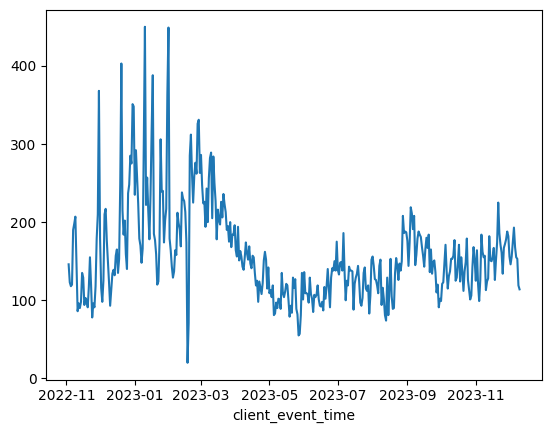

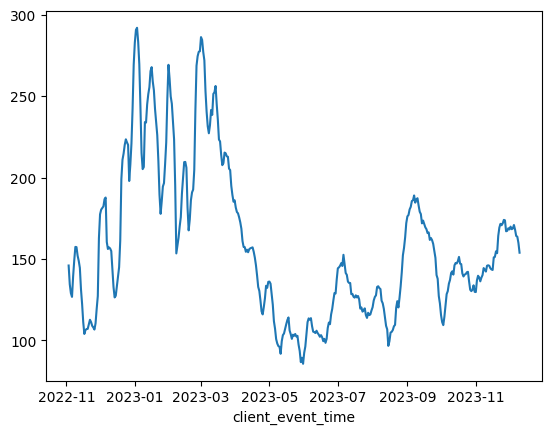

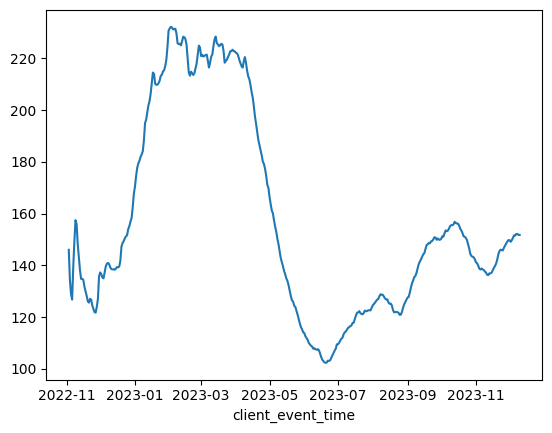

In [117]:
first_enter_pay_date = first_enter_pay_df\
                        .groupby(first_enter_pay_df['client_event_time'].dt.date)\
                        .size()

# check head
display(first_enter_pay_date.head(5))

# day plot            
first_enter_pay_date.plot()
plt.show()

# week plot
first_enter_pay_date.rolling(min_periods=1, window=7).mean().plot()
plt.show()

# month plot
first_enter_pay_date.rolling(min_periods=1, window=50).mean().plot()
plt.show()

In [118]:

print(f'first_subscript_df : {first_subscript_df.shape[0]}')
print(first_subscript_df.duplicated().sum())
print(f're_subscript_df : {re_subscript_df.shape[0]}')
print(re_subscript_df.duplicated().sum())
print(f'auto_pay_df : {auto_pay_df.shape[0]}')
print(auto_pay_df.duplicated().sum())

print("first_subscript_df, re_subscript_df")
temp = pd.merge(first_subscript_df, re_subscript_df
                , on=['user_id', 'client_event_time']
                , how='inner')
if temp.size > 0:
    temp = temp[['user_id', 'client_event_time']]
    display(temp)
    display(pd.merge(temp, first_subscript_df
                     , on=['user_id', 'client_event_time']
                     , how='inner'))
    display(pd.merge(temp, re_subscript_df
                     , on=['user_id', 'client_event_time']
                     , how='inner'))
    
print("auto_pay_df, re_subscript_df")
temp = pd.merge(auto_pay_df, re_subscript_df
                , on=['user_id', 'client_event_time']
                , how='inner')
if temp.size > 0:
    temp = temp[['user_id', 'client_event_time']]
    display(temp)
    display(pd.merge(temp, auto_pay_df
                     , on=['user_id', 'client_event_time']
                     , how='inner'))
    display(pd.merge(temp, re_subscript_df
                     , on=['user_id', 'client_event_time']
                     , how='inner'))

print("auto_pay_df, first_subscript_df")
temp = pd.merge(auto_pay_df, first_subscript_df
                , on=['user_id', 'client_event_time']
                , how='inner')
if temp.size > 0:
    temp = temp[['user_id', 'client_event_time']]
    display(temp)
    display(pd.merge(temp, auto_pay_df
                     , on=['user_id', 'client_event_time']
                     , how='inner'))
    display(pd.merge(temp, first_subscript_df
                     , on=['user_id', 'client_event_time']
                     , how='inner'))


first_subscript_df : 14289
2
re_subscript_df : 791
0
auto_pay_df : 15945
0
first_subscript_df, re_subscript_df
auto_pay_df, re_subscript_df


,user_id,client_event_time
0,0889fec8022c71328b877826576a764f,2022-11-18 02:49:40.687


,user_id,client_event_time,city,country,device_family,device_type,event_type,language,os_name,os_version,platform,plan_price,paid_amount,coupon_discount_amount,pg_type
0,0889fec8022c71328b877826576a764f,2022-11-18 02:49:40.687,Gwangjin-gu,South Korea,Windows,Windows,renew.subscription,Korean,Chrome,107.0.0.0,Web,15920,15442,478,NaN


,user_id,client_event_time,city,country,device_family,device_type,event_type,language,os_name,os_version,platform,plan_price,paid_amount,coupon_discount_amount,pg_type
0,0889fec8022c71328b877826576a764f,2022-11-18 02:49:40.687,Gwangjin-gu,South Korea,Windows,Windows,resubscribe.subscription,Korean,Chrome,107.0.0.0,Web,15920,15442,478,NaN


auto_pay_df, first_subscript_df


,user_id,client_event_time
0,7fb2da7924c07cc24515000c9d2f237a,2022-09-24 01:45:02.179
1,2466261a18d5757e8504ff8045d4b0e1,2022-09-24 13:09:30.345
2,7f6ac355cd862e7361735903b53f1c92,2022-09-26 10:20:01.953
3,08e0a0b1e7ae39f10cba93cfbfec6ec1,2022-11-11 17:10:01.825
4,6b889dac8d1646374b43ccd0130182ff,2022-11-17 08:45:02.108


,user_id,client_event_time,city,country,device_family,device_type,event_type,language,os_name,os_version,platform,plan_price,paid_amount,coupon_discount_amount,pg_type
0,7fb2da7924c07cc24515000c9d2f237a,2022-09-24 01:45:02.179,Mapo-gu,South Korea,Mac,Mac,renew.subscription,Korean,Chrome,105,Web,15920,15920,0,NaN
1,2466261a18d5757e8504ff8045d4b0e1,2022-09-24 13:09:30.345,Seoul,South Korea,Mac,Mac,renew.subscription,Korean,Safari,14,Web,15920,15920,0,NaN
2,7f6ac355cd862e7361735903b53f1c92,2022-09-26 10:20:01.953,Sejong,South Korea,Linux,Linux,renew.subscription,Korean,Chrome,91,Web,15920,15920,0,NaN
3,08e0a0b1e7ae39f10cba93cfbfec6ec1,2022-11-11 17:10:01.825,Gangnam-gu,South Korea,Windows,Windows,renew.subscription,Korean,Chrome,107,Web,15920,15920,0,NaN
4,6b889dac8d1646374b43ccd0130182ff,2022-11-17 08:45:02.108,Seoul,South Korea,Mac,Mac,renew.subscription,Korean,Chrome,107.0.0.0,Web,131600,131600,0,NaN


,user_id,client_event_time,city,country,device_family,device_type,event_type,language,os_name,os_version,platform,plan_price,paid_amount,coupon_discount_amount,pg_type
0,7fb2da7924c07cc24515000c9d2f237a,2022-09-24 01:45:02.179,Mapo-gu,South Korea,Mac,Mac,complete.subscription,Korean,Chrome,105,Web,15920,15920,0,NaN
1,2466261a18d5757e8504ff8045d4b0e1,2022-09-24 13:09:30.345,Seoul,South Korea,Mac,Mac,complete.subscription,Korean,Safari,14,Web,15920,15920,0,NaN
2,7f6ac355cd862e7361735903b53f1c92,2022-09-26 10:20:01.953,Sejong,South Korea,Linux,Linux,complete.subscription,Korean,Chrome,91,Web,15920,15920,0,NaN
3,08e0a0b1e7ae39f10cba93cfbfec6ec1,2022-11-11 17:10:01.825,Gangnam-gu,South Korea,Windows,Windows,complete.subscription,Korean,Chrome,107,Web,15920,15920,0,NaN
4,6b889dac8d1646374b43ccd0130182ff,2022-11-17 08:45:02.108,Seoul,South Korea,Mac,Mac,complete.subscription,Korean,Chrome,107.0.0.0,Web,131600,131600,0,NaN


첫 결제와 정기 결제는 겹치는게 없음\
만료후 재구독은 다른 두 데이터에서 겹치는 부분이 있지만\
수가 적고 데이터의 초기 부분이라 초기 운영의 오류의 수 있음

In [119]:
temp1 = first_subscript_df.groupby('user_id')['client_event_time'].min()
temp2 = auto_pay_df.groupby('user_id')['client_event_time'].min()
temp3 = re_subscript_df.groupby('user_id')['client_event_time'].min()

In [120]:
print(temp1.shape[0])
print(temp2.shape[0])

# merge first_subscript_df and auto_pay_df
result = pd.merge(temp1, temp2, how='inner', on='user_id')\
    .reset_index()\
    .rename(columns={'client_event_time_x' : 'first_subscript_date', 'client_event_time_y' : 'auto_pay_date'})
print(result.shape[0])

# Create a new column 'diff' in the result DataFrame
result['diff'] = result['first_subscript_date'] - result['auto_pay_date']
result['diff'] = result['diff'].dt.total_seconds()
result['diff'] = result['diff']

# 날짜 대소 비교
temp = result[result['diff'].abs() < 600]
display(temp)
display(temp['diff'].describe())
temp = result[result['diff'].abs() >= 600]
display(temp)
display(temp['diff'].describe())

13881
7498
5385


,user_id,first_subscript_date,auto_pay_date,diff
9,00713a0e97135815ea700dfe82ce49fb,2022-10-07 15:40:01.797,2022-10-07 15:40:01.779,0.018
18,010a4a8efd5fd2528719b5bd8098286a,2022-10-07 00:30:02.524,2022-10-07 00:30:02.004,0.520
21,0126ad7cca27944f9856d7c6ec5974b5,2022-10-03 01:20:01.864,2022-10-03 01:20:02.723,-0.859
24,01449049533c7dfe50cdfbdb605410e2,2022-11-06 19:05:02.671,2022-11-06 19:05:02.672,-0.001
27,0157e1eaf2645e7d4de1fba14fe72a0f,2022-10-10 02:40:01.405,2022-10-10 02:40:01.533,-0.128
...,...,...,...,...
5312,fc52c92792b44f3f461ddc1167aa90a1,2022-11-07 01:15:01.136,2022-11-07 01:15:01.644,-0.508
5319,fcdf96b4de5958aeabf554e6f7e9daec,2022-09-28 02:10:02.126,2022-09-28 02:10:01.625,0.501
5324,fd35e6f4c96e4f1d2b5ebd12ef26bced,2022-10-09 10:00:03.650,2022-10-09 10:00:02.763,0.887
5337,fdb13da083ec2460c8ab4dd4218363a0,2022-11-06 08:00:02.938,2022-11-06 08:00:02.412,0.526


count    479.000000
mean      -1.350777
std       23.333267
min     -451.367000
25%       -0.019000
50%        0.013000
75%        0.520000
max        1.411000
Name: diff, dtype: float64

,user_id,first_subscript_date,auto_pay_date,diff
0,0000572f2ba8079bcefd2760b632e820,2023-03-25 14:40:01.647,2023-04-25 14:45:01.747,-2.678700e+06
1,000be07bc09ceff42c11978f4a9f1c1a,2022-08-20 13:05:01.083,2022-11-20 13:10:01.891,-7.949101e+06
2,001ddbe4885db89888b34bf0eb14f6e1,2022-04-10 06:02:28.859,2023-01-21 09:00:05.092,-2.472106e+07
3,002109ba574914ed127dcae867110f91,2022-02-17 02:39:54.910,2023-02-17 08:10:06.967,-3.155581e+07
4,0031482d16469048027f6096d13c8b22,2023-09-10 23:34:21.696,2023-10-10 23:35:02.550,-2.592041e+06
...,...,...,...,...
5380,ffa1cfa6bc3b410a927be11e23ff5340,2022-12-19 12:50:01.076,2023-12-31 14:42:16.966,-3.257954e+07
5381,ffb19e67ac35d18a6711c55d2ace39ba,2022-08-10 05:25:22.823,2022-09-10 05:30:02.277,-2.678679e+06
5382,ffe13db0ad3751c9be06a73aa38bc9fc,2022-09-08 02:35:01.476,2022-10-08 02:40:02.035,-2.592301e+06
5383,ffe3e486f61399d62d83727e53a850dc,2022-07-30 06:04:32.692,2023-07-31 02:03:05.911,-3.160791e+07


count    4.906000e+03
mean    -8.818868e+06
std      1.033928e+07
min     -5.812338e+07
25%     -9.797943e+06
50%     -2.768429e+06
75%     -2.592301e+06
max     -6.000720e+02
Name: diff, dtype: float64

첫 구독과 정기 결제가 시간적으로 동일한(오차 1초 이내) 데이터가 존재한다.
두 데이터는 일부분 겹친다.\
첫구독은 언제나 구독날짜가 동일하거나 앞서있다.

In [121]:
print(temp2.shape[0])
print(temp3.shape[0])

# merge re_subscript_df and auto_pay_df
result = pd.merge(temp2, temp3, how='inner', on='user_id')\
    .reset_index()\
    .rename(columns={'client_event_time_x' : 'auto_pay_date', 'client_event_time_y' : 're_subscript_date'})
print(result.shape[0])

# Create a new column 'diff' in the result DataFrame
result['diff'] = result['auto_pay_date'] - result['re_subscript_date']
result['diff'] = result['diff'].dt.total_seconds()
result['diff'] = result['diff']

# 날짜 대소 비교
temp = result[result['diff'].abs() < 600]
display(temp)
display(temp['diff'].describe())
temp = result[result['diff'].abs() >= 600]
display(temp)
display(temp['diff'].describe())

7498
761
511


,user_id,auto_pay_date,re_subscript_date,diff
2,01420e0a936792dbdcabad14fe9fece1,2022-11-13 10:05:13.135,2022-11-13 10:05:13.681,-0.546
18,04230eb1c628b99fb70aa483344e47ad,2022-11-13 04:39:41.375,2022-11-13 04:39:42.825,-1.450
24,0772cb88d17b51d6822f12f315ba6687,2022-11-19 08:21:36.490,2022-11-19 08:21:36.503,-0.013
28,0889fec8022c71328b877826576a764f,2022-11-18 02:49:40.687,2022-11-18 02:49:40.687,0.000
51,1562a3b4d08ee3c44e068009fe01cbbe,2022-11-13 17:14:21.671,2022-11-13 17:14:21.661,0.010
57,1be14d4ed3bef4e82d3a2331ace77dc1,2022-11-08 10:50:44.742,2022-11-08 10:50:43.860,0.882
71,23a69672ced44709d2790430b6fecf33,2022-11-29 08:37:26.761,2022-11-29 08:37:27.293,-0.532
98,35588439329bcfa58841c588aba35201,2023-08-01 05:48:02.091,2023-08-01 05:40:11.642,470.449
106,3966266887fba64584a2c890fd7400d5,2022-11-12 04:48:28.011,2022-11-12 04:48:28.116,-0.105
129,4591c8f94f84533e7013713d9302a70b,2022-11-11 07:16:59.188,2022-11-11 07:16:59.748,-0.560


count     29.000000
mean      32.422828
std      122.401396
min       -1.665000
25%       -0.542000
50%       -0.105000
75%        0.001000
max      478.173000
Name: diff, dtype: float64

,user_id,auto_pay_date,re_subscript_date,diff
0,0108538a502bb0339cdee7d33f96a510,2023-02-01 01:05:26.946,2023-11-27 00:03:46.443,-2.582990e+07
1,010a54b7adcb47015c5813cf8509461e,2022-09-20 12:30:50.004,2023-04-13 03:36:01.458,-1.767991e+07
3,0169c3e54cbd0d8b35d7dd59b40ca65c,2022-10-13 06:00:07.462,2022-09-13 05:59:00.147,2.592067e+06
4,01946f0541feaf69418576cd1f77e321,2022-10-13 03:00:01.358,2023-07-10 02:22:25.467,-2.332574e+07
5,01bb08e6b27802710bb8421493ae3688,2023-09-10 12:40:03.073,2023-08-10 12:35:25.240,2.678678e+06
...,...,...,...,...
506,ff27c0ef4f7c2c87a09e295c496727f5,2023-07-25 02:35:02.556,2023-12-18 05:11:13.874,-1.262377e+07
507,ff917e8b6bcf53a48bd1b1efae5d00f5,2023-09-25 03:20:03.315,2022-09-25 03:17:16.348,3.153617e+07
508,ff9bb243eff83d84e2cb289ff629aba8,2023-08-25 07:03:48.454,2023-07-25 06:31:11.205,2.680357e+06
509,ffe13db0ad3751c9be06a73aa38bc9fc,2022-10-08 02:40:02.035,2023-08-19 13:29:33.039,-2.725497e+07


count    4.820000e+02
mean    -6.401387e+06
std      1.270910e+07
min     -3.965727e+07
25%     -1.596852e+07
50%      2.592007e+06
75%      2.678587e+06
max      3.153617e+07
Name: diff, dtype: float64

정기 결제와 재 구독은 겹치지 않는다.

In [122]:
print(temp1.shape[0])
print(temp3.shape[0])

result = pd.merge(temp1, temp3, how='inner', on='user_id')\
    .reset_index()\
    .rename(columns={'client_event_time_x' : 'first_subscript_date', 'client_event_time_y' : 're_subscript_date'})
print(result.shape[0])

result['diff'] = result['re_subscript_date'] - result['first_subscript_date']
result['diff'] = result['diff'].dt.total_seconds()
result['diff'] = result['diff']

# 날짜 대소 비교
temp = result[result['diff'].abs() < 600]
display(temp)
display(temp['diff'].describe())
temp = result[result['diff'].abs() >= 600]
display(temp)
display(temp['diff'].describe())

13881
761
402


,user_id,first_subscript_date,re_subscript_date,diff
7,0308b8ea736768f9399d3b81d34b00a0,2022-10-17 12:11:11.485,2022-10-17 12:11:11.486,0.001
41,182f52b6dcc8288afce0a629b4de3a9f,2022-10-18 08:00:02.292,2022-10-18 08:00:02.816,0.524
43,1a9bc9f6ba2ab755b45b04d981555ba5,2022-10-02 23:20:15.717,2022-10-02 23:20:14.827,-0.890
49,1d8c3941b13b5fd9969bbf2a350bc8cf,2022-10-25 02:06:12.900,2022-10-25 02:06:13.336,0.436
51,1da0b4afbbf62bbfa74e8e22c710919c,2022-11-01 10:10:33.510,2022-11-01 10:10:34.409,0.899
59,2466261a18d5757e8504ff8045d4b0e1,2022-09-24 07:43:38.349,2022-09-24 07:43:38.321,-0.028
63,274b46e35dfbfd919ef8ec923a3a16bb,2022-11-13 01:56:11.643,2022-11-13 01:56:11.784,0.141
77,308ee0950741e4321045d0ba604778de,2022-09-12 02:09:15.703,2022-09-12 02:09:15.193,-0.510
84,374312364e615be115ae0b43759a2b72,2022-10-01 14:09:51.447,2022-10-01 14:09:50.556,-0.891
104,41aa0116e4ddf9f13e4ccabd7f1f8040,2022-10-01 10:38:26.892,2022-10-01 10:38:27.442,0.550


count    22.000000
mean     -0.085636
std       0.482698
min      -0.891000
25%      -0.515500
50%      -0.006500
75%       0.108000
max       0.899000
Name: diff, dtype: float64

,user_id,first_subscript_date,re_subscript_date,diff
0,010a54b7adcb47015c5813cf8509461e,2022-07-18 00:53:24.343,2023-04-13 03:36:01.458,2.325136e+07
1,01420e0a936792dbdcabad14fe9fece1,2022-02-19 03:27:16.121,2022-11-13 10:05:13.681,2.309268e+07
2,01946f0541feaf69418576cd1f77e321,2022-10-13 03:00:01.875,2023-07-10 02:22:25.467,2.332574e+07
3,0221a206c47958f0983da6875b7c8e0f,2022-06-15 17:34:51.345,2022-10-25 08:36:09.184,1.137248e+07
4,0292f9b9e5eee6d5419862b20151993e,2023-07-27 10:03:51.920,2023-11-07 04:56:51.178,8.880779e+06
...,...,...,...,...
397,fe551a948c862c220158e34d3bc2bc47,2023-08-01 05:23:00.896,2023-12-19 06:26:21.393,1.209980e+07
398,ff27c0ef4f7c2c87a09e295c496727f5,2023-06-25 02:30:40.699,2023-12-18 05:11:13.874,1.521603e+07
399,ff386ac202b4d9791259039e8f5879f4,2023-07-23 04:03:59.033,2023-12-23 09:30:13.106,1.323877e+07
400,ff9bb243eff83d84e2cb289ff629aba8,2023-03-22 06:30:01.899,2023-07-25 06:31:11.205,1.080007e+07


count    3.800000e+02
mean     2.275585e+07
std      1.319475e+07
min      4.046058e+06
25%      1.217153e+07
50%      1.871865e+07
75%      3.264609e+07
max      5.720753e+07
Name: diff, dtype: float64

첫 구독과 재구독가 시간적으로 동일한(오차 1초 이내) 데이터가 존재한다.
두 데이터는 일부분 겹친다.\
첫구독은 언제나 구독날짜가 동일하거나 앞서있다.

In [123]:
# get too close log
check_too_close_log

<function __main__.check_too_close_log(df, offset=1)>

In [124]:
temp = first_subscript_df.groupby('user_id')['user_id'].count()
temp[temp > 1].sort_values(ascending=False)

user_id
3767d4c7a827422fccf61d45ae889669    8
f833cca4c382ac8c502c6f99bc432725    6
ccea16701cf72a9027d7d5f2c3d3019c    5
e04c24e899b1e875ed432a7b398a4308    4
1718432f54ebca48832fc7ee9a82810e    3
                                   ..
5817b1cfddd5cf26d9060b21949e526d    2
5802bceee9ecedf9a8b5608598bc19e0    2
57d0d79f7f708d49bcb33e24d7ba1e78    2
57ccaec293dd573fcd8d7697919719a6    2
ffe3e486f61399d62d83727e53a850dc    2
Name: user_id, Length: 361, dtype: int64

In [125]:
## set
# union all the pay data and compact
total_pay_df = pd.concat([first_subscript_df, re_subscript_df, auto_pay_df], axis=0).reset_index(drop=True)
total_pay_df = total_pay_df[['user_id', 'client_event_time', 'event_type']]

# sort by event time
total_pay_df = total_pay_df.sort_values(['user_id', 'client_event_time'])

# display
display(f'first_subscript_df : {first_subscript_df.shape[0]}')
display(f're_subscript_df : {re_subscript_df.shape[0]}')
display(f'auto_pay_df : {auto_pay_df.shape[0]}')
display(total_pay_df.shape[0])

temp = total_pay_df.groupby('user_id').count()
temp = temp[temp['client_event_time'] > 1]
mask = total_pay_df['user_id'].isin(temp.index)
display(total_pay_df[mask].head(25))

## process
# check too close log
temp = total_pay_df.groupby('user_id')['client_event_time'].diff().dt.total_seconds()
temp = temp.dropna().astype('float64')
display(temp)

too_close_log_index = temp[temp < 60].index
first_log_index = total_pay_df.groupby('user_id')['client_event_time'].idxmin().values

## get too close log
# mask : first + too close log
first_log_index = total_pay_df.groupby('user_id')['client_event_time'].idxmin().values
mask = list(first_log_index) + list(too_close_log_index)
mask = list(set(mask))
mask = total_pay_df.index.isin(mask)

# get only 'count() > 1' user
temp = total_pay_df[mask]
temp = temp.groupby('user_id')['user_id'].count()
too_close_log_user = temp[temp > 1].index

# get too close log in total_pay_df
result = total_pay_df[mask]
result = result[result['user_id'].isin(too_close_log_user)]
display(result)

# value count
result.groupby('user_id')['event_type'].sum().str.replace('.subscription', ', ').value_counts()

'first_subscript_df : 14289'

're_subscript_df : 791'

'auto_pay_df : 15945'

31025

,user_id,client_event_time,event_type
3179,0000572f2ba8079bcefd2760b632e820,2023-03-25 14:40:01.647,complete.subscription
22508,0000572f2ba8079bcefd2760b632e820,2023-04-25 14:45:01.747,renew.subscription
23150,0000572f2ba8079bcefd2760b632e820,2023-05-25 14:50:01.753,renew.subscription
3628,000be07bc09ceff42c11978f4a9f1c1a,2022-08-20 13:05:01.083,complete.subscription
17585,000be07bc09ceff42c11978f4a9f1c1a,2022-11-20 13:10:01.891,renew.subscription
20605,000be07bc09ceff42c11978f4a9f1c1a,2023-01-25 06:16:22.464,renew.subscription
4645,001ddbe4885db89888b34bf0eb14f6e1,2022-04-10 06:02:28.859,complete.subscription
20473,001ddbe4885db89888b34bf0eb14f6e1,2023-01-21 09:00:05.092,renew.subscription
5796,002109ba574914ed127dcae867110f91,2022-02-17 02:39:54.910,complete.subscription
21319,002109ba574914ed127dcae867110f91,2023-02-17 08:10:06.967,renew.subscription


22508    2.678700e+06
23150    2.592300e+06
17585    7.949101e+06
20605    5.677581e+06
20473    2.472106e+07
             ...     
22768    2.592300e+06
23466    2.678700e+06
25174    5.152425e+06
27086    4.406328e+06
14849    8.138235e+06
Name: client_event_time, Length: 14878, dtype: float64

,user_id,client_event_time,event_type
16202,00713a0e97135815ea700dfe82ce49fb,2022-10-07 15:40:01.779,renew.subscription
7743,00713a0e97135815ea700dfe82ce49fb,2022-10-07 15:40:01.797,complete.subscription
16164,010a4a8efd5fd2528719b5bd8098286a,2022-10-07 00:30:02.004,renew.subscription
9532,010a4a8efd5fd2528719b5bd8098286a,2022-10-07 00:30:02.524,complete.subscription
4691,0126ad7cca27944f9856d7c6ec5974b5,2022-10-03 01:20:01.864,complete.subscription
...,...,...,...
7574,fdb13da083ec2460c8ab4dd4218363a0,2022-11-06 08:00:02.938,complete.subscription
9281,fdd65930c3cb37b64725377df0a7b380,2022-11-17 06:20:03.725,complete.subscription
9282,fdd65930c3cb37b64725377df0a7b380,2022-11-17 06:20:03.875,complete.subscription
8131,fe47fabc4baa52ef9f85cd749349a33f,2022-09-25 15:10:01.739,complete.subscription


event_type
renew, complete,                     259
complete, renew,                     190
complete, complete,                   48
complete, resubscribe,                22
renew, complete, complete,            21
renew, resubscribe,                   10
resubscribe, complete,                10
complete, renew, complete,             6
complete, renew, renew,                5
renew, complete, renew,                5
resubscribe, renew,                    4
resubscribe, complete, renew,          1
complete, resubscribe, complete,       1
renew, complete, renew, renew,         1
resubscribe, complete, complete,       1
complete, complete, renew,             1
Name: count, dtype: int64

#### 데이터 통합

In [23]:
if len(DF) > 0:
    DF = []

DF = pd.concat(dfs[:9] + dfs[10:], axis=0).reset_index(drop=True)
print(DF.shape[0])

encoder_dict = dict()
DF['os_version'] = DF['os_version'].astype(str)
col_unique_dict['os_version'] = { str(x) for x in list(col_unique_dict['os_version']) }

for col in DF.columns:
    # exception handling
    if col in ['client_event_time', 'device_carrier']:
        continue
    
    
    print(f"\n\n{col}")
    
    # label encoding
    le = LabelEncoder()
    le = le.fit([ None, np.nan ] + list(col_unique_dict[col]))
    
    # update encoder_dict
    encoder_dict[col] = le
    
    # update DF
    DF[col] = le.transform(DF[col])
    
    # display
    display(DF[col].value_counts())
    
DF

9751911


city


city
3439    1915512
3435     345250
4340     342851
3693     310560
1227     289517
         ...   
1465          1
1516          1
1269          1
3348          1
4108          1
Name: count, Length: 4286, dtype: int64



country


country
157    9321855
189     210475
180      64511
84       27114
30       19886
        ...   
89           1
102          1
37           1
117          1
122          1
Name: count, Length: 189, dtype: int64



device_family


device_family
1028    5834483
569     1560914
134      873957
772      494877
128      371959
         ...   
260           1
655           1
674           1
780           1
301           1
Name: count, Length: 1118, dtype: int64



device_type


device_type
608    5834483
157    1560914
37      667688
3       371959
652     277591
        ...   
582          1
223          1
170          1
374          1
596          1
Name: count, Length: 652, dtype: int64



event_type


event_type
4     2826034
10    2133548
8     1914257
3     1379136
12     596829
2      172911
11     165061
5      145133
15     124917
7      120582
1       93962
16      30621
0       17895
13      15945
6       14289
14        791
Name: count, dtype: int64



language


language
37    9133166
14     459437
71     131294
32      10897
9        3621
       ...   
8           1
59          1
62          1
60          1
33          1
Name: count, Length: 71, dtype: int64



os_name


os_name
3     6091683
9      986382
22     508092
33     393228
39     341653
16     334088
34     315881
6      198861
5      156689
44     134022
38     110246
11      58070
4       54052
12      38803
14      19582
25       3931
40       2591
2        1643
1         747
19        483
37        247
27        237
35        144
10        115
0         114
29         52
31         51
18         49
15         37
32         32
41         30
7          26
36         24
30          8
13          5
20          4
26          2
21          1
23          1
24          1
42          1
17          1
28          1
8           1
Name: count, dtype: int64



os_version


os_version
3001    484070
222     424228
3017    400141
467     381805
89      353356
         ...  
1327         1
2975         1
1754         1
98           1
1689         1
Name: count, Length: 3048, dtype: int64



platform


platform
0    9620617
2     131294
Name: count, dtype: int64



user_id


user_id
179757    2861025
56111       30063
147615      24341
101728       5157
3798         4752
           ...   
174128          1
110869          1
9732            1
88956           1
169600          1
Name: count, Length: 178823, dtype: int64



content.id


content.id
212    3674696
200     464889
199     449691
84      324251
158     317523
        ...   
47           1
129          1
62           1
122          1
24           1
Name: count, Length: 211, dtype: int64



button.name


button.name
9    9665669
5      40961
6      27797
1      13596
2       2513
3        907
4        293
0        174
7          1
Name: count, dtype: int64



button_name


button_name
5    9712960
3      23793
0       6094
2       5348
1       3716
Name: count, dtype: int64



question.id


question.id
7796    8927122
6966       6160
7618       3607
5969       3324
5981       2875
         ...   
6004          1
7318          1
4874          1
1461          1
1172          1
Name: count, Length: 7796, dtype: int64



lesson.id


lesson.id
5489    6101088
4120      23015
2073      16234
48        15803
3562      15409
         ...   
1734          1
2817          1
1963          1
4265          1
3081          1
Name: count, Length: 5014, dtype: int64



type


type
7    9606953
3      89484
2      21465
4      19440
0      14126
1        442
5          1
Name: count, dtype: int64



plan.price


plan.price
13    9718447
1       21343
11       4060
3        2230
4        2171
9        1500
5         850
6         496
8         461
7         326
0          23
10          3
2           1
Name: count, dtype: int64



paid_amount


paid_amount
51    9720886
12      16836
49       2261
30       2160
22       1742
40       1483
1         896
0         871
6         855
33        827
34        494
39        461
36        325
43        316
17        254
7         242
5         213
16        101
44         99
42         95
14         71
11         68
41         56
10         40
4          38
15         28
37         27
21         24
48         24
29         20
38         17
9          13
47         12
8           9
28          8
2           6
45          5
26          4
19          4
18          3
20          3
46          3
25          2
24          2
3           1
13          1
32          1
23          1
31          1
27          1
35          1
Name: count, dtype: int64



coupon.discount_amount


coupon.discount_amount
45    9720886
2       26590
28        896
33        871
12        855
37        316
25        254
8         219
16        213
29        101
34         96
38         95
36         71
3          68
39         56
4          40
20         38
31         28
40         27
6          24
18         24
42         20
1          18
9          17
5          13
26         12
7           9
11          8
21          7
24          6
32          5
19          4
15          4
30          3
10          3
17          3
43          2
23          2
35          1
0           1
13          1
27          1
14          1
41          1
22          1
Name: count, dtype: int64



pg.type


pg.type
4    9747364
0       3731
1        767
2         49
Name: count, dtype: int64



content.difficulty


content.difficulty
5    9626994
1      58628
3      36109
0      27485
2       2695
Name: count, dtype: int64



plan.type


plan.type
3    9749472
1       1278
0       1161
Name: count, dtype: int64



trial.type


trial.type
3    9721290
0      28182
1       2439
Name: count, dtype: int64

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,...,question.id,lesson.id,type,plan.price,paid_amount,coupon.discount_amount,pg.type,content.difficulty,plan.type,trial.type
0,885,2023-04-10 14:57:48.556,157,1028,608,0,37,3,348,0,...,7796,5489,7,13,51,45,4,5,3,3
1,3439,2023-03-12 08:26:16.224,157,129,4,0,14,22,903,0,...,7796,5489,7,13,51,45,4,5,3,3
2,3944,2023-03-12 08:23:04.955,157,1028,608,0,37,3,309,0,...,7796,5489,7,13,51,45,4,5,3,3
3,966,2023-03-12 08:32:39.271,157,1028,608,0,37,3,309,0,...,7796,5489,7,13,51,45,4,5,3,3
4,1259,2023-04-12 11:36:28.311,157,1028,608,0,37,3,348,0,...,7796,5489,7,13,51,45,4,5,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9751906,2764,2022-02-21 04:56:12.117,157,1028,608,16,37,3,3018,0,...,7796,5489,7,13,51,45,4,5,3,0
9751907,3439,2022-02-21 04:49:35.114,157,129,4,16,37,22,843,0,...,7796,5489,7,13,51,45,4,5,3,0
9751908,3423,2022-02-21 04:37:53.294,157,1028,608,16,37,3,3018,0,...,7796,5489,7,13,51,45,4,5,3,0
9751909,3439,2022-02-21 04:13:10.443,157,134,37,16,37,22,843,0,...,7796,5489,7,13,51,45,4,5,3,0


In [24]:
# save encoder_dict
for encoder in encoder_dict:
    print(f"\n\n{encoder}")
    np.save(f'./encoders/{encoder}.npy', encoder_dict[encoder].classes_)
    
# save the DF
DF.to_csv('total.csv', index=False)



city


country


device_family


device_type


event_type


language


os_name


os_version


platform


user_id


content.id


button.name


button_name


question.id


lesson.id


type


plan.price


paid_amount


coupon.discount_amount


pg.type


content.difficulty


plan.type


trial.type


In [25]:
com_DF = DF[core_cols].copy() # copy core_cols

# le = LabelEncoder()
# le = le.fit(DF['event_type'])
# com_DF['event_type'] = le.transform(DF['event_type'])

print(com_DF.info())
DF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9751911 entries, 0 to 9751910
Data columns (total 3 columns):
 #   Column             Dtype         
---  ------             -----         
 0   user_id            int32         
 1   event_type         int32         
 2   client_event_time  datetime64[ns]
dtypes: datetime64[ns](1), int32(2)
memory usage: 148.8 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9751911 entries, 0 to 9751910
Data columns (total 24 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   city                    int32         
 1   client_event_time       datetime64[ns]
 2   country                 int32         
 3   device_family           int32         
 4   device_type             int32         
 5   event_type              int32         
 6   language                int32         
 7   os_name                 int32         
 8   os_version              int32         
 9   platform                int

In [29]:
big_df = pd.read_csv(path.join(BaseFilePath, dirname, filelist[9]), chunksize=2000000)
enc_chunks = []

for i, chunk in enumerate(big_df):
    # preprocessing
    chunk = chunk.drop('device_carrier', axis=1)
    chunk['client_event_time'] = pd.to_datetime(chunk['client_event_time'])
    chunk['os_version'] = chunk['os_version'].astype(str)
    
    # display
    print(f"\n\n{i}")
    print(chunk.info())
    
    # encoding
    for col in chunk.columns:
        # exception handling
        if col in ['client_event_time', 'device_carrier', 'is_trial', 'is_free_trial']:
            continue
        
        # label encoding
        chunk[col] = encoder_dict[col].transform(chunk[col])
        
    enc_chunks.append(chunk)
    
big_df = pd.concat(enc_chunks, axis=0)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5528\2755470516.py:4: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(big_df):




0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   city               object 
 1   client_event_time  object 
 2   country            object 
 3   device_carrier     float64
 4   device_family      object 
 5   device_type        object 
 6   event_type         object 
 7   language           object 
 8   os_name            object 
 9   os_version         object 
 10  platform           object 
 11  user_id            object 
 12  content.id         object 
 13  is_trial           object 
 14  lesson.id          object 
 15  is_free_trial      float64
dtypes: float64(2), object(14)
memory usage: 244.1+ MB
None


1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 2000000 to 3999999
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   city               object 
 1   client_event_time  obje

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5528\2755470516.py:4: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(big_df):




2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 4000000 to 5999999
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   city               object 
 1   client_event_time  object 
 2   country            object 
 3   device_carrier     float64
 4   device_family      object 
 5   device_type        object 
 6   event_type         object 
 7   language           object 
 8   os_name            object 
 9   os_version         object 
 10  platform           object 
 11  user_id            object 
 12  content.id         object 
 13  is_trial           object 
 14  lesson.id          object 
 15  is_free_trial      float64
dtypes: float64(2), object(14)
memory usage: 244.1+ MB
None


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5528\2755470516.py:4: DtypeWarning: Columns (9,13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(big_df):




3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 6000000 to 7999999
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   city               object 
 1   client_event_time  object 
 2   country            object 
 3   device_carrier     float64
 4   device_family      object 
 5   device_type        object 
 6   event_type         object 
 7   language           object 
 8   os_name            object 
 9   os_version         object 
 10  platform           object 
 11  user_id            object 
 12  content.id         object 
 13  is_trial           object 
 14  lesson.id          object 
 15  is_free_trial      object 
dtypes: float64(1), object(15)
memory usage: 244.1+ MB
None


4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 8000000 to 9999999
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   city               object 
 1   client_event_time

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5528\2755470516.py:4: DtypeWarning: Columns (9,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(big_df):




5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 10000000 to 11999999
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   city               object 
 1   client_event_time  object 
 2   country            object 
 3   device_carrier     float64
 4   device_family      object 
 5   device_type        object 
 6   event_type         object 
 7   language           object 
 8   os_name            object 
 9   os_version         object 
 10  platform           object 
 11  user_id            object 
 12  content.id         object 
 13  is_trial           float64
 14  lesson.id          object 
 15  is_free_trial      object 
dtypes: float64(2), object(14)
memory usage: 244.1+ MB
None


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5528\2755470516.py:4: DtypeWarning: Columns (9,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(big_df):




6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 12000000 to 13999999
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   city               object 
 1   client_event_time  object 
 2   country            object 
 3   device_carrier     float64
 4   device_family      object 
 5   device_type        object 
 6   event_type         object 
 7   language           object 
 8   os_name            object 
 9   os_version         object 
 10  platform           object 
 11  user_id            object 
 12  content.id         object 
 13  is_trial           float64
 14  lesson.id          object 
 15  is_free_trial      object 
dtypes: float64(2), object(14)
memory usage: 244.1+ MB
None


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5528\2755470516.py:4: DtypeWarning: Columns (13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(big_df):




7
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 14000000 to 15999999
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   city               object 
 1   client_event_time  object 
 2   country            object 
 3   device_carrier     float64
 4   device_family      object 
 5   device_type        object 
 6   event_type         object 
 7   language           object 
 8   os_name            object 
 9   os_version         object 
 10  platform           object 
 11  user_id            object 
 12  content.id         object 
 13  is_trial           object 
 14  lesson.id          object 
 15  is_free_trial      object 
dtypes: float64(1), object(15)
memory usage: 244.1+ MB
None


8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 16000000 to 17999999
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   city               object 
 1   client_event_

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5528\2755470516.py:4: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(big_df):




9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 18000000 to 19999999
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   city               object 
 1   client_event_time  object 
 2   country            object 
 3   device_carrier     float64
 4   device_family      object 
 5   device_type        object 
 6   event_type         object 
 7   language           object 
 8   os_name            object 
 9   os_version         object 
 10  platform           object 
 11  user_id            object 
 12  content.id         object 
 13  is_trial           object 
 14  lesson.id          object 
 15  is_free_trial      float64
dtypes: float64(2), object(14)
memory usage: 244.1+ MB
None


10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029707 entries, 20000000 to 21029706
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   city    

In [30]:
print(big_df.info())
big_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21029707 entries, 0 to 21029706
Data columns (total 15 columns):
 #   Column             Dtype         
---  ------             -----         
 0   city               int32         
 1   client_event_time  datetime64[ns]
 2   country            int32         
 3   device_family      int32         
 4   device_type        int32         
 5   event_type         int32         
 6   language           int32         
 7   os_name            int32         
 8   os_version         int32         
 9   platform           int32         
 10  user_id            int32         
 11  content.id         int32         
 12  is_trial           object        
 13  lesson.id          int32         
 14  is_free_trial      object        
dtypes: datetime64[ns](1), int32(12), object(2)
memory usage: 1.4+ GB
None


,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content.id,is_trial,lesson.id,is_free_trial
0,4170,2023-04-05 21:46:04.333,157,1028,608,9,37,3,348,0,102080,124,False,4543,NaN
1,4170,2023-04-05 21:55:50.787,157,1028,608,9,37,3,348,0,102080,124,False,4543,NaN
2,4170,2023-04-05 21:55:55.684,157,1028,608,9,37,3,348,0,102080,124,False,2557,NaN
3,978,2023-04-05 21:04:55.828,157,569,157,9,37,3,348,0,125591,80,False,2277,NaN
4,978,2023-04-05 21:05:34.139,157,569,157,9,37,3,348,0,125591,181,False,409,NaN


In [31]:
le1 = LabelEncoder()
le1 = le.fit(big_df['is_trial'])
le2 = LabelEncoder()
le2 = le.fit(big_df['is_free_trial'])

big_df['is_trial'] = le1.transform(big_df['is_trial'])
big_df['is_free_trial'] = le2.transform(big_df['is_free_trial'])

print(big_df.info())
big_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21029707 entries, 0 to 21029706
Data columns (total 15 columns):
 #   Column             Dtype         
---  ------             -----         
 0   city               int32         
 1   client_event_time  datetime64[ns]
 2   country            int32         
 3   device_family      int32         
 4   device_type        int32         
 5   event_type         int32         
 6   language           int32         
 7   os_name            int32         
 8   os_version         int32         
 9   platform           int32         
 10  user_id            int32         
 11  content.id         int32         
 12  is_trial           int32         
 13  lesson.id          int32         
 14  is_free_trial      int32         
dtypes: datetime64[ns](1), int32(14)
memory usage: 1.3 GB
None


,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content.id,is_trial,lesson.id,is_free_trial
0,4170,2023-04-05 21:46:04.333,157,1028,608,9,37,3,348,0,102080,124,0,4543,2
1,4170,2023-04-05 21:55:50.787,157,1028,608,9,37,3,348,0,102080,124,0,4543,2
2,4170,2023-04-05 21:55:55.684,157,1028,608,9,37,3,348,0,102080,124,0,2557,2
3,978,2023-04-05 21:04:55.828,157,569,157,9,37,3,348,0,125591,80,0,2277,2
4,978,2023-04-05 21:05:34.139,157,569,157,9,37,3,348,0,125591,181,0,409,2


In [32]:
# save encoder_dict
np.save(f'./encoders/is_trial.npy', le1.classes_)
np.save(f'./encoders/is_free_trial.npy', le2.classes_)
    
# save the big_df
big_df.to_csv('total_lesson.csv', index=False)
print('done')

done
